In [2]:
#For data reading and data Manipulation.
import pandas as pd
import numpy as np
import statistics as st

#Data Visualization.
import matplotlib.pyplot as plt
import seaborn as sns

#For model creation and model evalution
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from datetime import datetime


In [3]:
data = pd.read_excel(r"D:\kaggle\House_Rent_Train.xlsx")

In [4]:
data

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [6]:
data.shape

(20555, 25)

In [7]:
data = data.dropna(subset=['activation_date',
                           'latitude',
                           'longitude',
                            'property_age',
                            'bathroom',
                            'facing',              
                            'cup_board',           
                            'floor',               
                            'total_floor',
                            'amenities',         
                            'water_supply',       
                            'building_type',       
                            'balconies',           
                            'rent'])


In [8]:
#drop the column
data.drop(columns = ['id'],inplace = True)

C:\Users\vishalachi\AppData\Local\Temp\ipykernel_15652\3757817453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['id'],inplace = True)


In [9]:
data.shape

(20532, 24)

# Data Cleaning

In [10]:
data.dtypes

type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

In [11]:
data.isnull().sum()

type                18
locality           137
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
dtype: int64

In [12]:
#Filling the Missing values(Categorical Columns)
data = data.fillna({"type":st.mode(data['type']),
                    "locality":st.mode(data['locality']),
                    #"lease_type":st.mode(data['lease_type']),
                    #"facing":st.mode(data['facing']),
                    #"amenities":st.mode(data['amenities']),
                    #"water_supply":st.mode(data['water_supply']),
                    #"building_type":st.mode(data['building_type'])
                   })

In [13]:
# Assuming 'activation_date' is in the format '2018-04-21 14:44:00'
data['activation_date'] = pd.to_datetime(data['activation_date']).dt.strftime('%d-%m-%Y')


C:\Users\vishalachi\AppData\Local\Temp\ipykernel_15652\2319441795.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['activation_date'] = pd.to_datetime(data['activation_date']).dt.strftime('%d-%m-%Y')


In [14]:
# Assuming 'activation_date' is in the format '2018-04-21 14:44:00'
data['activation_date'] = pd.to_datetime(data['activation_date'])
# Calculate the mean or median date
# mean_date = data['activation_date'].mean()  
# Fill null values with the mean or median date
# data['activation_date'].fillna(mean_date, inplace=True)


C:\Users\vishalachi\AppData\Local\Temp\ipykernel_15652\3142712282.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['activation_date'] = pd.to_datetime(data['activation_date'])


In [15]:
data

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,Whitefield,2018-04-21,12.934471,77.634471,FAMILY,1,1,1,0,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,2017-09-10,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,2018-07-20,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,2018-05-31,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,BHK2,"Gattigere,RR Nagar",2017-12-13,12.925380,77.524397,ANYONE,1,1,1,1,...,3.0,E,3.0,4.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,25000.0
20528,BHK2,Koramangala 4th Block,2017-10-19,12.931072,77.632361,ANYONE,0,0,0,1,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20529,BHK2,Kumaraswamy Layout,2017-12-21,12.901800,77.566597,FAMILY,1,1,0,1,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20530,BHK2,Indiranagar,2018-06-28,12.965502,77.647694,FAMILY,0,1,0,0,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


# Type

In [16]:
data['type']

0        BHK2
1        BHK2
2        BHK3
3        BHK1
4        BHK3
         ... 
20527    BHK2
20528    BHK2
20529    BHK2
20530    BHK2
20531    BHK1
Name: type, Length: 20532, dtype: object

In [17]:
data['type'].describe()

count     20532
unique        9
top        BHK2
freq      11689
Name: type, dtype: object

In [18]:
data['type'].value_counts()

type
BHK2        11689
BHK3         4387
BHK1         3607
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: count, dtype: int64

In [19]:
#For the area column have many spelling mistakes so its replace.
data['type'] = data['type'].replace({"bhk2":"BHK2","bhk3":"BHK3","1BHK1":"BHK1"})

In [20]:
data['type'].value_counts()

type
BHK2        11705
BHK3         4399
BHK1         3611
RK1           553
BHK4          233
BHK4PLUS       31
Name: count, dtype: int64

# Locality

In [21]:
data['locality']

0                   Whitefield
1                    Bellandur
2                Thiruvanmiyur
3                    Attiguppe
4                    Kodihalli
                 ...          
20527       Gattigere,RR Nagar
20528    Koramangala 4th Block
20529       Kumaraswamy Layout
20530              Indiranagar
20531        Malleshwaram West
Name: locality, Length: 20532, dtype: object

In [22]:
data['locality'].describe()

count          20532
unique          1917
top       Whitefield
freq            1040
Name: locality, dtype: object

In [23]:
data['locality'].value_counts()

locality
Whitefield                                                                                        1040
HSR Layout                                                                                         682
Banashankari                                                                                       644
Marathahalli                                                                                       473
Bellandur                                                                                          433
                                                                                                  ... 
Simhadri layout                                                                                      1
Skylark Esta, Seetharampalya, Bengaluru, Karnataka, India                                            1
23d, 2nd A Cross Rd, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560050, India,Bengaluru       1
Wilson Garden,                                                  

In [24]:
uniquelocality = data['locality'].unique()
uniquelocality

array(['Whitefield', 'Bellandur', 'Thiruvanmiyur', ...,
       'Reliance Fresh, Whitefield Main Road, Industrial Area, Whitefield',
       'Koramangala 4th block',
       'Mahadevapura bus stop, Mahadevapura, Bengaluru, Karnataka, India'],
      dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


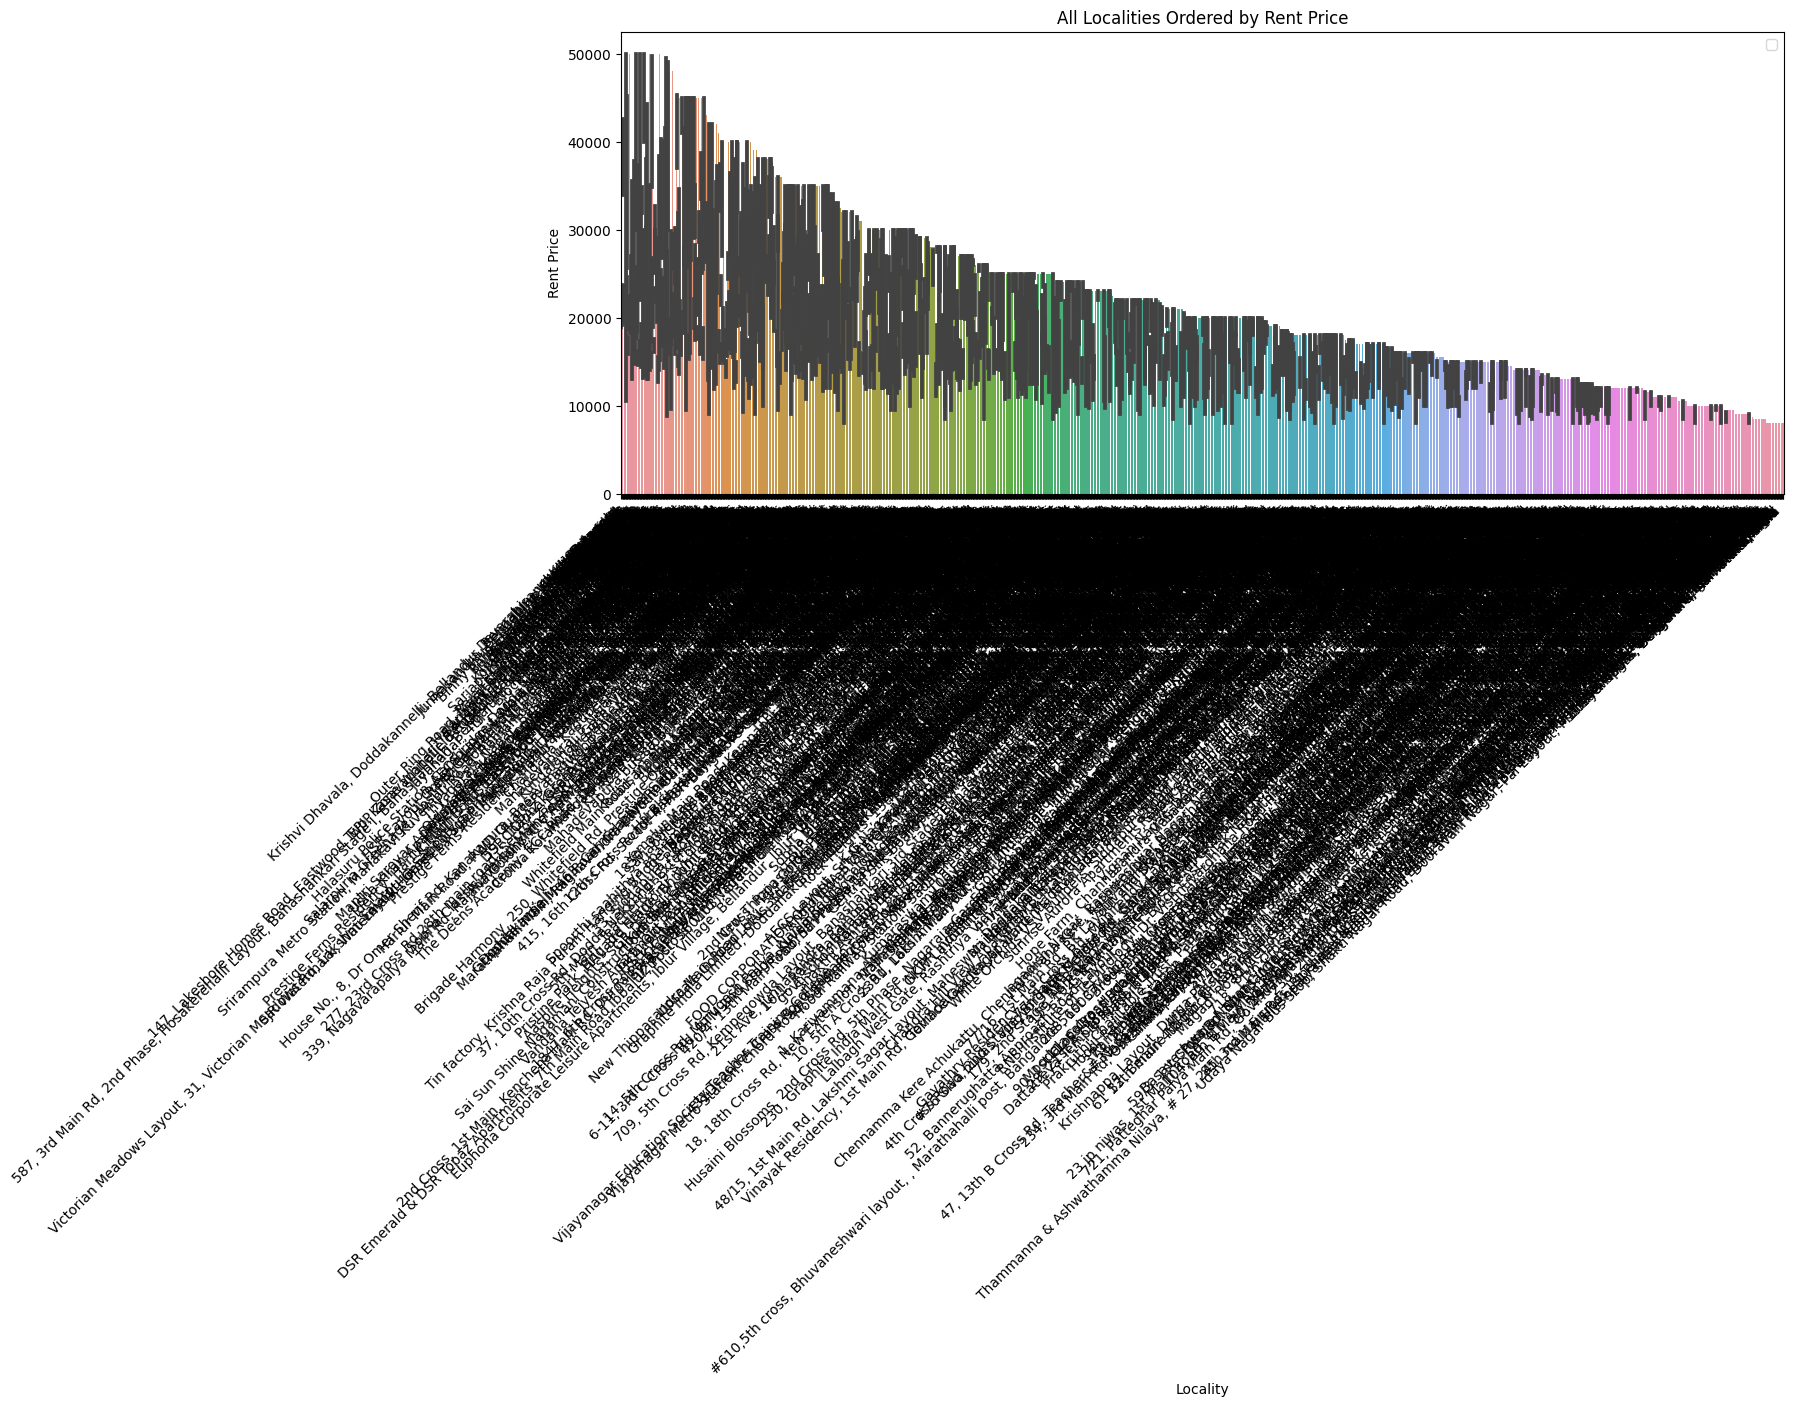

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'locality' and 'rent' columns are present in your dataset
# Assuming 'locality' column is cleaned and has a suitable format

# Sort the dataset by rent in descending order
sorted_data = data.sort_values(by='rent', ascending=False)

# Bar plot for all localities vs rent
plt.figure(figsize=(15, 6))
sns.barplot(x='locality', y='rent', data=sorted_data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Locality')
plt.ylabel('Rent Price')
plt.title('All Localities Ordered by Rent Price')
plt.legend()
plt.show()

# Activation_date

In [26]:
data['activation_date']

0       2018-04-21
1       2017-09-10
2       2018-12-06
3       2018-07-20
4       2018-05-31
           ...    
20527   2017-12-13
20528   2017-10-19
20529   2017-12-21
20530   2018-06-28
20531   2018-08-07
Name: activation_date, Length: 20532, dtype: datetime64[ns]

In [27]:
data['activation_date'].describe()

count                            20532
mean     2018-02-12 21:43:39.520748032
min                2017-01-07 00:00:00
25%                2017-10-21 00:00:00
50%                2018-03-03 00:00:00
75%                2018-06-16 00:00:00
max                2018-12-07 00:00:00
Name: activation_date, dtype: object

In [28]:
data['activation_date'].value_counts()

activation_date
2018-03-07    136
2018-08-07    121
2018-07-22    112
2018-12-07    111
2018-08-06    109
             ... 
2017-08-24     19
2017-08-15     18
2017-11-17     16
2017-01-11     13
2017-02-09      8
Name: count, Length: 396, dtype: int64

# Latitude

In [29]:
data['latitude']

0        12.934471
1        12.929557
2        12.982870
3        12.955991
4        12.963903
           ...    
20527    12.925380
20528    12.931072
20529    12.901800
20530    12.965502
20531    12.998645
Name: latitude, Length: 20532, dtype: float64

In [30]:
q3 = data['latitude'].quantile(0.75)
q1 = data['latitude'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['latitude'].describe()

(13.050184291250002,
 12.83897060125,
 count    20532.000000
 mean        12.945748
 std          0.029601
 min         12.900004
 25%         12.918176
 50%         12.943790
 75%         12.970979
 max         12.999999
 Name: latitude, dtype: float64)

In [31]:
data['latitude'].value_counts()

latitude
12.939517    67
12.902062    46
12.969800    42
12.904365    27
12.966168    26
             ..
12.952237     1
12.945855     1
12.920395     1
12.922990     1
12.926158     1
Name: count, Length: 17733, dtype: int64

# Longitude

In [32]:
data['longitude']

0        77.634471
1        77.672280
2        80.262012
3        77.531634
4        77.649446
           ...    
20527    77.524397
20528    77.632361
20529    77.566597
20530    77.647694
20531    77.574336
Name: longitude, Length: 20532, dtype: float64

In [33]:
q3 = data['longitude'].quantile(0.75)
q1 = data['longitude'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['longitude'].describe()

(77.88120477875002,
 77.38658608874998,
 count    20532.000000
 mean        77.637295
 std          0.110525
 min         77.500072
 25%         77.572068
 50%         77.633506
 75%         77.695723
 max         80.266346
 Name: longitude, dtype: float64)

In [34]:
data['longitude'] = data['longitude'].clip(lower_threshold, upper_threshold)

In [35]:
data['longitude'].value_counts()

longitude
77.730667    67
77.664076    46
77.749947    42
77.707085    27
77.724777    26
             ..
77.609075     1
77.607299     1
77.716273     1
77.626170     1
77.718866     1
Name: count, Length: 17704, dtype: int64

# Lease_type

In [36]:
data['lease_type']

0        FAMILY
1        ANYONE
2        FAMILY
3        FAMILY
4        FAMILY
          ...  
20527    ANYONE
20528    ANYONE
20529    FAMILY
20530    FAMILY
20531    ANYONE
Name: lease_type, Length: 20532, dtype: object

In [37]:
data['lease_type'].describe()

count      20532
unique         4
top       FAMILY
freq       10190
Name: lease_type, dtype: object

In [38]:
data['lease_type'].value_counts()

lease_type
FAMILY      10190
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: count, dtype: int64

# GYM

In [39]:
data['gym']

0        1
1        0
2        0
3        0
4        0
        ..
20527    1
20528    0
20529    1
20530    0
20531    0
Name: gym, Length: 20532, dtype: int64

In [40]:
q3 = data['gym'].quantile(0.75)
q1 = data['gym'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['gym'].describe()

(0.0,
 0.0,
 count    20532.000000
 mean         0.226865
 std          0.418815
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          1.000000
 Name: gym, dtype: float64)

In [41]:
data['gym'].value_counts()

gym
0    15874
1     4658
Name: count, dtype: int64

# Lift

In [42]:
data['lift']

0        1
1        1
2        1
3        0
4        0
        ..
20527    1
20528    0
20529    1
20530    1
20531    0
Name: lift, Length: 20532, dtype: int64

In [43]:
data['lift'].value_counts()

lift
0    13104
1     7428
Name: count, dtype: int64

# Swimming_pool

In [44]:
data['swimming_pool']

0        1
1        0
2        0
3        0
4        0
        ..
20527    1
20528    0
20529    0
20530    0
20531    0
Name: swimming_pool, Length: 20532, dtype: int64

In [45]:
q3 = data['swimming_pool'].quantile(0.75)
q1 = data['swimming_pool'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['swimming_pool'].describe()

(0.0,
 0.0,
 count    20532.000000
 mean         0.174849
 std          0.379847
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          1.000000
 Name: swimming_pool, dtype: float64)

In [46]:
data['swimming_pool'].value_counts()

swimming_pool
0    16942
1     3590
Name: count, dtype: int64

# Negotiable

In [47]:
data['negotiable']

0        0
1        1
2        0
3        1
4        1
        ..
20527    1
20528    1
20529    1
20530    0
20531    1
Name: negotiable, Length: 20532, dtype: int64

In [48]:
data['negotiable'].value_counts()

negotiable
1    14610
0     5922
Name: count, dtype: int64

In [49]:
q3 = data['negotiable'].quantile(0.75)
q1 = data['negotiable'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['negotiable'].describe()

(2.5,
 -1.5,
 count    20532.000000
 mean         0.711572
 std          0.453042
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: negotiable, dtype: float64)

# Furnishing

In [50]:
data['furnishing']

0        SEMI_FURNISHED
1        SEMI_FURNISHED
2        SEMI_FURNISHED
3        SEMI_FURNISHED
4        SEMI_FURNISHED
              ...      
20527    SEMI_FURNISHED
20528    SEMI_FURNISHED
20529    SEMI_FURNISHED
20530    SEMI_FURNISHED
20531    SEMI_FURNISHED
Name: furnishing, Length: 20532, dtype: object

In [51]:
data['furnishing'].value_counts()

furnishing
SEMI_FURNISHED     17927
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: count, dtype: int64

In [52]:
data['furnishing'].describe()

count              20532
unique                 3
top       SEMI_FURNISHED
freq               17927
Name: furnishing, dtype: object

# Parking

In [53]:
data['parking']

0               BOTH
1               BOTH
2               BOTH
3        TWO_WHEELER
4               BOTH
            ...     
20527           BOTH
20528           BOTH
20529           BOTH
20530           BOTH
20531    TWO_WHEELER
Name: parking, Length: 20532, dtype: object

In [54]:
data['parking'].value_counts()

parking
BOTH            10823
TWO_WHEELER      7219
FOUR_WHEELER     1448
NONE             1042
Name: count, dtype: int64

In [55]:
data['parking'].describe()

count     20532
unique        4
top        BOTH
freq      10823
Name: parking, dtype: object

# Property_size

In [56]:
data['property_size']

0        1250
1        1400
2        1350
3         600
4        1500
         ... 
20527    1650
20528    1000
20529    1000
20530    1000
20531     500
Name: property_size, Length: 20532, dtype: int64

In [57]:
q3 = data['property_size'].quantile(0.75)
q1 = data['property_size'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['property_size'].describe()

(2160.0,
 -176.0,
 count    20532.000000
 mean      1061.938145
 std        591.320502
 min          1.000000
 25%        700.000000
 50%       1047.000000
 75%       1284.000000
 max      50000.000000
 Name: property_size, dtype: float64)

In [58]:
data['property_size'] = data['property_size'].clip(lower_threshold,upper_threshold)

In [59]:
data['property_size'].describe()

count    20532.000000
mean      1048.327245
std        429.545637
min          1.000000
25%        700.000000
50%       1047.000000
75%       1284.000000
max       2160.000000
Name: property_size, dtype: float64

In [60]:
data['property_size'].value_counts()

property_size
1200    1784
600     1454
1000    1298
800     1086
1100     897
        ... 
1528       1
1124       1
1772       1
1617       1
415        1
Name: count, Length: 1039, dtype: int64

# Property_age

In [61]:
data['property_age']

0        25.0
1         4.0
2         6.0
3         3.0
4        15.0
         ... 
20527     1.0
20528    10.0
20529     0.0
20530     5.0
20531     3.0
Name: property_age, Length: 20532, dtype: float64

In [62]:
q3 = data['property_age'].quantile(0.75)
q1 = data['property_age'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['property_age'].describe()

(23.5,
 -12.5,
 count    20532.000000
 mean         5.769920
 std          6.350989
 min         -1.000000
 25%          1.000000
 50%          5.000000
 75%         10.000000
 max        400.000000
 Name: property_age, dtype: float64)

In [63]:
data['property_age'] = data['property_age'].clip(lower_threshold,upper_threshold)

In [64]:
data['property_age'].describe()

count    20532.000000
mean         5.651325
std          5.226101
min         -1.000000
25%          1.000000
50%          5.000000
75%         10.000000
max         23.500000
Name: property_age, dtype: float64

In [65]:
data['property_age'].value_counts()

property_age
 0.0     3340
 10.0    2866
 5.0     2761
 1.0     2120
 3.0     1905
 2.0     1326
 4.0      984
 8.0      958
 7.0      828
 6.0      776
 15.0     776
 20.0     414
 12.0     342
 9.0      328
 23.5     302
 13.0     103
 11.0     100
 14.0      82
 18.0      59
 16.0      42
 17.0      42
-1.0       33
 22.0      15
 19.0      11
 21.0      11
 23.0       8
Name: count, dtype: int64

# Bathroom

In [66]:
data['bathroom']

0        2.0
1        2.0
2        3.0
3        1.0
4        3.0
        ... 
20527    3.0
20528    2.0
20529    2.0
20530    2.0
20531    1.0
Name: bathroom, Length: 20532, dtype: float64

In [67]:
q3 = data['bathroom'].quantile(0.75)
q1 = data['bathroom'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['bathroom'].describe()

(3.5,
 -0.5,
 count    20532.000000
 mean         1.858465
 std          0.710926
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          2.000000
 max         21.000000
 Name: bathroom, dtype: float64)

In [68]:
data['bathroom'] = data['bathroom'].clip(lower_threshold, upper_threshold)

In [69]:
data['bathroom'].describe()

count    20532.000000
mean         1.847677
std          0.668089
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.500000
Name: bathroom, dtype: float64

In [70]:
data['bathroom'].value_counts()

bathroom
2.0    11298
1.0     6262
3.0     2647
3.5      325
Name: count, dtype: int64

# Facing

In [71]:
data['facing']

0         E
1        NE
2         E
3         E
4         E
         ..
20527     E
20528     N
20529     W
20530     E
20531     E
Name: facing, Length: 20532, dtype: object

In [72]:
data['facing'].describe()

count     20532
unique        8
top           E
freq       9534
Name: facing, dtype: object

In [73]:
data['facing'].value_counts()

facing
E     9534
N     5925
W     2632
S     1219
NE     817
SE     197
NW     149
SW      59
Name: count, dtype: int64

# Cup_board

In [74]:
data['cup_board']

0        2.0
1        2.0
2        3.0
3        1.0
4        4.0
        ... 
20527    3.0
20528    2.0
20529    2.0
20530    2.0
20531    1.0
Name: cup_board, Length: 20532, dtype: float64

In [75]:
q3 = data['cup_board'].quantile(0.75)
q1 = data['cup_board'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['cup_board'].describe()

(6.0,
 -2.0,
 count    20532.000000
 mean         4.549922
 std        335.154787
 min          0.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max      48026.000000
 Name: cup_board, dtype: float64)

In [76]:
data['cup_board'] = data['cup_board'].clip(lower_threshold, upper_threshold)

In [77]:
data['cup_board'].describe()

count    20532.000000
mean         2.161894
std          1.324580
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: cup_board, dtype: float64

In [78]:
data['cup_board'].value_counts()

cup_board
2.0    8590
3.0    3793
1.0    3748
0.0    1875
4.0    1314
6.0     765
5.0     447
Name: count, dtype: int64

# Floor

In [79]:
data['floor']

0        6.0
1        3.0
2        1.0
3        1.0
4        0.0
        ... 
20527    4.0
20528    1.0
20529    5.0
20530    2.0
20531    1.0
Name: floor, Length: 20532, dtype: float64

In [80]:
q3 = data['floor'].quantile(0.75)
q1 = data['floor'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['floor'].describe()

(3.5,
 -0.5,
 count    20532.000000
 mean         1.874050
 std          2.183982
 min          0.000000
 25%          1.000000
 50%          1.000000
 75%          2.000000
 max         25.000000
 Name: floor, dtype: float64)

In [81]:
data['floor'] = data['floor'].clip(lower_threshold, upper_threshold)

In [82]:
data['floor'].describe()

count    20532.000000
mean         1.538136
std          1.203162
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.500000
Name: floor, dtype: float64

In [83]:
data['floor'].value_counts()

floor
1.0    5885
0.0    4987
2.0    4545
3.0    2593
3.5    2522
Name: count, dtype: int64

# Total_floor

In [84]:
data['total_floor']

0        12.0
1         4.0
2         5.0
3         2.0
4         0.0
         ... 
20527     4.0
20528     2.0
20529     5.0
20530     4.0
20531     1.0
Name: total_floor, Length: 20532, dtype: float64

In [85]:
q3 = data['total_floor'].quantile(0.75)
q1 = data['total_floor'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['total_floor'].describe()

(7.0,
 -1.0,
 count    20532.000000
 mean         3.801335
 std          3.183697
 min          0.000000
 25%          2.000000
 50%          3.000000
 75%          4.000000
 max         26.000000
 Name: total_floor, dtype: float64)

In [86]:
data['total_floor'] = data['total_floor'].clip(lower_threshold, upper_threshold)

In [87]:
data['total_floor'].describe()

count    20532.000000
mean         3.305426
std          1.699385
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: total_floor, dtype: float64

In [88]:
data['total_floor'].value_counts()

total_floor
2.0    4857
4.0    4835
3.0    4668
1.0    2110
7.0    1996
5.0    1491
0.0     363
6.0     212
Name: count, dtype: int64

# Amenities

In [89]:
data['amenities'][0]

'{"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}'

In [90]:
data['amenities'].values

array(['{"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}',
       '{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}',
       '{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":true}',
       ...,
       '{"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":true,"SC":false,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":false}',
 

In [91]:
import json

# Assuming 'amenities' column is present in your dataset
# Convert JSON strings to dictionaries
data['amenities'] = data['amenities'].apply(lambda x: json.loads(x.replace("'", '"')))

# Now, 'amenities' column contains dictionaries instead of JSON strings
print(data['amenities'].head())


0    {'LIFT': True, 'GYM': True, 'INTERNET': True, ...
1    {'LIFT': True, 'GYM': False, 'INTERNET': False...
2    {'LIFT': True, 'GYM': False, 'INTERNET': False...
3    {'LIFT': False, 'GYM': False, 'INTERNET': Fals...
4    {'LIFT': False, 'GYM': False, 'INTERNET': Fals...
Name: amenities, dtype: object


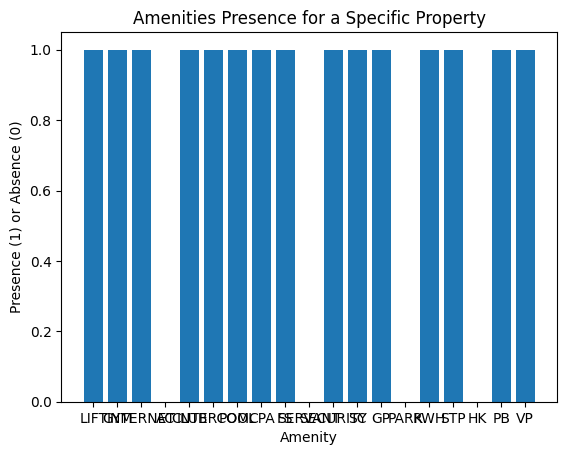

In [92]:
import matplotlib.pyplot as plt

# Assuming 'amenities' column is present in your dataset
# Assuming 'amenities' column now contains dictionaries

# Choose a specific row for visualization (you can change the index)
row_to_visualize = 0

# Get the amenities dictionary for the selected row
amenities_dict = data['amenities'].iloc[row_to_visualize]

# Create a bar plot for the amenities
plt.bar(amenities_dict.keys(), amenities_dict.values())
plt.xlabel('Amenity')
plt.ylabel('Presence (1) or Absence (0)')
plt.title('Amenities Presence for a Specific Property')
plt.show()


In [93]:
boolean_dict = {
    'LIFT': True,
    'GYM': True,
    'INTERNET': True,
    'AC': False,
    'CLUB': True,
    'INTERCOM': True,
    'POOL': True,
    'CPA': True,
    'FS': True,
    'SERVANT': False,
    'SECURITY': True,
    'SC': True,
    'GP': True,
    'PARK': False,
    'RWH': True,
    'STP': True,
    'HK': False,
    'PB': True,
    'VP': True
}

# Convert boolean values to integers
integer_dict = {key: int(value) for key, value in boolean_dict.items()}

# Print the resulting dictionary
print(integer_dict)


{'LIFT': 1, 'GYM': 1, 'INTERNET': 1, 'AC': 0, 'CLUB': 1, 'INTERCOM': 1, 'POOL': 1, 'CPA': 1, 'FS': 1, 'SERVANT': 0, 'SECURITY': 1, 'SC': 1, 'GP': 1, 'PARK': 0, 'RWH': 1, 'STP': 1, 'HK': 0, 'PB': 1, 'VP': 1}


# Water_supply

In [94]:
data['water_supply']

0          CORP_BORE
1        CORPORATION
2          CORP_BORE
3        CORPORATION
4        CORPORATION
            ...     
20527       BOREWELL
20528    CORPORATION
20529       BOREWELL
20530      CORP_BORE
20531    CORPORATION
Name: water_supply, Length: 20532, dtype: object

In [95]:
data['water_supply'].value_counts()

water_supply
CORP_BORE      10709
CORPORATION     6729
BOREWELL        3094
Name: count, dtype: int64

In [96]:
data['water_supply'].describe()

count         20532
unique            3
top       CORP_BORE
freq          10709
Name: water_supply, dtype: object

# Building_type

In [97]:
data['building_type']

0        AP
1        AP
2        AP
3        IH
4        IH
         ..
20527    AP
20528    IH
20529    AP
20530    AP
20531    IH
Name: building_type, Length: 20532, dtype: object

In [98]:
data['building_type'].value_counts()

building_type
IF    9240
AP    8876
IH    2399
GC      17
Name: count, dtype: int64

In [99]:
data['building_type'].describe()

count     20532
unique        4
top          IF
freq       9240
Name: building_type, dtype: object

# Balconies

In [100]:
data['balconies']

0        2.0
1        2.0
2        3.0
3        0.0
4        1.0
        ... 
20527    2.0
20528    2.0
20529    2.0
20530    3.0
20531    1.0
Name: balconies, Length: 20532, dtype: float64

In [101]:
q3 = data['balconies'].quantile(0.75)
q1 = data['balconies'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data['balconies'].describe()

(5.0,
 -3.0,
 count    20532.000000
 mean         1.149523
 std          0.993549
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          2.000000
 max         13.000000
 Name: balconies, dtype: float64)

In [102]:
data['balconies'] = data['balconies'].clip(lower_threshold, upper_threshold)

In [103]:
data['balconies'].describe()

count    20532.000000
mean         1.148208
std          0.984909
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balconies, dtype: float64

In [104]:
data['balconies'].value_counts()

balconies
1.0    8010
0.0    5901
2.0    4687
3.0    1594
4.0     291
5.0      49
Name: count, dtype: int64

# EDA

In [105]:
data.columns

Index(['type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

Text(0.5, 1.0, 'Rental according to building_type')

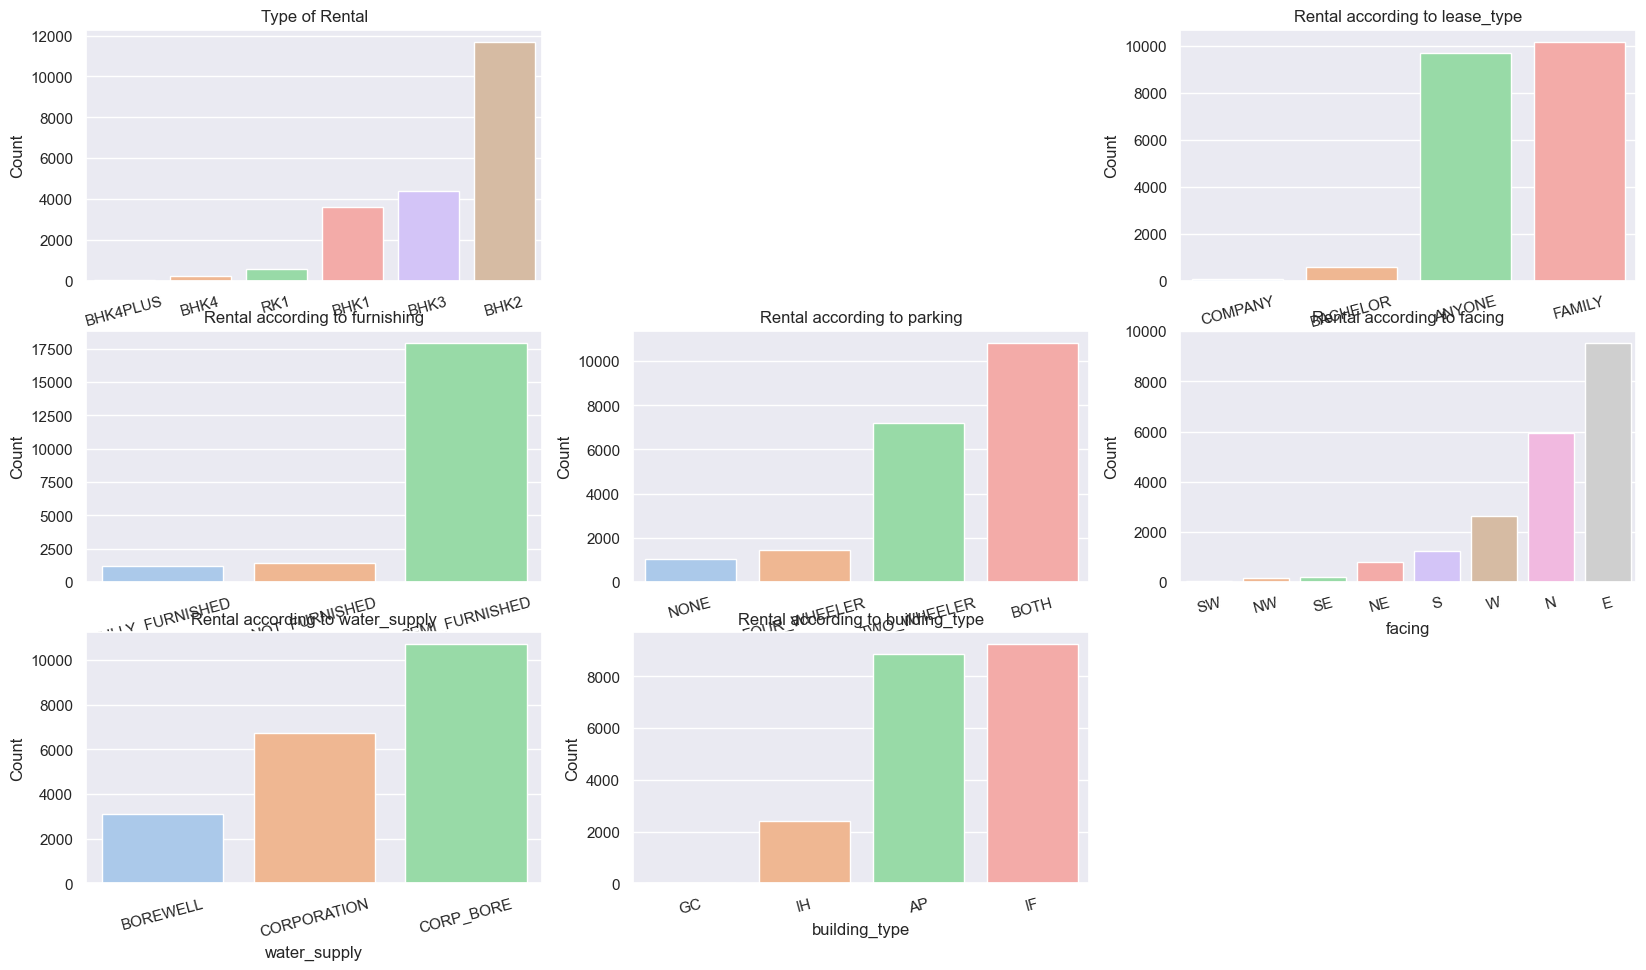

In [106]:
#Plotting the count plot for all the categorical columns

sns.set_theme(style="darkgrid", palette="pastel")
plt.figure(figsize=(20,15)) #breadth,length
#type
plt.subplot(431)
#barplot 0r countplot its same.Barplot panduna order of value_counts ta irrukanum.
sns.countplot(x=data['type'],order=data['type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('type')
plt.ylabel('Count')
plt.title('Type of Rental')

#locality


#lease_type
plt.subplot(433)
sns.countplot(x=data['lease_type'],order=data['lease_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('lease_type')
plt.ylabel('Count')
plt.title('Rental according to lease_type')

#furnishing  
plt.subplot(434)
sns.countplot(x=data['furnishing'],order=data['furnishing'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('furnishing')
plt.ylabel('Count')
plt.title('Rental according to furnishing')

#parking 
plt.subplot(435)
sns.countplot(x=data['parking'],order=data['parking'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('parking')
plt.ylabel('Count')
plt.title('Rental according to parking')

#facing
plt.subplot(436)
sns.countplot(x=data['facing'],order=data['facing'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('facing')
plt.ylabel('Count')
plt.title('Rental according to facing')

#amenities
#plt.subplot(437)
#sns.countplot(x=data['amenities'],order=data['amenities'].value_counts().index[::-1])
#plt.xticks(rotation=15)
#plt.xlabel('amenities')
#plt.ylabel('Count')
#plt.title('Rental according to amenities')

#water_supply 
plt.subplot(437)
sns.countplot(x=data['water_supply'],order=data['water_supply'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('water_supply')
plt.ylabel('Count')
plt.title('Rental according to water_supply')

#building_type
plt.subplot(438)
sns.countplot(x=data['building_type'],order=data['building_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('building_type')
plt.ylabel('Count')
plt.title('Rental according to building_type')


In [107]:
type_order = data.groupby('type')['rent'].mean().reset_index().sort_values('rent')["type"]
locality_order = data.groupby("locality")['rent'].mean().reset_index().sort_values('rent')['locality']
lease_type_order = data.groupby("lease_type")['rent'].mean().reset_index().sort_values('rent')['lease_type']
furnishing_order = data.groupby("furnishing")['rent'].mean().reset_index().sort_values('rent')['furnishing']
parking_order = data.groupby('parking')['rent'].mean().reset_index().sort_values('rent')['parking']
facing_order = data.groupby('facing')['rent'].mean().reset_index().sort_values('rent')["facing"]
water_supply_order = data.groupby('water_supply')['rent'].mean().reset_index().sort_values('rent')["water_supply"]
building_type_order = data.groupby('building_type')['rent'].mean().reset_index().sort_values('rent')["building_type"]

Text(0.5, 1.0, 'Building_type vs mean of renal')

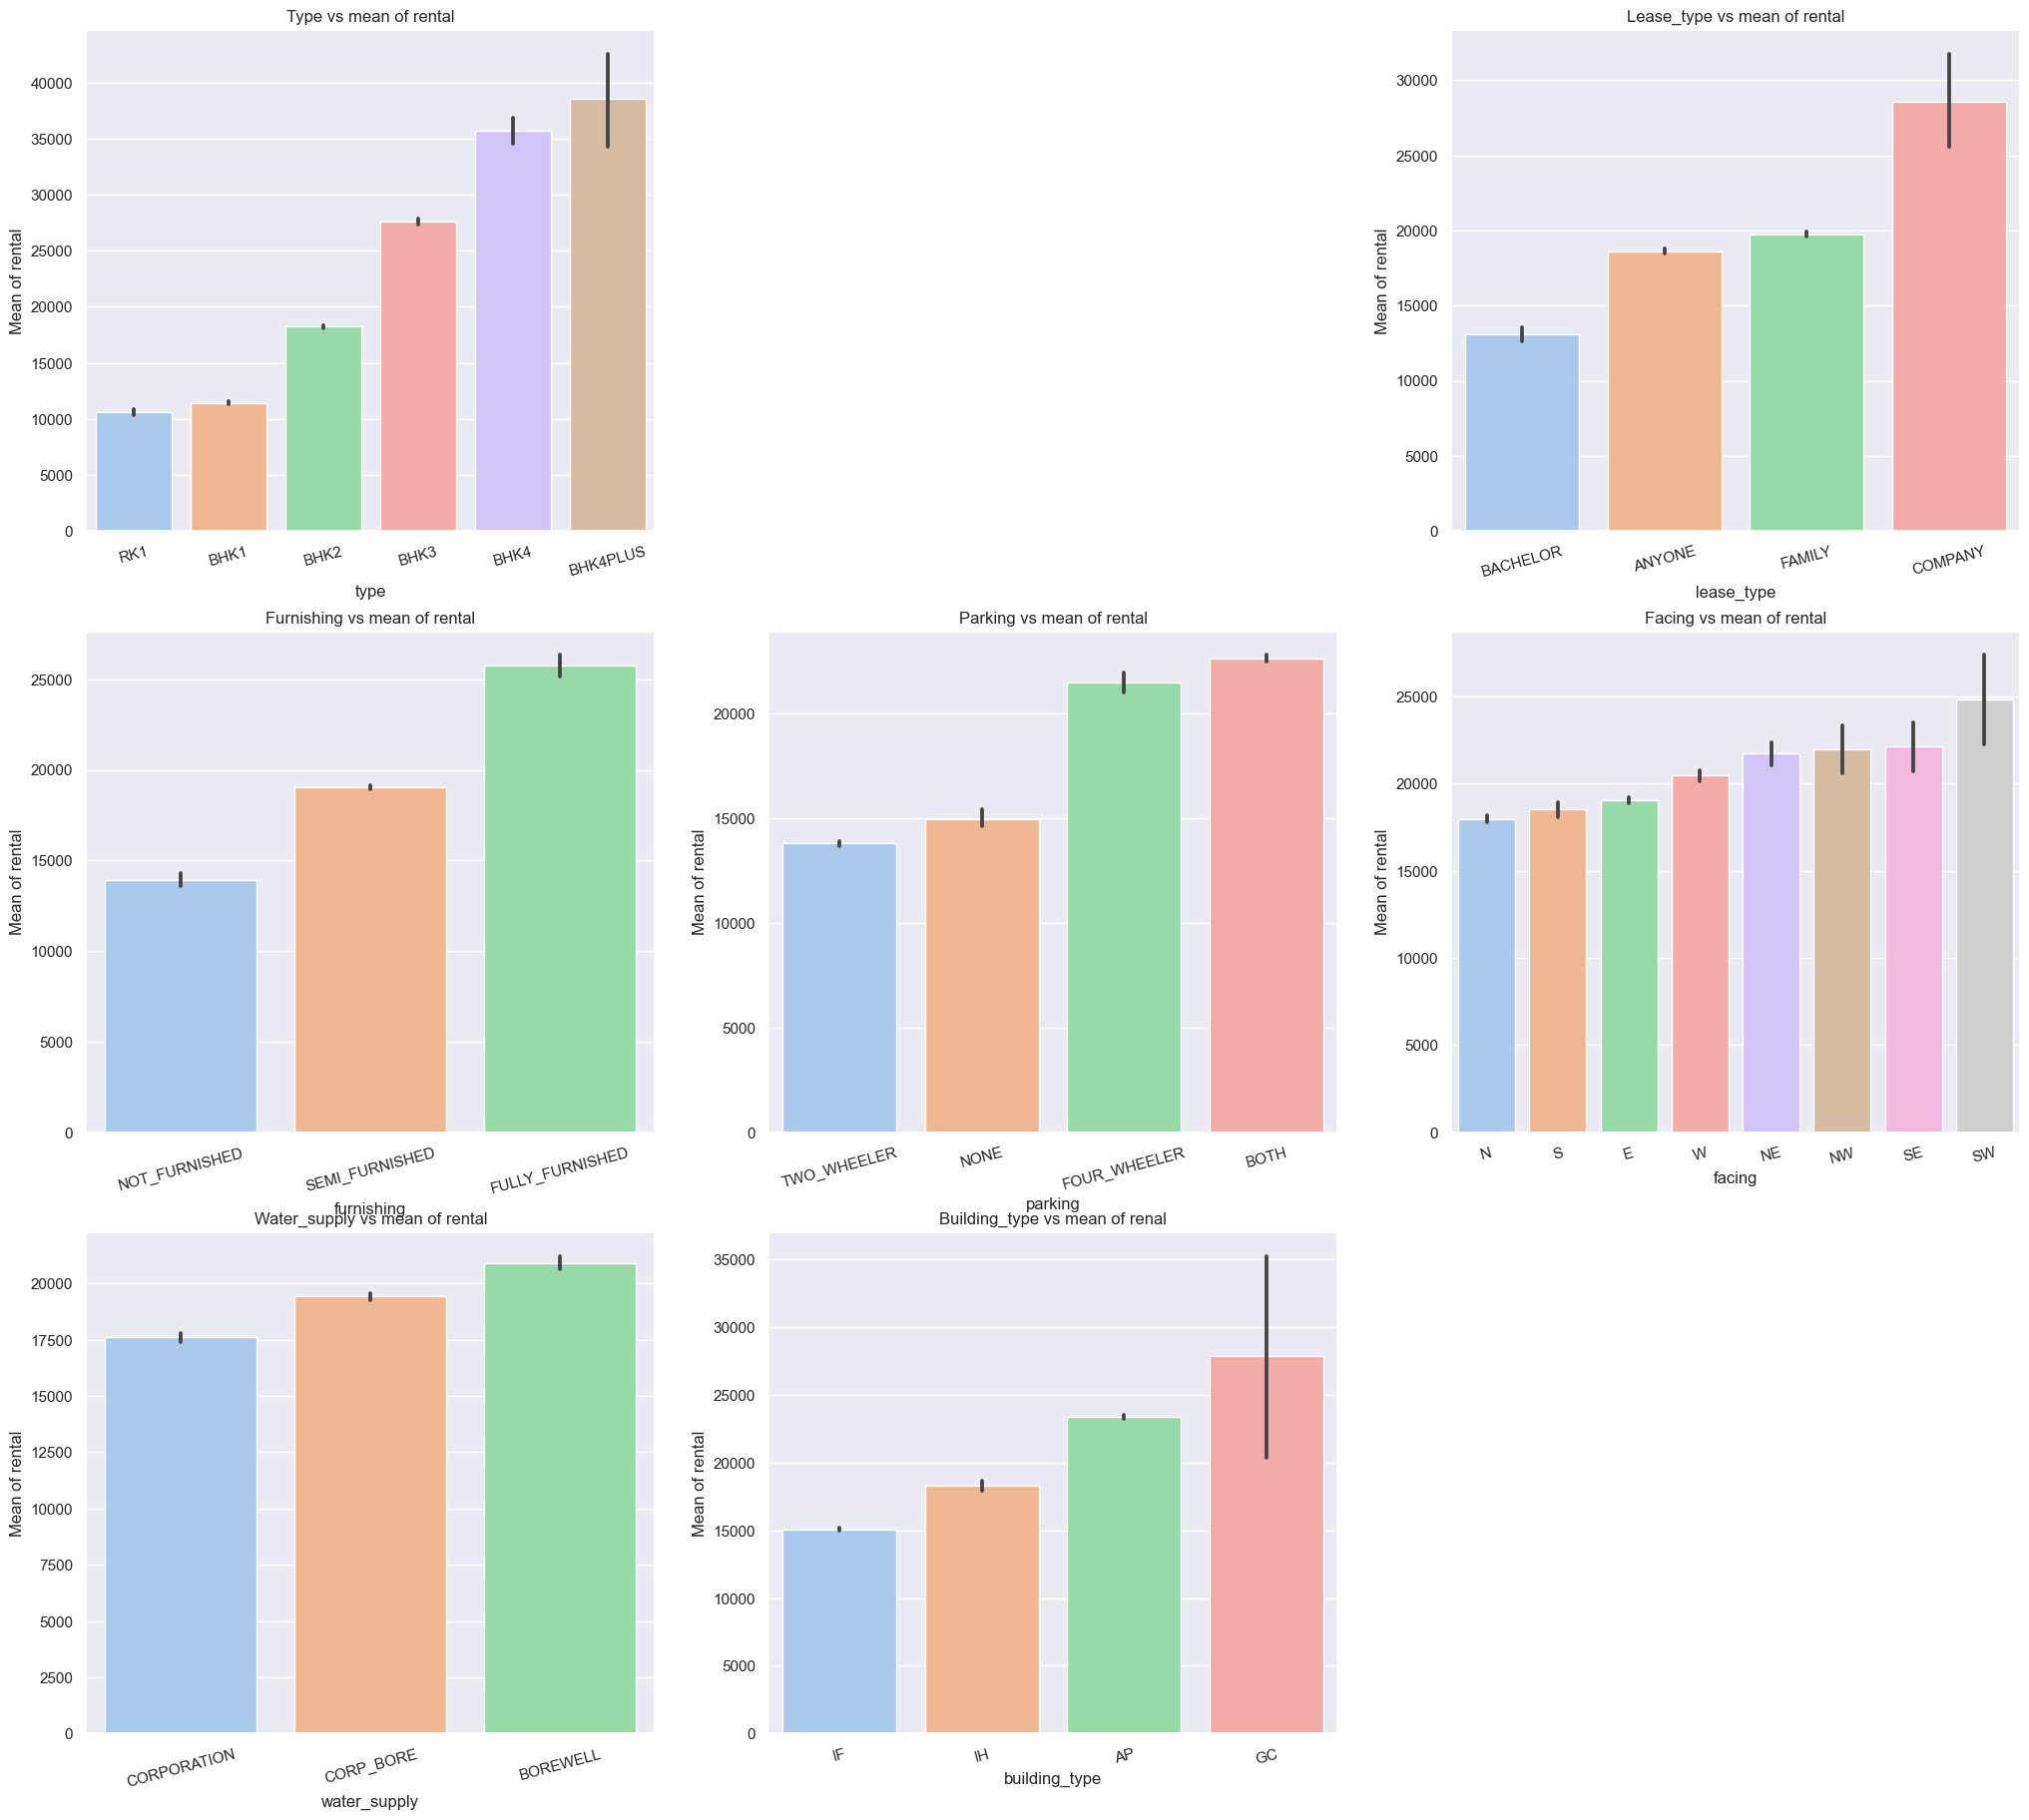

In [108]:
#plotting for feature and target foe all categorical columns
plt.figure(figsize=(25,30))

#type
plt.subplot(431)
#barplot 0r countplot its same.Barplot panduna order of value_counts ta irrukanum.
sns.barplot(x=data['type'],y=data['rent'],order=type_order)
plt.xticks(rotation=15)
plt.xlabel('type')
plt.ylabel('Mean of rental')
plt.title('Type vs mean of rental')

#locality
#plt.subplot(432)
#sns.barplot(x=data['locality'],y=data['rent'],order=locality_order)
#plt.xticks(rotation=15)
#plt.xlabel('locality')
#plt.ylabel('Mean of rental')
#plt.title('Locality vs mean of rental')

#lease_type
plt.subplot(433)
sns.barplot(x=data['lease_type'],y=data['rent'],order=lease_type_order)
plt.xticks(rotation=15)
plt.xlabel('lease_type')
plt.ylabel('Mean of rental')
plt.title('Lease_type vs mean of rental')

#furnishing  
plt.subplot(434)
sns.barplot(x=data['furnishing'],y=data['rent'],order=furnishing_order)
plt.xticks(rotation=15)
plt.xlabel('furnishing')
plt.ylabel('Mean of rental')
plt.title('Furnishing vs mean of rental')

#parking 
plt.subplot(435)
sns.barplot(x=data['parking'],y=data['rent'],order=parking_order)
plt.xticks(rotation=15)
plt.xlabel('parking')
plt.ylabel('Mean of rental')
plt.title('Parking vs mean of rental')

#facing
plt.subplot(436)
sns.barplot(x=data['facing'],y=data['rent'],order=facing_order)
plt.xticks(rotation=15)
plt.xlabel('facing')
plt.ylabel('Mean of rental')
plt.title('Facing vs mean of rental')

#amenities
#plt.subplot(437)
#sns.countplot(x=data['amenities'],order=data['amenities'].value_counts().index[::-1])
#plt.xticks(rotation=15)
#plt.xlabel('amenities')
#plt.ylabel('Count')
#plt.title('Rental according to amenities')

#water_supply 
plt.subplot(437)
sns.barplot(x=data['water_supply'],y=data['rent'],order=water_supply_order)
plt.xticks(rotation=15)
plt.xlabel('water_supply')
plt.ylabel('Mean of rental')
plt.title('Water_supply vs mean of rental')

#building_type
plt.subplot(438)
sns.barplot(x=data['building_type'],y=data['rent'],order=building_type_order)
plt.xticks(rotation=15)
plt.xlabel('building_type')
plt.ylabel('Mean of rental')
plt.title('Building_type vs mean of renal')


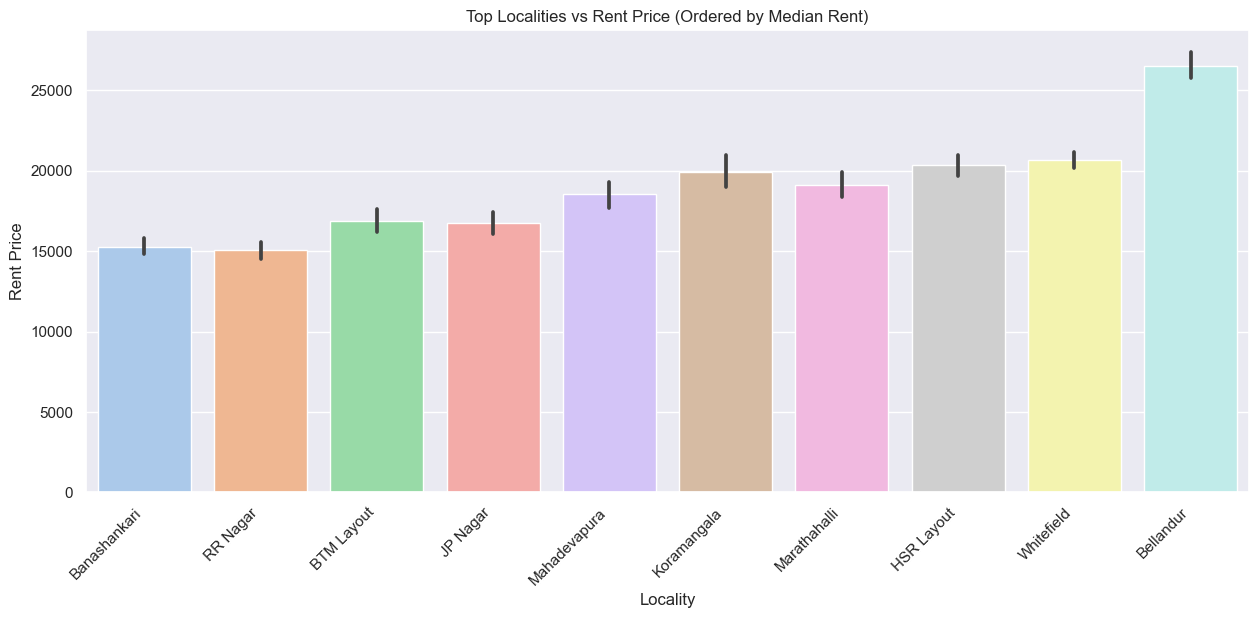

In [109]:
# Assuming 'locality' and 'rent' columns are present in your dataset
# Assuming 'locality' column is cleaned and has a suitable format

# Choose the top N localities to plot
top_localities = data['locality'].value_counts().head(10).index

# Filter the dataset for the top localities
top_localities_data = data[data['locality'].isin(top_localities)]

# Calculate the median rent for each top locality
median_rent_by_locality = top_localities_data.groupby('locality')['rent'].median()
# Order the localities based on median rent
ordered_localities = median_rent_by_locality.sort_values().index

# Bar plot for top localities vs rent, ordered by median rent
plt.figure(figsize=(15, 6))
sns.barplot(x='locality', y='rent', data=top_localities_data, order=ordered_localities)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Locality')
plt.ylabel('Rent Price')
plt.title('Top Localities vs Rent Price (Ordered by Median Rent)')
plt.show()


C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

Text(0.5, 1.0, 'Rent vs bathroom')

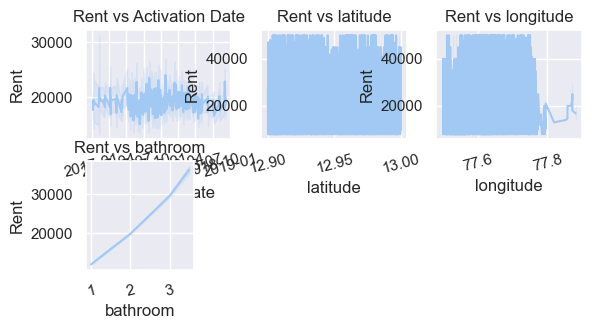

In [110]:
#activation_date
plt.subplot(331)
sns.lineplot(data['activation_date'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('Activation Date')
plt.ylabel('Rent')
plt.title('Rent vs Activation Date')

#latitude  
plt.subplot(332)
sns.lineplot(data['latitude'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('latitude')
plt.ylabel('Rent')
plt.title('Rent vs latitude')

#longitude
plt.subplot(333)
sns.lineplot(data['longitude'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('longitude')
plt.ylabel('Rent')
plt.title('Rent vs longitude')
#bathroom  
plt.subplot(345)
sns.lineplot(data['bathroom'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('bathroom')
plt.ylabel('Rent')
plt.title('Rent vs bathroom')

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

Text(0.5, 1.0, 'Rent vs balconies')

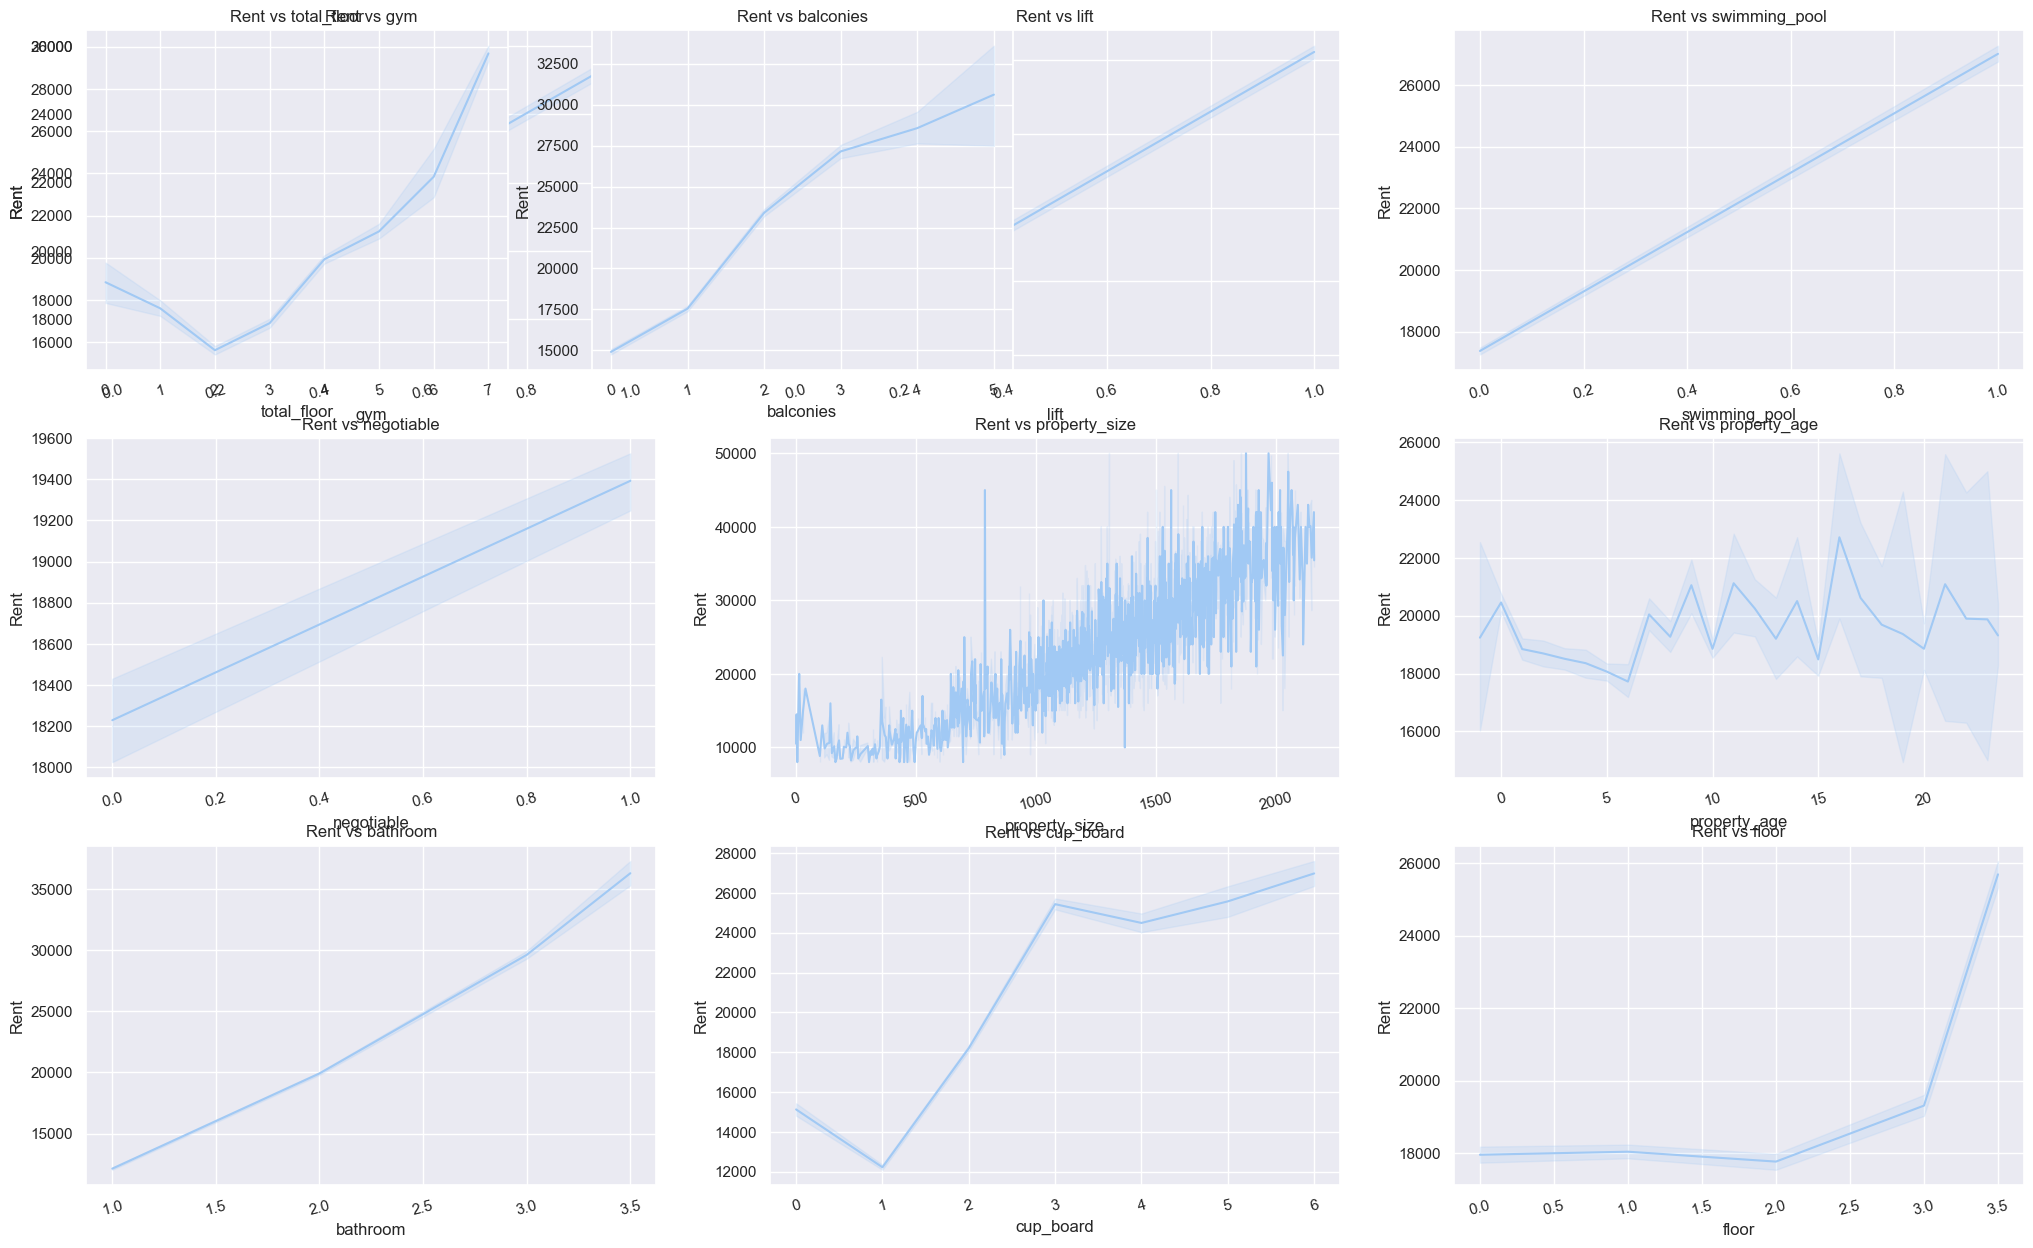

In [111]:
#Numerical Columns plot
plt.figure(figsize=(25,15))

#gym 
plt.subplot(331)
sns.lineplot(data['gym'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('gym')
plt.ylabel('Rent')
plt.title('Rent vs gym')

#lift                        
plt.subplot(332)
sns.lineplot(data['lift'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('lift')
plt.ylabel('Rent')
plt.title('Rent vs lift')

#swimming_pool   
plt.subplot(333)
sns.lineplot(data['swimming_pool'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('swimming_pool')
plt.ylabel('Rent')
plt.title('Rent vs swimming_pool')

#negotiable 
plt.subplot(334)
sns.lineplot(data['negotiable'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('negotiable')
plt.ylabel('Rent')
plt.title('Rent vs negotiable')

#property_size
plt.subplot(335)
sns.lineplot(data['property_size'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('property_size')
plt.ylabel('Rent')
plt.title('Rent vs property_size')

#property_age
plt.subplot(336)
sns.lineplot(data['property_age'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('property_age')
plt.ylabel('Rent')
plt.title('Rent vs property_age')

#bathroom  
plt.subplot(337)
sns.lineplot(data['bathroom'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('bathroom')
plt.ylabel('Rent')
plt.title('Rent vs bathroom')

#cup_board     
plt.subplot(338)
sns.lineplot(data['cup_board'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('cup_board')
plt.ylabel('Rent')
plt.title('Rent vs cup_board')

#floor                     
plt.subplot(339)
sns.lineplot(data['floor'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('floor')
plt.ylabel('Rent')
plt.title('Rent vs floor')

#total_floor 
plt.subplot(341)
sns.lineplot(data['total_floor'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('total_floor')
plt.ylabel('Rent')
plt.title('Rent vs total_floor')

#balconies 
plt.subplot(342)
sns.lineplot(data['balconies'], data['rent'])
plt.xticks(rotation=15)
plt.xlabel('balconies')
plt.ylabel('Rent')
plt.title('Rent vs balconies')



In [112]:
del data['property_age']
del data['latitude']
del data['longitude']
del data['activation_date']
del data['amenities']

In [113]:
data['locality'].value_counts().unique()

array([1040,  682,  644,  473,  433,  432,  431,  428,  427,  362,  360,
        326,  322,  304,  288,  275,  252,  248,  243,  234,  227,  222,
        212,  208,  205,  194,  181,  173,  164,  149,  144,  143,  135,
        132,  131,  118,  113,  111,  106,  102,   98,   97,   95,   93,
         85,   83,   81,   79,   75,   74,   69,   68,   66,   64,   62,
         58,   55,   53,   52,   50,   49,   48,   47,   46,   45,   44,
         41,   40,   39,   38,   37,   36,   35,   34,   33,   32,   31,
         30,   29,   28,   27,   26,   25,   24,   23,   22,   21,   20,
         19,   18,   17,   16,   15,   14,   13,   12,   11,   10,    9,
          8,    7,    6,    5,    4,    3,    2,    1], dtype=int64)

In [114]:
# Assuming 'locality' column is present in your dataset
locality_counts = data['locality'].value_counts()

# Iterate over unique values and their counts
for locality, count in zip(locality_counts.index, locality_counts.values):
    print(f"Locality: {locality}, Count: {count}")
 




Locality: Whitefield, Count: 1040
Locality: HSR Layout, Count: 682
Locality: Banashankari, Count: 644
Locality: Marathahalli, Count: 473
Locality: Bellandur, Count: 433
Locality: Mahadevapura, Count: 432
Locality: JP Nagar, Count: 431
Locality: RR Nagar, Count: 428
Locality: BTM Layout, Count: 427
Locality: Koramangala, Count: 362
Locality: Jayanagar, Count: 360
Locality: Munnekollal, Count: 326
Locality: BTM 2nd Stage, Count: 322
Locality: Varthur, Count: 304
Locality: Vijaya Nagar, Count: 288
Locality: Kaggadasapura, Count: 275
Locality: Basavanagudi, Count: 252
Locality: Brookefield, Count: 248
Locality: Rajaji Nagar, Count: 243
Locality: Indiranagar, Count: 234
Locality: Nagarbhavi, Count: 227
Locality: Ejipura, Count: 222
Locality: Kumaraswamy Layout, Count: 212
Locality: Kasavanahalli, Count: 208
Locality: Bommanahalli, Count: 205
Locality: Basaveshwar Nagar, Count: 194
Locality: Uttarahalli Hobli, Count: 181
Locality: Hoodi, Count: 173
Locality: C V Raman Nagar, Count: 173
Local

In [115]:
# Assuming 'locality' column is present in your dataset
locality_mapping = {label: idx for idx, label in enumerate(data['locality'].unique())}

# Create a new column 'locality_encoded' with label-encoded values
data['locality_encoded'] = data['locality'].map(locality_mapping)

# Display the mapping between original labels and encoded labels
print("Label Mapping:")
print(locality_mapping)


Label Mapping:
{'Whitefield': 0, 'Bellandur': 1, 'Thiruvanmiyur': 2, 'Attiguppe': 3, 'Kodihalli': 4, 'Seetharampalya,Hoodi': 5, 'Narayanappa Garden,Whitefield': 6, 'HSR Layout 5th Sector': 7, 'Banashankari': 8, 'RR Nagar': 9, 'ITPL Residential Flats': 10, 'Raja Rajeshwari Nagar': 11, 'Prestige Shanthinikethan, Bengaluru, Karnataka, India': 12, 'Murugeshpalya': 13, 'Sheshadripuram': 14, 'Cox Town': 15, 'BTM 2nd Stage': 16, 'Chikkakannalli': 17, 'agara': 18, 'Doddanekkundi': 19, 'Munnekollal': 20, 'Hoodi Railway Station, 1, Sadaramangala Road, Kodigehalli, Krishnarajapura, Bengaluru, Karnataka 560036, India': 21, 'Garudachar Palya,Mahadevapura': 22, 'Bommanahalli': 23, 'Hoodi': 24, 'Mahadevapura': 25, 'Viveka Nagar': 26, 'Kadubeesanahalli,': 27, 'Sanjeevini Nagar': 28, 'Doddanekundi': 29, 'Indiranagar': 30, 'Brookefield': 31, 'New Tippasandra': 32, 'JP Nagar 1st Phase': 33, 'Vimanapura': 34, 'Jayanagar': 35, 'Uttarahalli Hobli': 36, 'Kaikondrahalli': 37, 'Kaggadasapura': 38, 'Adugodi': 3

In [116]:
data.shape

(20532, 20)

# Encoding Categorical variables

In [118]:
#One-hot-encoding
data = pd.get_dummies(data,columns=['type'],dtype=int)
data = pd.get_dummies(data,columns=['lease_type'],dtype=int)
data = pd.get_dummies(data,columns=['furnishing'],dtype=int)
data = pd.get_dummies(data,columns=['facing'],dtype=int)
#data = pd.get_dummies(data,columns=['locality'],dtype=int)

#Label Encoding
data['parking'] = data['parking'].map({"TWO_WHEELER":0,"NONE":1,"FOUR_WHEELER":3,"BOTH":4})
data['water_supply'] = data['water_supply'].map({"CORPORATION":0,"CORP_BORE":1,"BOREWELL":2})
data['building_type'] = data['building_type'].map({"IF":0,"IH":1,"AP":2,"GC":3})
data['locality'] = data['locality'].map({'Whitefield': 0, 'Bellandur': 1, 'Thiruvanmiyur': 2, 'Attiguppe': 3, 'Kodihalli': 4, 'Seetharampalya,Hoodi': 5, 
'Narayanappa Garden,Whitefield': 6, 'HSR Layout 5th Sector': 7, 'Banashankari': 8, 'RR Nagar': 9,'ITPL Residential Flats': 10, 'Raja Rajeshwari Nagar': 11, 'Prestige Shanthinikethan, Bengaluru, Karnataka, India': 12,
'Murugeshpalya': 13, 'Sheshadripuram': 14, 'Cox Town': 15, 'BTM 2nd Stage': 16, 'Chikkakannalli': 17, 'agara': 18,
'Doddanekkundi': 19, 'Munnekollal': 20, 'Hoodi Railway Station, 1, Sadaramangala Road, Kodigehalli, Krishnarajapura, Bengaluru, Karnataka 560036, India': 21,
'Garudachar Palya,Mahadevapura': 22, 'Bommanahalli': 23, 'Hoodi': 24, 'Mahadevapura': 25, 'Viveka Nagar': 26,
'Kadubeesanahalli,': 27, 'Sanjeevini Nagar': 28, 'Doddanekundi': 29, 'Indiranagar': 30, 'Brookefield': 31,
'New Tippasandra': 32, 'JP Nagar 1st Phase': 33, 'Vimanapura': 34, 'Jayanagar': 35, 'Uttarahalli Hobli': 36,
'Kaikondrahalli': 37, 'Kaggadasapura': 38, 'Adugodi': 39, 'Jayanagar 5th Block': 40, 'Hanumantha Nagar': 41,
'Basaveshwar Nagar': 42, 'Kasavanahalli': 43, 'Thirumalashettyhally': 44, 'BTM Layout': 45, 'Chikkalasandra': 46,
'Yelachenahallli, Bengaluru, Karnataka, India': 47, 'Wilson Garden': 48, 'Gattigere': 49, 'Ejipura': 50, 'Vijaya Nagar': 51,
'Byrasandra': 52, 'Kadugodi': 53, 'Vignana Nagar': 54, 'Tippasandra': 55, 'Doddanakundi': 56, 'J P Nagar': 57, 
'Shivananda Nagar': 58, 'Marathahalli': 59, 'Prashant Nagar': 60, 'HSR Layout': 61, 'Dooravani Nagar': 62, 
'Koramangala': 63, 'Laxmi Sagar Layout,Mahadevapura': 64, 'Pulkeshi Nagar,Pulikeshi Nagar': 65, 'Domlur': 66,
'Srirampura': 67, 'Sudhama Nagar': 68, 'Nagondanahalli': 69, 'Kumaraswamy Layout': 70, 'Chandana,': 71,
'Rainbow Drive,Halanayakanahalli': 72, 'C V Raman Nagar': 73, 'Koramangala 4th Block, Bengaluru, Karnataka, India': 74,
'Eastwood Township,Harlur': 75, 'Dodda Nekkundi Extension,Doddanekkundi': 76, 'Banashankari 3rd Stage': 77, 
'Vivek Nagar': 78, 'Pulikeshi Nagar': 79, 'Banashankari Stage II': 80, 'Binnipete': 81, 
'12th Cross Road, Kasavanahalli, Bengaluru, Karnataka 560035, India,Bengaluru': 82, 'Vijayanagar': 83,
'JP Nagar, Phase 3': 84, 'Basavanagudi': 85, 'BTM Layout 1st Stage': 86, 'Shanti Nagar': 87, 
'Yelachenahallli,Kumaraswamy Layout': 88, 'Malleshpalya': 89, 'Jagadish Nagar,Kaggadasapura': 90, 
'Koramangala 5th Block': 91, 'HSR Layout 6th Sector': 92, 'Mullur': 93, 'Thubarahalli': 94, 'J.P. Nagar': 95,
'Bapuji Nagar': 96, 'Whitefield Main Road, Maheswari Nagar, Bengaluru, Karnataka, India': 97, 'JP Nagar': 98,
'Hongasandra': 99, 'Jeevan Bima Nagar': 100, 'Whitefield Hope Farm Junction': 101, 'Marathahalli, Bengaluru, Karnataka, India': 102, 
'Balagere': 103, 'Murgesh Pallya': 104, 'Padmanabhanagar': 105, 'EPIP Zone,Brookefield': 106, 'Rajarajeshwari Nagar': 107,
'Thyagaraja Nagar': 108, 'Cauvery Colony': 109, 'Pattandur Agrahara,Whitefield': 110, 'Immadihalli,Whitefield': 111, 
'Nallurahalli': 112, 'Uttarahalli': 113, 'Halanayakanahalli': 114, 'Chinnapanna Halli': 115, 'BTM Layout 1': 116,
'Cholourpalya': 117, 'JP Nagar 4th Phase': 118, 'Koramangala 1st Block': 119, 'Suddagunte Palya': 120, 'Doddakannelli': 121,
'Nagarbhavi': 122, 'Basaveshwara Nagar': 123, 'Arehalli': 124, 'Brookefield, Bengaluru, Karnataka, India': 125, 
'Teachers Colony, HSR Layout 5th Sector, Bengaluru, Karnataka, India': 126, 'Nagavarapalya': 127, 'Varthur': 128, 
'HAL 2nd Stage, Bengaluru, Karnataka, India': 129, 'Halasahalli': 130, 'Kadirenahalli': 131,
'Belatur Colony,Brindavan Layout': 132, 'Maithri Layout,Kadugodi': 133, 
'Varthur Lake, Varthur, Bengaluru, Karnataka, India': 134,
'Nallurahalli Road, Nallurhalli, Whitefield, Bengaluru, Karnataka, India': 135, 'J P Nagar 5 Phase': 136, 
'Sarjapur Road Till Wipro': 137, 'Prithvi Layout, Whitefield, Bengaluru, Karnataka 560066, India': 138, 
'Udaya Nagar,Mahadevapura': 139, 'JP Nagar Phase 6': 140, 'B Narayanapura': 141, 'Murgesh Pally': 142, 'ITPL': 143, 
'Koramangala 4th Block': 144, 'Basavanagudi, Thyagaraja Nagar, Bengaluru, Karnataka, India': 145, 'Nayandanahalli': 146, 
'1st Block Koramangala, Jakkasandra': 147, 'RR Layout,Padmanabhanagar': 148, 'varthur': 149, 
'New Baiyyappanahalli Extension': 150, 'Ramagondanahalli': 151, 'Deepanjali Nagar': 152,
'Bharath Housing Society Layout,Banashankari': 153, 'Gunjur Village': 154, 'Chamrajpet': 155, 
'Nagavarapalya,C V Raman Nagar': 156, 'Ulsoor': 157, 'Kodigehalli,Krishnarajapura': 158, 'Lakkasandra Extension': 159, 
'Anepalya': 160, 'Kamadhenu Nagar, B Narayanapura, Mahadevapura, Bengaluru, Karnataka, India': 161, 
'Varsova Layout,Kaggadasapura': 162, 'Rajaji Nagar': 163, 'Pantarapalya,Nayanda Halli': 164,
'JP Nagar 5th Phase, Bengaluru, Karnataka, India': 165, 'CV Raman Nagar': 166, 'Ambedkar Nagar,Whitefield': 167, 
'Roopena Agrahara': 168, 'AECS Layout': 169, 'Jakkasandra': 170, 'Bilekahalli': 171, 'Mangammanapalya': 172, 
'Yemalur,Marathahalli': 173, 'Hosakerehalli': 174, 'Kathriguppe': 175, 'MARATHALLI, MUNEKOLALA': 176,
'Koramangala 6th Block': 177, 'Dwaraka Nagar,Banashankari': 178, 'BTM Layout,': 179, 'Kamakshipalya': 180, 'Madiwala': 181, 
'Devasthanagalu,Balagere': 182, 'Koramanagala': 183, 'Nayanda Halli': 184, 'Ittamadu': 185, 'Green Glen Layout,Bellandur': 186,
'Haralur': 187, 'B Narayanapura,Mahadevapura': 188, 'Kumara Park West': 189, 'Channasandra': 190, 'Bhoganhalli': 191,
'Vignan Nagar Auto Stand, Namjoshi Road, Adarsh Vista, Bengaluru, Karnataka, India': 192, 'Basaweshwara Nagar': 193,
'Kumaraswamy Layout II Stage': 194, 'Koralur': 195, 'Jayanagar 1st Block,': 196, 'HSR Layout, 1st Sector': 197, 
'Indira Nagar': 198, 'Jaya Nagar T Block': 199, 'Silver Springs Layout,Munnekollal': 200, 
'Marathahalli Main, Raghavendra Layout, Gandhi Nagar, Munnekollal, Bengaluru, Karnataka, India': 201, 
'Doddanekkundi,Doddanekkundi': 202, 'Dasarhalli, , Banashankari Stage I': 203, 'Srinivaspura': 204,
'Rajarajeshwarinagar': 205, 'Hope Farm, Channasandra Main Road, Maithri Layout, Kadugodi,': 206,
'Krishnarajapuram': 207, '415, 16th Cross Rd, Sector 4, HSR Layout, Bengaluru, Karnataka 560102, India,Bengaluru': 208, 
'Kodichikknahalli': 209, 'Kadubeesanahalli': 210, 'Banashankari 3rd Stage, Banashankari, Bengaluru, Karnataka, India': 211,
'AGS Layout': 212, 'malleshwaram': 213, 'Brigade Harmony, Whitefield, State Highway 35, Prestige Ozone, Bengaluru, Karnataka, India': 214, 'Kundalahalli,Brookefield': 215, 'J P Nagar Phase 5,JP Nagar': 216, 'Graphite India Limited, Doddanakundi Industrial Area 2, Phase 1, Doddanekkundi, Bengaluru, Karnataka, India': 217, 'Tilak Nagar,Jayanagar': 218, 'Domlur 1st Stage': 219, 'Rajajinagar': 220, 'Vijaya Nagar II Stage': 221, 'Harlur': 222, 'Devarabisanahalli,Bellandur': 223, 'LBS Nagar': 224, 'Bellandur, Bengaluru, Karnataka, India': 225, 'Stage 2,BTM 2nd Stage': 226, 'Basavanagudi, Bengaluru, Karnataka, India': 227, 'Jogupalya': 228, 'Mahadevpura': 229, 'Jayanagar 4 Block, Jayanagar': 230, 'A Narayanapura': 231, 'Munnekolala': 232, 'Seshadripuram': 233, '8th B Cross, Venkatapura, Koramangala 1st Block, Bengaluru- 560034.': 234, 'J P Nagar Phase 5': 235, 'Vasanth Nagar': 236, 'New Thippasandra': 237, 'Silver Springs Layout, Munnekollal, Bengaluru, Karnataka, India': 238, 'Koramangala 3 Block': 239, 'Rajana Colony,C V Raman Nagar': 240, 'Jarganahalli': 241, 'Thigalarapalya,Hoodi': 242, 'Vignan Nagar': 243, 'Chandra Layout': 244, 'JP Nagar 5th Phase': 245, 'Mavalli': 246, 'Thubarahalli,Munnekollal': 247, 'HAL Road': 248, 'Kundalahalli,Whitefield': 249, 'BTM Layout 1, Bengaluru, Karnataka, India': 250, 'Tasker Town': 251, 'Ashok Nagar': 252, 'Malagala': 253, 'Siddapura,Whitefield': 254, 'Shivaji Nagar': 255, 'Chansandra': 256, 'Hoodi, Bengaluru, Karnataka, India': 257, 'Vibhuthipura': 258, 'Nallurhalli,Whitefield': 259, 'Kamaksipalya': 260, 'Basaveshwar Nagar 3rd Stage': 261, 'Krishnarajapura': 262, 'Adarsh Palm Retreat,Bellandur': 263, 'Doddanekundi,Doddanekkundi': 264, 'Rajajinagar 3rd Block': 265, 'Gattigere,RR Nagar': 266, 'Ankappa Layout,Uttarahalli Hobli': 267, 'Iblur Village,Bellandur': 268, 'Kariyammana Agrahara,Bellandur': 269, 'JP Nagar 6th Phase': 270, 'Cox Town, Bengaluru, Karnataka, India': 271, 'Jayanagara 9th Block, Jayanagar': 272, 'Jagadish Nagar': 273, 'Kundalahalli Colony,Brookefield': 274, 'Chikkabellandur': 275, '4th Block,Jayanagar': 276, 'Maruthi Mandira, 17th Cross Road, Vijaya Nagar': 277, 'Tavarekere': 278, 'Challaghatta': 279, 'Langford Gardens': 280, 'Annapoorneshwari Nagar': 281, 'Sector 7,Somasundarapalya': 282, 'Bellandur Gate, Bellandur': 283, 'Srinivasnagar': 284, 'KHB Games Village,Koramangala': 285, 'Panathur': 286, 'Banashankari Stage I': 287, 'Medavakkam': 288, 'Kalasipalya': 289, 'C V Raman Nagar, Bengaluru, Karnataka, India': 290, 'Bennigana Halli': 291, 'JP Nagar Phase 6,JP Nagar': 292, 'Rustam Bagh': 293, 'Munnireddy Layout,Panathur': 294, 'Munnekolla': 295, 'Kundalahalli': 296, 'Sri Jnanakshi Vidyaniketan, RR Nagar, Bengaluru, Karnataka, India': 297, 'Tyagaraja Nagar': 298, 'Vijaya Nagar, Bengaluru, Karnataka, India': 299, 'Cottonpete': 300, 'Shankarapura': 301, 'Chennappa Layout,Chinnapanna Halli': 302, 'Pai Layout, Bengaluru, Karnataka, India': 303, 'Jayanagara 9th Block': 304, 'Near G R Tech Park, Whitefield, Bangalore': 305, 'Basavanagara': 306, 'Kodbisanhalli, Kadubeesanahalli, Bengaluru, Karnataka, India': 307,'Lakkasandra': 308, 'Ramanashree Enclave,Bilekahalli': 309, 'HAL': 310, 'Frazer Town': 311,'Hanumanthnagar': 312, 'Vivek nagar': 313, 'Whitefield Main Road, Maithri Layout, Kadugodi, Bengaluru, Karnataka, India': 314, 'Doddanekundi,Mahadevapura': 315, 'Aaspire Heights, SGR Dental College Road, Kasavanahalli Village, Marathahalli, Bengaluru, Karnataka, India': 316, 'Chickpet': 317, 'Jayanagar 9th Block': 318, 'Nagarbhavi 1st Stage': 319, 'Kasavanahalli Off Sarjapur Road': 320, 'Rajaji Nagar, Bengaluru, Karnataka, India': 321, 'BANGALORE': 322, 'Nallurhalli': 323, 'Maruthi Sevanagar': 324, 'Mahadevapura, Bengaluru, Karnataka, India': 325, 'Raja Rajeshwari Nagar, Bengaluru, Karnataka, India': 326, 
'Gandhi Nagar,Marathahalli': 327, 'Srinivasa Nagar': 328, 'Moodalapalya': 329, '1st Block Koramangala': 330, 
'Shivananda Nagar, Jagadish Nagar, New Tippasandra, Bengaluru, Karnataka, India': 331,'White Orchids VSV Builders, Siddapura Road, Palm Meadows, Whitefield, Bengaluru, Karnataka, India': 332, 'Konena Agrahara': 333, 'Ayyappa Nagar,Krishnarajapura': 334, 'BTM Layout Stage 2': 335, 'Annapurneshwari Nagar': 336, 'Venkatapura': 337, 'Brindavan Nagar': 338, 'Samethanahalli': 339, 'HSR Layout, 22nd Main Road, Sector 1, Bengaluru, Karnataka, India': 340, 'Bendre Nagar': 341, 'Chamarajpet': 342, 'BSK 3rd Stage': 343, 'Sector 3, HSR Layout': 344, 'Banashankari 3rd stage': 345, 'Kodbisanhalli,': 346, 'Sadanandanagar': 347, 'Jaya Nagar 1st Block East': 348, 'House No., 8, Dr Omer Sherif Rd, Kanakapura, Basavanagudi, Bengaluru, Karnataka 560004, India,Bengaluru': 349, 'Kenchenhalli': 350, 'Green Glen Layout, Bellandur, Bengaluru, Karnataka, India': 351, 'Maruti Nagar, 1st Stage, BTM Layout, Bengaluru, Karnataka, India': 352, 'Gunjur': 353, 'HSR Layout, Sector 6': 354, 'Bismillahnagar': 355, 'Dattatreya Nagar,Hosakerehalli': 356, 'Thubarahalli,Whitefield': 357, 'Sampangi Rama Nagar': 358, 'Whitefield, Bengaluru, Karnataka, India': 359, 'Magadi Road Metro Station Building, 2nd Cross Rd, Keshava Nagar, Binnipete, Bengaluru, Karnataka, India': 360, 'AECS Layout, Sri Nivasa Reddy Layout, AECS Layout, Brookefield, Bengaluru, Karnataka': 361, '1st Stage, BTM Layout': 362, 'Jaya Nagar 9th Block': 363, 'Girinagar': 364, 'BTM Layout 2nd Stage': 365, 'Chikku Lakshmaiah Layout': 366, 'new bayappanahalli': 367, 'Austin Town': 368, 'Srirampura, Bengaluru, Karnataka, India': 369, 'Eshwara Layout,Indiranagar': 370, 'Jayanagar, Bengaluru, Karnataka, India': 371, 'Bhuvaneshwari Nagar': 372, 'ITI Layout Sector 7': 373, 'Kumarapark West': 374, 'Vijayanagar 2nd stage': 375, 'Turahalli, Thurahalli, Bengaluru, Karnataka, India': 376, 'Arehalli,Chikkalasandra': 377, 'Kempapura Agrahara': 378, 'Cooke Town': 379, 'Abbaiah Reddy Layout, Bengaluru, Karnataka, India': 380, 'JP Nagar, 6th phase': 381, 'Dairy Circle': 382, 'Sector 4,HSR Layout 5th Sector': 383, 'Hampi Nagar': 384, 'Ags Layout, Banashankari, Bengaluru, Karnataka, India': 385, 'Carmelaram': 386, '5, Kuvempu Rd, A Narayanapura, Udaya Nagar, Mahadevapura': 387, 'Phase 1,Whitefield': 388, 'New Thipasandra': 389, 'Virat Nagar': 390, 'Maruti Nagar': 391, 'Shivaji Nagar, Bharati Nagar': 392, 'RR Nagar, Bengaluru, Karnataka, India': 393, 'Pai Layout': 394, 'Chansandra, Bengaluru, Karnataka, India': 395, 'Annasandrapalya Extension': 396, '1st Stage,BTM Layout 1': 397, 'Industrial Area,Hoodi': 398, 'Sarjapur Road Post Railway Crossing': 399, 'Ramanjaneyanagar': 400, 'Kundalahalli Gate': 401, 'Sunkadakatte': 402, 'BTM Layout, Stage 1': 403, 'Kasavanahalli Village,Marathahalli': 404, 'EPIP Zone Whitefield Road, Near ITPB. Bengaluru, Karnataka, India': 405, 'Malleshwaram West': 406, 'Yemalur Main Road, Kempapura, Bellandur, Bengaluru, Karnataka, India': 407, 'Victoria Layout': 408, 'Kempegowda Nagar': 409, 'Mudalapalya, Vijaya Nagar, Bengaluru, Karnataka, India': 410, 'HAL 3rd Stage': 411, 'Jaya Nagar': 412, 'immadihalli': 413, 'Mallathahalli': 414, 'Garvebhavi Palya': 415, 'Sathya Sai Layout,Whitefield': 416, 'Yemalur': 417, 'RR Bakery, Annasandrapalya Extension, Vinayaka Nagar, Vimanapura, Bengaluru, Karnataka, India': 418, '2nd Stage, Rajaji Nagar': 419, 'HSR Layout, Sector 1': 420, 'JCR Layout, Panathur': 421, 'Halasuru Police Station, Cambridge Layout, Ulsoor, Bengaluru, Karnataka, India': 422, 'Pukhraj Layout, Adugodi, Bengaluru, Karnataka, India': 423, 'Shanthi nagar': 424, 'Venkatapura, Koramangala': 425, 'BTM layout': 426, 'J. P. Nagar': 427, 'Janatha Colony,Chikkabellandur': 428, 'Prestige Ferns Residency': 429, 'Neelasandra': 430, 'BSK 2nd Stage': 431, 'Kasavanahalli,': 432, 'Manjunatha Lay Out,Murgesh Pallya': 433, 'jayanagar 9th block': 434, 'Srinagar': 435, 'Poornapragna Housing Society Layout': 436, 'HSR layout': 437, 'Bommanahalli, Roopena Agrahara, Bengaluru, Karnataka, India': 438, 'JP Nagar Phase 1': 439, 'HSR Layout Sector 7': 440, 'Devasthanagalu': 441, 'HSR Layout sec7': 442, 'Jagadish Nagar, Kaggadasapura, Bengaluru, Karnataka, India': 443, 'Nagapura': 444, 'Stage 1, BTM Layout': 445, 'govt school rd, opp brs global school, Kasavanahalli, Bengaluru, Karnataka 560035, India,Bengaluru': 446, 'Banashankari 2nd Stage': 447, 'Valliyamma Layout,Kaikondrahalli': 448, 'BTM 2nd Stage, Bengaluru, Karnataka, India': 449, 'Kengunte': 450, 'Koramangala 7th Block': 451, 'BTM 1st Stage': 452, 'Chikka Tirupathi': 453, 'ITI Layout': 454, 'Perungudi': 455, 'Munnekollal, Bengaluru, Karnataka, India': 456, 'Jeevan Bhima Nagar': 457, 'Venkatapura New Extn, HSR Layout 5th Sector, Bengaluru, Karnataka 560034, India,Bengaluru': 458, 'vijayanagar': 459, 'Sripuram, Kumara Park West, Malleshwaram, Bengaluru, Karnataka, India': 460, 'Whitefield, Dodsworth Layout, Bengaluru, Karnataka, India': 461, 'Basavanna Nagar': 462, 'Murugesh Pallya': 463, 'Maruthi Nagar': 464, 'Ramagondanahalli,Whitefield': 465, 'HSR 6th Sector': 466, 'Jayanagara': 467, 'Sampangiram Nagar': 468, 'Pai Layout,Mahadevapura': 469, 'NGR Layout,Bommanahalli': 470, 'Mysore Road Satellite Bus Station, Bengaluru, Karnataka, India': 471, '420/4, 13th Main Road, 5th Phase, J P Nagar Phase 5, JP Nagar, Bengaluru, Karnataka 560078, India,Bengaluru': 472, 'Devasthanagalu,Varthur': 473, 'Munivenkatppa Layout,Bilekahalli': 474, 'shivajinagar': 475, 'Ramamohanapuram': 476, 'Muneshwara Block': 477, 'Kasavanahalli, Bengaluru, Karnataka, India': 478, 'Pristine Park, HAL 3rd Stage, Bhoomi Reddy Colony, New Tippasandra, Bengaluru, Karnataka 560075, India': 479, 'Papareddipalya': 480, 'EPIP Zone,Whitefield': 481, 'ITPL, Pattandur Agrahara, Whitefield, Bengaluru, Karnataka 560066, India': 482, 'VV Puram': 483, 'Chinnapanahalli': 484, 'Dodsworth Layout,Whitefield': 485, 'Jayanagar2nd Block': 486, 'Sivanchetti Gardens': 487, 'Hombegowda Nagar': 488, 'Banashankari 3rd Stage,Chikkalasandra': 489, 'Rock Heights, 13th Cross Road, Kaggadasapura, Bengaluru, Karnataka, India': 490, 'Ittamadu Bus Stop, 3rd Main Road, Banashankari, Bengaluru, Karnataka, India': 491, 'Koramangala,': 492, 'Sarjapur Road Wipro To Railway Crossing': 493, 'Rajaji Nagar subramanya nagar B.black sbl bank': 494, 'Udaya Nagar': 495, 'Lakshminarayanapuram': 496, 'Hoodi , Saketha Nagar, Hoodi, Bengaluru, Karnataka, India': 497, 'Annasandra Palya': 498, 'Tigalarpalya,Brookefield': 499, 'Jayamahal': 500, 'Indira Nagar II Stage, Hoysala Nagar, Indiranagar, Bengaluru, Karnataka 560038, India': 501, 'Jayanagar East': 502, 'Roopena Agrahara, Bommanahalli': 503, 'Vignan Ngar': 504, 'JP Nagar, 2nd Phase': 505, 'Suddaguntapalya': 506, 'Koramangala 2 Block': 507, 'Yettu Kodi, Yattakodi, Karnataka, India': 508, 'HSR Layout, Sector 2': 509, 'Btm Layout 2nd Stage': 510, 'shanti nagar': 511, 'BTM 1st Stage, Karnataka, India': 512, 'Eastwood Township,Kasavanahalli': 513, 'Adambakkam': 514, 'Jayanagar, 15 Main Road, 4T Block, Bengaluru, Karnataka, India': 515, 'Seetharampalya - Hoodi Road, Seetharampalya, Bengaluru, Karnataka, India': 516, 'JP Nagar 1st Phase, JP Nagar, Bengaluru, Karnataka, India': 517, 'Sarjapur': 518, 'Basava tonagudi': 519, 'Basavanagar': 520, 'Kodipur': 521, 'Devasthanagalu, Varthur': 522, 'Varsova Layout,C V Raman Nagar': 523, 'sarjapur main road': 524, 'Vinayaka Nagar': 525, 'KIADB Export Promotion Industrial Area,Whitefield': 526, 'Halanayakanahalli, Bengaluru, Karnataka, India': 527, 'Giri Nagar, Banashankari, Bengaluru, Karnataka, India': 528, 'Padmanabha Nagar': 529, 'Mangammanapalya, Bengaluru, Karnataka, India': 530, 'Smash it, Sector 7, Bengaluru, Karnataka, India': 531, 'AECS Layout,Marathahalli': 532, 'Shri Balaji Sarovar, Pattandhur Agrahar Village, Near E ...': 533, 'Banshankari 3rd Stage': 534, 'New Gurappana Palya': 535, 'Sadanandanagar, Bennigana Halli, Bengaluru, Karnataka, India': 536, 'Halasuru': 537, 'Richmond Town': 538, 'Vignan Nagar, Bengaluru, Karnataka, India': 539, 'Uber Verdant, Sy.No. 25/4, 24/2 ': 540, 'Vibhutipura': 541, 'Nagarbhavi 2nd Stage': 542, 'Nagarabhavi 2nd Stage': 543, 'JP Nagar 4th phase': 544, 'JP Nagar 7th Phase': 545, '1st Phase, JP Nagar': 546, 'Srinivapura Post': 547, 'HAL 3rd Stage, New Tippasandra, Bengaluru, Karnataka, India': 548, 'Basaveshvara Nagar': 549, 'Immadihalli, Whitefield, Bengaluru, Karnataka, India': 550, '10, 5th A Cross Rd, Lakshmi Layout, Gandhi Nagar, Munnekollal, Bengaluru, Karnataka 560037, India,Bengaluru': 551, 'Kodihalli on Old Airport Road': 552, 'Madhava Nagar': 553, 'Vijay nagar': 554, 'Malleshwaram': 555, 'Guttahalli': 556, '1st Sector,HSR Layout': 557, 'Chandapura': 558, 'RPC Layout, Vijaya Nagar': 559, 'BTM Layout 2nd stage': 560, 'Basaveshwara Nagar Circle, West Of Chord Road, 3rd Stage, Basaveshwar Nagar, Bengaluru, Karnataka 560079, India': 561, '3rd Sector, HSR Layout': 562, 'Yelachenahalli': 563, 'Maruthi Nagar,Attiguppe': 564, 'Shivanagar': 565, 'BEML Layout': 566, 'AECS Layout - D Block': 567, 'L B Shastry Nagar': 568, 'Sorahunase': 569, 'Koramangala 8th block': 570, 'Subramanyapura': 571, 'Banashankari Temple Ward': 572, 'Roopena Agrahara,Bommanahalli': 573, 'Seetharampalya, hoodi': 574, 'Rajarajeswari Nagar': 575, '147, Lakeshore Homes Road, Eastwood Twp, Kasavanahalli, Bengaluru, Karnataka 560035, India,Bengaluru': 576, 
'Frazer Trown': 577, 'Jayanagar 1st Block': 578, 'Balagere,Varthur': 579, 'Krishna Murthi Layout': 580, 
'Haralur Road, close to Bellandur Gate': 581, 'AECS Layout, Marathahalli': 582, 'JP Nagar Phase 5': 583,
'BEML Layout 3rd Stage,RR Nagar': 584, 'GM Palya': 585, 'Pattegarhpalya': 586, 'HSR Layout, Bengaluru, Karnataka, India': 58,
'Ambalipura': 588, 'White Field': 589, 'JP Nagar, Sarakki Gate, 1st Phase': 590, 'Kanakpura Main Road,': 591, 
'Brookefield Mall Bangalore, ITPL Main Road, AECS Layout, Brookefield, Bengaluru, Karnataka, India': 592, 'Govindaraja Nagar Ward': 593, 'Indira Nagar 1st Stage': 594, 'Jayanagar 6th Block': 595, 'H A L 2nd Stage': 596, 'Sheshadripuram, Bengaluru, Karnataka, India': 597, 'Reflex Housing Layout': 598, 'Sarjapur Road': 599, 'Jaya Nagar East,Jayanagar': 600, 'Jeevan Bima Nagar, Shivalingaiah Colony, Bengaluru, Karnataka, India': 601, 'Ranka Colony,Bilekahalli': 602, 'Koramangala 1st Block, HSR Layout 5th Sector': 603, 'Vidyaranya Nagar': 604, 'Garudachar Palya': 605, 'Doddakannalli': 606, 'Koramangala 3 Block,Koramangala': 607, 'Banashankari, Bengaluru, Karnataka, India': 608, 'Tigalarpalya': 609, 'SJR Watermark, Watermark Homes By SJR Primecorp, 1st Main Road, Harlur, Bengaluru, Karnataka, India': 610, 'ISRO Layout': 611, 'Bhoganhalli, Bengaluru, Karnataka, India': 612, 'Sector 2,HSR Layout': 613, 'HSR layout Sector 2': 614, 'Kaikondrahalli, Bengaluru, Karnataka, India': 615, 'Nayandahalli': 616, 'Murugeshpalya Airforce Camp, H A L Old Airport Rd, Kodihalli, Bengaluru, Karnataka, India': 617, 'Benson Town': 618, 'Prestige Ozone,Whitefield': 619, 'HSR Layout,': 620, 'Keshava Nagar,Binnipete': 621, 'Chamarajapete': 622, 'Siddapura': 623, 'Queens  road cross, shivajinagar, near congress bhavan': 624, 'Mailasandra': 625, 'kodihalli': 626, 'Srirampura Metro Station, Mahakavi Kuvempu Road, Ramamohanapuram, Bengaluru, Karnataka, India': 627, 'Basavanna Nagar,Krishnarajapura': 628, 'Madhura Nagar': 629, 'BEML Layout 6th Stage, Brookefield': 630, 'kadubeesanahalli': 631, 'Poornapragna Layout': 632, 'Kadugodi, Bengaluru, Karnataka, India': 633, 'null,null': 634, 'Virat Nagar, Bommanahalli, Bengaluru, Karnataka 560068, India': 635, '1st Sector,Gunjur Village': 636, 'Kaggadasapura, Bengaluru, Karnataka, India': 637, 'Domlur Village': 638, 'Ramagondanahalli, Whitefield': 639, 'New Thippsandra': 640, 'BEML Layout,Brookefield': 641, '1st Stage BTM Layout': 642, 'JP Nagar 3rd Phase': 643, 'HImagiri Enclave II, Abbaiah Reddy Layout, Vignan Nagar, Bengaluru, Karnataka, India': 644, 'Sector 6,HSR Layout': 645, 'KR Garden, Murgesh Pallya, Bengaluru, Karnataka, India': 646, 'Murugeshapalya': 647, 'JCR Layout,Panathur': 648, 'Doddanekundi, Doddanekkundi': 649, 'Stage 2,BTM Layout': 650, '230, Graphite India Main Rd, NCPR Industrial Layout, Seetharampalya, Hoodi, Bengaluru, Karnataka 560048, India,Bengaluru': 651, 'Anubhavanagara': 652, '4th Block, Jayanagar': 653, 'Gunjur Palya': 654, 'Banashankari Stage I,Banashankari': 655, 'Tata Silk Farm, KR Road, Tata Silk Farm, Basavanagudi, Bengaluru, Karnataka, India': 656, 'Hosur Main, Adugodi, Bengaluru, Karnataka, India': 657, 'Channasandra Main Road, Bengaluru, Karnataka, India': 658, 'Gowdanapalya': 659, 'Agrahara Dasarahalli, Bengaluru, Karnataka, India': 660, 'Hosahalli, Chord Road, Vijayanagar, Bengaluru, Karnataka, India': 661, 'Audugodi': 662, 'Silver Springs Layout, Munnekollal': 663, 'Aswath Nagar': 664, 'Nallurhalli, Whitefield': 665, '52, Bannerughatta Approach Road Layout, 4th T Block East, Tilak Nagar, Jayanagar, Bengaluru, Karnataka 560041, India,Bengaluru': 666, 'HSR Layout, Sector 3': 667, 'Adarsha Nagar': 668, 'Abbaiah Reddy Layout': 669, 'Gandhi Bazaar': 670, 'Marathahalli Village': 671, 'Jyothi Puram,Dooravani Nagar': 672, 'Prithvi Layout,Whitefield': 673, 'Koramangala 8th Block': 674, 'Gavipuram Extension': 675, 'Chikku Lakshmaiah Layout,Adugodi': 676, 'Aswath Nagar, Marathahalli, Bengaluru, Karnataka, India': 677, 'EPIP Zone, Whitefield': 678, 'Vignan Nagar, Doddanekundi, Doddanekkundi, Bengaluru, Karnataka, India': 679, 'Phase 1,Doddanekkundi': 680, 'Marathahalli, AECS Layout': 681, 'Vijay Nagar, Whitefield': 682, 'Murugesh Palya': 683, 'Yelachenahallli': 684, 'Sector 3': 685, 'Sowparnika Ushakiran, 60 Feet Road, AECS Layout, Bengaluru, Karnataka, India': 686, 'Manjunatha Nagar': 687, 'Yemalur,Bellandur': 688, 'Maithri Layout, Kadugodi': 689, 'Someshwara Layout,Doddakannelli': 690, 'Hemmigepura Ward 198,RR Nagar': 691, 'Whitefield, ECC Road, Pattandur Agrahar': 692, 'Banashankari, Srinagar': 693, 'Chickpet, Bengaluru, Karnataka, India': 694, 'Lakshmi Layout': 695, 'Purnapragnya Layout': 696, 'Old Guddadahalli,RR Nagar': 697, 'Ferns City': 698, 'Srinagar, Bengaluru, Karnataka, India': 699, 'VijayaSri Elixir, Palm Meadows, Whitefield, Bengaluru, Karnataka, India': 700, 'Madipakkam': 701, 'Banashankari Stage I, Banashankari': 702, 'Brindavan Nagar,Suddagunte Palya': 703, 'Jayanagara Jaya Nagar': 704, '8th Block Koramangala': 705, 'Bellandur,': 706, 'Byatarayanapura': 707, 'Minhaj Nagar': 708, 'JP Nagar 6th Phase, 15th Cross Road, JP Nagar, Bengaluru, Karnataka, India': 709, 'jayanagar': 710, 'Jayanagar, 4T Block': 711, 'Chikkalasandra,': 712, 'Hosapalaya,Muneshwara Nagar': 713, 'Ambalipura,Harlur': 714, 'kasavanahalli': 715, 'Kaveri Pura, Priyadarshini Layout': 716, '3rd block jayanagar': 717, 'Hanumagiri': 718, 'Chinappa Layout,Mahadevapura': 719, 'Old Madras Road, C V Raman Nagar, Bengaluru, Karnataka, India': 720, 'Opposit HSR Layout 7th sector, Mangamanapalya main road': 721, 'R.R Nagar': 722, 'Nagarbhavi circle, Nayanda Halli': 723, 'Binny Mills Employees Colony,JP Nagar': 724, 'Maithri Layout': 725, 'AECS Layout, Brookefield': 726, 'Simhadri layout,Uttarahalli Hobli': 727, 'Srirampuram': 728, '13th Main Rd, ITI Layout, Sector 2, HSR Layout, Bengaluru, Karnataka 560068, India,Bengaluru': 729, '18, 18th Cross Rd, New Extension, Mahadeshwara Nagar, Stage 2, BTM 2nd Stage, Bengaluru, Karnataka 560076, India,Bengaluru': 730, 'Padmanabha nagar': 731, '5th Stage,RR Nagar': 732, 'Malleswaram': 733, 'Basavanna Nagar, Whitefield, Bengaluru, Karnataka 560048, India': 734, '5th Stage, RR Nagar': 735, ' 4th Cross Road, 2nd Stage, Brigade Metropolis, Garudachar Palya, Mahadevapura, Bengaluru, Karnataka 560048, India,Bengaluru': 736, 'Thubarahalli, Whitefield': 737, 'Mahalakshmipuram': 738, 'Kempapura,Bellandur': 739, 'Shanthala Nagar': 740, 'Udayanagar 2nd stage': 741, 'Chandra Layout, Bengaluru, Karnataka, India': 742, 'Jayanagar 4 Block': 743, 'Telecom Layout,Padmanabhanagar': 744, 'HSR Layout, Sector 07, Near Madina Masjid': 745, 'Pulkeshi Nagar': 746, 'Ulsoor,': 747, 'HSR Layout 5th Sector, Bengaluru, Karnataka, India': 748, '6th Block,C V Raman Nagar': 749, 'Murgesh Pallya,': 750, 'HSR Layout, Rajiv Gandhi Nagar, Sector 7, Bengaluru, Karnataka, India': 751, 'Nagarathpete': 752, 'Srirampura,': 753, 'Girinagar, Banashankari': 754, 'Somasundarapalya': 755, 'Immadihalli': 756, 'Basava Nagar': 757, 'JP Nagar 8th Phase': 758, 'Bilekehalli': 759, 'Vignan Nagar Main road , Basavanagara': 760, 'Dwaraka Nagar': 761, 'BTM Dollars Scheme,Basavanagara': 762, 'Hanumanthanagar': 763, 'Btm 2nd Stage': 764, 'Vijayanagar, Bengaluru, Karnataka, India': 765, '4th phase, J P Nagar': 766, '12th cross, Vird Nagar Main Road, NGR Layout, Roopena Agrahara, Bengaluru, Karnataka, India': 767, 'Kundalahalli, Brookefield': 768, 'Bilekahalli, Bannerghatta Main Road, Bengaluru, Karnataka, India': 769, 'Jaya Nagar 1st Block': 770, 'Govindaraja Nagar': 771, 'Egipura': 772, 'Kodigehalli': 773, 'Amarajyothi Nagar,Vijaya Nagar': 774, 'bangalore ac service, Bismillah Nagar, Bengaluru, Karnataka, India': 775, 'Sampangi Rama Nagara': 776, 'Adugodi, Bengaluru, Karnataka, India': 777, 'Nagarabhavi': 778, 'BTM, Stage 1': 779, 'West of Chord Road,Basaveshwar Nagar': 780, 'Koramangala, Bengaluru, Karnataka, India': 781, 'Spoorthi saahithya apartment, ITPB Main Road, Mahadevapura, Bengaluru, Karnataka, India': 782, 'Giri Nagar, II Phase, Banashankari, Bengaluru, Karnataka 560085, India': 783, 'Vinayaka Nagar,Murgesh Pallya': 784, 'Kathreguppe': 785, 'Thubarahalli, Munnekollal, Bengaluru, Karnataka, India': 786, 'Vijayanagar Metro Station, Chord Road, SBI Staff Colony, Hoshalli Extension, Hosahalli Extension, Vijaya Nagar, Bengaluru, Karnataka, India': 787, 'NGEF Layout': 788, 'Rajaji Nagar,': 789, 'Haralur, Harlur Main Road, Lakedew, Bengaluru, Karnataka, India': 790, 'Hudi': 791, 'Balaji Layout,C V Raman Nagar': 792, 'HAL 2nd Stage': 793, 'Bomanahalli': 794, 'JP Nagar, Bengaluru, Karnataka, India': 795, 'Jayanagar, 1st Block': 796, 'Mission Road': 797, 'Domlur Layout': 798, 'GUNDTHOP': 799, 'Basaveshwar Nagar,': 800, 'Doddanekundi, Bengaluru, Karnataka, India': 801, 'Gnana Bharathi': 802, 'Sallapuradamma': 803, '339, Nagavarapalya Main Rd, Rajana Colony, C V Raman Nagar, Bengaluru, Karnataka 560093, India,Bengaluru': 804, 'Phase 2,Brookefield': 805, 'Kormangala': 806, 'Jeevanhalli,Cox Town': 807, '1st Main Road, ITI Layout, Sector 7, Muneshwara Nagar': 808, 'Konena Agrahar': 809, '2nd Phase, JP Nagar': 810, '768, 5th Cross Road, HAL 3rd Stage, Kodihalli': 811, 'Lakshminarayana Pura': 812, 'Ambedkar Nagar, Whitefield': 813, 'Indiranagar, Bengaluru, Karnataka, India': 814, 'Koramangala 4-B Block': 815, 'Gavipura': 816, 'Govindarajanagar, Vijaya Nagar, Bengaluru, Karnataka, India': 817, 'Jyothi Nagar': 818, '159-162, Yellamma Temple Rd, HAL 2nd Stage, Kodihalli, Bengaluru, Karnataka 560008, India,Bengaluru': 819, 'LBS Nagar,Kaggadasapura': 820, '5th Phase JP Nagar': 821, 'Kodihalli, Be': 822, 'AECS Layout,Chinnapanna Halli': 823, 'ITC Colony,Maruthi Sevanagar': 824, 'JP Nagar 4 Phase': 825, 'Jnana Ganga Nagar': 826, 'Virat Nagar,Bommanahalli': 827, 'Hoodi Bus Stop, ITPL Main Rd, Thigalarapalya, Hoodi, Bengaluru, Karnataka 560067, India': 828, 'KR puram': 829, 'HSR 7th Sector, Sector 7': 830, 'Tilak Nagar, Jayanagar': 831, 'New Tippasandra, Bengaluru, Karnataka, India': 832, 'ISRO Colony,Kodihalli': 833, 'Sindhoor Convention Centre, Bengaluru, Karnataka, India': 834, 'Konanakunte': 835, '2 Stage, Nagarbhavi': 836, 'Kuvempu Nagar, BTM 2nd Stage': 837, '2nd Cross, Raju Colony, Yemalur, Bellandur, Bengaluru, Karnataka 560037, India,Bengaluru': 838, 'Seetharampalya,Whitefield': 839, 'Thyagaraja Nagar, Basavanagudi, Bengaluru, Karnataka, India': 840, '300, 10th Cross Road, Bellandur': 841, 'Jayanagar 1st Block, Bengaluru, Karnataka, India': 842,
                                         'Kundalahalli, Whitefield': 843, 'Srinivagilu Ejipura': 844, 'Kariyammana Agrahara': 845, 'Banashankari Stage 1': 846, 'Adarsh Palm Retreat,Doddakannelli': 847, 'Balaji Nagar': 848, 'Doddakanelli': 849, 'Ejipura,': 850, 'HSR layout 5th Sector': 851, 'whitefield': 852, 'BTM 2nd Stage,': 853, 'FOOD CORPORATION OF INDIA STAFF QUARTERS, F C I Main Road, Kadugodi, Bengaluru, Karnataka, India': 854, 'Ankappa Layout': 855, 'Balaji Layout,Kaggadasapura': 856, 'Azad Nagar': 857, '142-144, Kamaraj Rd, Shivaji Nagar, Bengaluru, Karnataka 560042, India,Bengaluru': 858, '2nd Main Road, Silver Springs Layout, Munnekollal': 859, 'Rajajinagar 6th Block': 860, 'BCC Layout': 861, 'Eshwara Layout': 862, 'BHEL Layout,RR Nagar': 863, 'Maruthi Seva Nagar': 864, '1st Sector, HSR Layout': 865, 'Hoodi Circle, Hudi, Hoodi, Bengaluru, Karnataka': 866, 'Shakthi Ashraya, 6th H Cross Rd, Kaggadasapura, Bengaluru, Karnataka 560093, India,Bengaluru': 867, 'Banagirinagar': 868, '6th Phase JP Nagar': 869, '7th Block, Jayanagar': 870, '474, 12th Main Road, J P Nagar Phase 5, JP Nagar, Bengaluru, Karnataka 560078, India,Bengaluru': 871, 'HAL Old Airport Road': 872, 'Kadubeesanahalli, Bengaluru, Karnataka, India': 873, 'Naagarabaavi': 874, 'Tavarekere Main Road': 875, 'Moodalapalya, Huchappa Layout, Govindaraja Nagar Ward, Mudalapalya, Vijaya Nagar, Bengaluru, Karnataka, India': 876, 'Varthur, Bengaluru, Karnataka, India': 877, 'Ambalipura, Harlur': 878, 'Viswa Vihar,C V Raman Nagar': 879, '3rd Sector Park, Sector 3, HSR Layout, Bengaluru, Karnataka, India': 880, 'Usha Kiran Apartments, Haudin Road, Hermit Colony, Bengaluru, Karnataka, India': 881, 'Kamala Nagar': 882, 'Annasandrapalya': 883, 'Kodichikkanahalli': 884, 'KPA Block': 885, 'Kadubeesanahalli,Panathur': 886, 'Byraveshwaranagar': 887, 'Ejipura Cyber Cafe, Sri Ram Temple Road, Ashwini Layout, Ejipura, Bengaluru, Karnataka, India': 888, 'Hoodi Circle, Krishnarajapura, Bengaluru, Karnataka, India': 889, 'Chennamma Kere Achukattu, Chennammana Kere, Kathreguppe, Banashankari 3rd Stage, Banashankari, Bengaluru, Karnataka, India': 890, '1850, 33rd Cross Road, Banashankari Stage II, Bengaluru, Karnataka, India': 891, 'Basavangudi': 892, 'Indiranagara': 893, 'KR Road, KR Rd, Basavanagudi, Bengaluru, Karnataka, India': 894, 'Stage 2, BTM Layout': 895, 'Sector 7,HSR Layout': 896, 'Kundalahalli Gate, Varthur Road, BEML Layout, Brookefield': 897, 'Hoysala Nagar': 898, 'Hampinagara RPC Layout': 899, 'Ayyappa Nagar, Bengaluru, Karnataka, India': 900, 'Nagarabhavi 2nd stage': 901, 'Old Baiyyappanahalli': 902, '#8 1st  main. 4th cross Bhuvaneshwari nagar. c.v Ramannagar Bangalore 560093. opp konda residency': 903, 'RR Nagar,': 904, 'Mahaganapathi Nagar': 905, 'Harlur Main Road, PWD Quarters, Eastwood Township, Harlur, Bengaluru, Karnataka, India': 906, 'near by hosahalli metro station': 907, 'Kempapura': 908, '1st Phase, JP Nagar, Bengaluru, Karnataka, India': 909, 'carmelaram': 910, 'Koramangala, 6th Block': 911, 'BTM Layout 2nd Stage, Bengaluru, Karnataka, India': 912, 'Jayanagar 3rd Block': 913, 'Murgeshpalya': 914, 'Poorna Pragna Layout': 915, 'Nayandahallii': 916, 'Devarabisanahalli': 917, 'Air View Colony, HAL': 918, 'ITPL, Whitefield, Bengaluru, Karnataka, India': 919, 'Seetharampalya': 920, 'Chinnappana Halli': 921, 'kaggadasapura': 922, '397, 4rth Main Rd, Dollars Colony, Phase 4, JP Nagar, Bengaluru, Karnataka 560076, India,Bengaluru': 923, '16/1, Ramchandra Puram, Kalappa Block, Srirampura, Bengaluru, Karnataka 560021, India,Bengaluru': 924, 'Ulsoor, Camebridge Layout': 925, 'Carmelaram, Bengaluru, Karnataka, India': 926, 'Sector 7, HSR Layout': 927, 'Balaji Layout, Kaggadasapura, Bengaluru, Karnataka, India': 928, 'Tin Factory': 929, 'Panathur, Bengaluru, Karnataka, India': 930, 'Dattatreya Nagar': 931, 'Anubhav Nagar': 932, 'Kumaraswami Layout': 933, 'Kodbisanhalli, Bengaluru, Karnataka, India': 934, 'Panathur, Kadubeesanahalli': 935, 'Channasandra,Srinivaspura': 936, '3651, 13th F Main Road, Doopanahalli, Bengaluru, Karnataka, India': 937, 'Prakash Nagar, Rajaji Nagar, Bengaluru, Karnataka, India': 938, 'The Deens Academy, ECC Road, Dodsworth Layout, Whitefield, Bengaluru, Karnataka, India': 939, 'J P Nagar Phase 5,': 940, 'Kaikondanahalli': 941, 'Balaji Layout': 942, 'Shakthi Ganapathi Nagar': 943, 'HSR 7th Sector': 944, 'Banashankari 3rd Stage, Bengaluru, Karnataka, India': 945, 'Vibhutipura, Bengaluru, Karnataka, India': 946, 'Abbaiah Reddy Layout, Kaggadasapura, Bengaluru, Karnataka 560093, India': 947, 'Jagadish Nagar, Basaweshwar Nagar, Nelluru Puram, Kaggadasapura, Bengaluru, Karnataka, India': 948, 'nagarabhavi': 949, 'Vivek Nagar, Ejipura': 950, 'Devarabisanahalli, Bellandur': 951, '1, Kariyammana Agrahara Rd, Kadubeesanahalli, Marathahalli, Bengaluru, Karnataka 560037, India,Bengaluru': 952, 'Koramangala 4 Block': 953, 'Koramangala, Venkatapura': 954, 'Muneshwara Nagar': 955, 'K R Garden,Murgesh Pallya': 956, 'Banashankari Stage III': 957, 'Sector 1, HSR Layout, Bengaluru, Karnataka, India': 958, 'Sadananda Nagar': 959, 'Chandra Layout, 80 Feet Road': 960, 'Ramachandrapuram': 961, 'Jaya Nagar East': 962, 'Subramanyanagar,2 State': 963, 'Srinivas Nagar': 964, 'Harlur,': 965, 'Bhuvaneswari Nagar,C V Raman Nagar': 966, 'RR Nagar, BEML Layout, Bengaluru, Karnataka, India': 967, 'Embassy Tech Village, Bengaluru, Karnataka, India': 968, 'Okalipuram': 969, 'RR Naga': 970, '6-11, 3rd C Cross Rd, BTM 2nd Stage, Kuvempu Nagar, Stage 2, BTM 2nd Stage, Bengaluru, Karnataka 560076, India,Bengaluru': 971, 'Nanjamba Agrahara': 972, 'KIADB Export Promotion Industrial Area,Krishnarajapura': 973, 'Gandhi Nagar': 974, 'Annasandrapalya Extension,': 975, '80 Feet Road, 80 Feet Rd, Bengaluru, Karnataka, India': 976, 'Banashankari Stage I, Bengaluru, Karnataka, India': 977, 'Byagadadenahalli Bus Stop, Chandapura-Anekal Road, Karnataka 562106, India': 978, 'Jeevanhalli': 979, 'Doddanekkundi, Doddanekkundi': 980, 'Jayanagar 7 Block': 981, 'Vignan Nagar,': 982, 'Srinagar, Banashankari': 983, 'Padmanbhanagar': 984, 'Mariyappanapalya': 985, 'Prestige Ferns Residency, Harlur Main Road, Harlur, Bengaluru, Karnataka, India': 986, 'Varthur Road': 987, '2nd Main Road,Bengaluru': 988, 'White filed': 989, 'Vyalikaval': 990, 'Banashankari 3rd Stage,Banashankari': 991, 'Mangammanapalya, Sector 7, HSR Layout, Bengaluru, Karnataka': 992, 'FCI Layout, Deepanjali Nagar, Bengaluru, Karnataka, India': 993, 'Aditya Layout,RR Nagar': 994, 'Harlur Main Road, PWD Quarters, 1st Sector, Harlur, Bengaluru, Karnataka, India': 995, 'Sarvagnanagar': 996, 'BTM LAYOUT STAGE 2': 997, 'Vinayaka Nagar,Vimanapura': 998, 'USHAPANDIAN ILLAM, 2nd Main Road, Pai Layout, Mahadevapura, Bengaluru, Karnataka, India': 999, 'Sector 2, HSR Layout': 1000, '5th Main, Teacher&#39;s Colony, Jakkasandra, Sector 6, HSR Layout, Bengaluru, Karnataka, India': 1001, 'Indira Nagar II Stage': 1002, 'Raja Rajeshwarinagar': 1003, 'Thubarahalli,Brookefield': 1004, 'Banashankari 3rd Stage,': 1005, 'Yemalur, Bengaluru, Karnataka, India': 1006, 'SR Krishnappa Garden, Jayanagar, Bengaluru, Karnataka, India': 1007, 'Sarjapur Road, Chikkakannalli, Bengaluru, Karnataka, India': 1008, 'Srinagar, Banashankari, Bengaluru, Karnataka, India': 1009, 'BTM 2nd Stage, Stage 2, Bengaluru, Karnataka, India': 1010, 'Marthi Nagar': 1011, 'Kalyan Nagar': 1012, 'J.P.Nagar': 1013, 'J. P. Nagar, Bengaluru, Karnataka, India': 1014, 'RajajiNagar': 1015, 'Manjunath Nagar': 1016, 'Suddaguntepalya': 1017, '7th Block Jayanagar': 1018, 'Pattabhirama Nagar,Jayanagar': 1019, '33, Hosur Road, Nanjappa Layout, Adugodi, Bengaluru, Karnataka, India': 1020, 'Kottivakkam': 1021, 'RPC Layout': 1022, 'Jogupalaya': 1023, 'Wilson Garden,': 1024, '23d, 2nd A Cross Rd, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560050, India,Bengaluru': 1025, 'Skylark Esta, Seetharampalya, Bengaluru, Karnataka, India': 1026, 'Simhadri layout': 1027, '1st Phase,JP Nagar': 1028, 'Koramangala 4th Block,HSR Layout 5th Sector': 1029, 'Jeevanahalli': 1030, 'ITPL Gate 3, Whitefield, Bengaluru, Karnataka, India': 1031, 'Gavipuram': 1032, 'HSR layout sector 6': 1033, 'Madivala': 1034, 'GNS Residency, Bhagat Singh Main Road, Bommanahalli, Bengaluru, Karnataka, India': 1035, 'KHB Colony': 1036, 'Singayyanapalya,Mahadevapura': 1037, '59/3, 1st Cross Rd, Shamanna Reddy Layout, Virat Nagar, Bommanahalli, Bengaluru, Karnataka 560068, India,Bengaluru': 1038, 'Agrahara Dasarahalli': 1039, 'Basaweshwar nagar': 1040, '3rdmain 5th cross link road kempegowdalayoutBanashankari, Bengaluru, Karnataka, India': 1041, 'rajarajeshwarinagar': 1042, 'Srinivasnagar, Banashankari': 1043, 'Jagadenahalli': 1044, 'Koramangala 8th Block, Koramangala, Bengaluru, Karnataka, India': 1045, 'Chandana': 1046, 'BTM Layout,BTM 2nd Stage': 1047, 'Shamana Garden,Wilson Garden': 1048, 'Hampi Bus Stand, Hampi Nagar, RPC Layout, Vijaya Nagar, Bengaluru, Karnataka, India': 1049, '1st Stage,Kumaraswamy Layout': 1050, 'Hoodi Main Road, Hoodi, Bengaluru, Karnataka, India': 1051, 'chennasandra': 1052, 'Prashanth Nagar': 1053, 'Haralur Road, PWD Quarters, 1st Sector, Harlur, Bengaluru, Karnataka, India': 1054, 'Bhyraveshwara Nagar': 1055, 'Old Madras Road': 1056, 'Gandhipuram, Whitefield': 1057, 'Kumaraswamy Layout 1st Stage': 1058, 'Rupena Agrahara': 1059, 'Chandra Layout,Marathahalli': 1060, 'btm layout': 1061, 'Shastri Nagar': 1062, 'Chennappa Layout,Marathahalli': 1063, 'Valliyamma Layout,Harlur': 1064, 'Koramangala 3 Block, Bengaluru, Karnataka, India': 1065, 'Chikkalasandra, Bengaluru, Karnataka, India': 1066, 'Bommenahalli': 1067, 'Canara Bank Colony': 1068, 'J P Nagar 2nd Phase': 1069, 'Hagadur Main Road,Bengaluru': 1070, 'C.V. Raman Nagar': 1071, 'Sector 7, HSR Layout, Bengaluru, Karnataka, India': 1072, 'Sadduguntepalya': 1073, 'shanthi nagar': 1074, 'Pattandur Agrahara': 1075, 'Arehalli, Uttarahalli Hobli': 1076, 'BTM Layout 1, Madiwala': 1077, 'Hanumantapura': 1078, 'Besant Nagar': 1079, 'Kumaraswamy Layout II Stage, Stage 2, Kumaraswamy Layout, Bengaluru, Karnataka, India': 1080,
                                         'Krishnapura': 1081, 'BEML Layout 5th Stage, RR Nagar, Bengaluru, Karnataka, India': 1082, 'Murugeshpalya, Bengaluru, Karnataka, India': 1083, 'Doddanekkundi, Ferns City, Doddanekkundi, Bengaluru, Karnataka, India': 1084, 'Mahadevapura, B Narayanapura, Bengaluru, Karnataka, India': 1085, 'Banashakari': 1086, 'Gavipuram Extention': 1087, 'Bellandur,Marathahalli': 1088, 'Koramangala, 1st Block Koramangala': 1089, 'T R Nagar': 1090, 'Cubbonpete, Nagarathpete, Bengaluru, Karnataka, India': 1091, 'Someshwara Nagar': 1092, '1741, 9th Cross Road, JP Nagar, Bengaluru, Karnataka, India': 1093, 'Kaggadasapura Main Road, Kaggadasapura, Bengaluru, Karnataka, India': 1094, 'DSR TOPAZ, Green Glen Layout, Bellandur, Bengaluru, Karnataka, India': 1095, 'Jai Bheema Nagar': 1096, 'Nanja Reddy Colony,Jeevan Bima Nagar': 1097, 'RajaRajeshwari Nagar': 1098, 'Jayanagar, 4th T Block': 1099, 'Amblipura': 1100, '2nd Phase, JP Nagar, Bengaluru, Karnataka, India': 1101, 'Billekahalli': 1102, 'J P Nagar 5th Phase': 1103, 'Nagarbhavi Circle, Outer Ring Road, Jyothi Nagar, Banashankari Stage I, Attiguppe, Bengaluru, Karnataka, India': 1104, 'Anjaneya Nagar, Ittamadu, Banashankari 3rd Stage, Banashankari, Bengaluru, Karnataka, India': 1105, '29, 21st A Cross Rd, Pragathi Layout, Doddanekundi, Doddanekkundi, Bengaluru, Karnataka 560037, India,Bengaluru': 1106, 'Kaikondrahalli,': 1107, 'Maruthi Nagar, Madivala': 1108, 'Kenchenhalli,RR Nagar': 1109, 'RR nagar': 1110, 'Rustam Bagh Layout': 1111, 'West Avenue Road, Doddanekundi, Bengaluru, Karnataka, India': 1112, 'Someshwara Nagar, Bengaluru, Karnataka, India': 1113, 'Ramesh Nagar': 1114, 'Phase 4,JP Nagar': 1115, 'HVR Layout': 1116, 'Krishnappa Layout, Durga Parameshwari Nagar, Bangarappanagar, RR Nagar, Bengaluru, Karnataka 560085, India,Bengaluru': 1117, 'Bannerghatta Road': 1118, 'Amblipura, 1st Sector': 1119, 'Koralur, Karnataka,Koralur': 1120, 'Rasanna Colony,Vibhutipura': 1121, 'Lore Pride, Ferns City, Bengaluru, Karnataka, India': 1122, 'vignan nagar': 1123, 'Giri Nagar': 1124, 'BDA Layout,HSR Layout': 1125, 'Green Glen Layout,HSR Layout': 1126, '30, 24th Cross Rd, Parangi Palaya, Sector 2, HSR Layout, Bengaluru, Karnataka 560102, India,Bengaluru': 1127, '21st Ave, Junnasandra, Rainbow Residency, Halanayakanahalli, Bengaluru, Karnataka 560035, India,Bengaluru': 1128, '2391, 16th A Main Rd, HAL 2nd Stage, Indiranagar, Bengaluru, Karnataka 560008, India,Bengaluru': 1129, '10/11th Cross Road, Varsova Layout, Kaggadasapura': 1130, 'Kadarenahalli,Padmanabhanagar': 1131, 'HSR Layout Sector-1': 1132, 'Basaveshwaranagar': 1133, 'Ideal Homes Layout, RR Nagar, Bengaluru, Karnataka, India': 1134, 'Somasundarapalaya, 1st Stage': 1135, 'Anglo Indian Quaters, Yellagondanpalya, Victoria Layout, Bengaluru, Karnataka, India': 1136, 'J P Nagar 5th phase': 1137, 'Kundalahalli, Brookefield, Bengaluru, Karnataka, India': 1138, 'konena Agrahara': 1139, 'Prestige Ferns Residency , Harlur, Bengaluru, Karnataka 560068, India': 1140, 'Panduranga Nagar': 1141, 'Chamrajpet, Bengaluru, Karnataka, India': 1142, 'Sector 6, HSR Layout': 1143, 'Uttrahalli': 1144, 'J P NAGAR': 1145, 'Vidyapeeta Circle': 1146, 'kadugodi': 1147, 'Kadabeesanahalli': 1148, 'Sampige Layout': 1149, 'J P Nagar 5 Phase, 5th Phase, Bengaluru, Karnataka, India': 1150, 'Arehalli, Kodipur': 1151, 'N.S. Palya': 1152, 'Reddypalya, Jyothi Nagar': 1153, 'Hoysala Nagar, Indiranagar': 1154, 'Vaddara Palya,Kodipur': 1155, 'Banashankari 1st  Stage, ': 1156, 'Kaggadasapura,': 1157, 'Jayanagar 3rd Block East': 1158, 'Balagere Road, Balagere, Bengaluru, Karnataka, India': 1159, 'Munireddy Layout, Mariyappa Layout, Kadubeesanahalli, Panathur': 1160, 'BHEL Layout': 1161, 'Krishnappa Garden,Krishnarajapura': 1162, 'Manjunath Nagar, Rajaji Nagar, Bengaluru, Karnataka, India': 1163, 'Chinnappanahalli': 1164, 'HSR Layout, Sector 4': 1165, 'S R Nagar': 1166, 'Kodbisanhalli': 1167, 'Avenue Road cross Basavana lane': 1168, '11, C Cross Road, Maruthi HBCS Layout, 1st Stage, BTM Layout, Bengaluru, Karnataka 560029, India,Bengaluru': 1169, '234, 3rd Main Rd, Om Shakti Layout, 2nd Block, Ayyappa Nagar, Krishnarajapura, Bengaluru, Karnataka 560036, India,Bengaluru': 1170, 'Thippasandra': 1171, 'basaveshwara Nagar': 1172, 'Basavana nagar, hoodi': 1173, 'JP Nagara 1st Phase': 1174, 'Manjunath Nagar, Basaveshwar Nagar': 1175, 'Chikkalsandra': 1176, 'Kadarenahalli': 1177, 'Kumara Park East, Bengaluru, Karnataka, India': 1178, 'JP Nagar Phase5': 1179, 'Bairasandra Extension,Jayanagar': 1180, 'Raja rajeshwari nagar': 1181, '48/15, 1st Main Rd, Lakshmi Sagar Layout, Maheswari Nagar, B Narayanapura, Narayanapura, Bengaluru, Karnataka 560048, India,Bengaluru': 1182, 'Near karnataka bank ATM, 17 E Cross, Near Royal enfield showroom': 1183, 'SLS Splendor, Bellandur, Bengaluru, Karnataka, India': 1184, 'Gayatrinagar': 1185, 'Mudalapalya, Vijaya Nagar': 1186, 'HAL III Stage': 1187, 'Hanumanth Nagar': 1188, 'Vasanth nagar': 1189, 'J P Nagar 1st Phase': 1190, 'Chinnapanna Halli, Bengaluru, Karnataka, India': 1191, 'Bellandur,HSR Layout': 1192, 'Indiranagar,': 1193, 'GM Palya, C V Raman Nagar': 1194, 'Banashankari II Stage': 1195, 'Maruthi Nagar, Attiguppe': 1196, 'J.P Nagar 4th Phase': 1197, 'West Of Chord Road': 1198, 'Vishweshwarapura': 1199, 'Vijaynagar': 1200, 'Byappannahalli extension': 1201, 'Thyagarajanagar': 1202, 'Whitefield Global School, Bengaluru, Karnataka, India': 1203, 'Pattanagere': 1204, 'Banashankari,': 1205, 'Kundalahalli Gate, Varthur Road, BEML Layout, Brookefield, Bengaluru, Karnataka, India': 1206, 'HSR Layout 2nd Sector': 1207, 'Ayyappa Nagar, Krishnarajapura': 1208, 'kundalahalli': 1209, 'Upscale Golden Lotus, State Highway 35, Devasthanagalu, Gunjur Village, Bengaluru, Karnataka, India': 1210, 'Kottigepalya': 1211, 'LBS Nagar, Kaggadasapura, Bengaluru, Karnataka, India': 1212, 'Krishnappa garden, Jayanagar.Behind Empire hotel': 1213, 'Phase 4, JP Nagar': 1214, 'Doddanekundi, Bengaluru, Karnataka 560037, India': 1215, 'Nanjundeswara Layout': 1216, 'Forum Value Mall Bus Stop, Whitefield, Bengaluru, Karnataka, India': 1217, 'Kengeri': 1218, 'Chennammanakere Achukattu,': 1219, 'Kasavana Halli': 1220, 'Kachamaranahalli': 1221, 'Doddanekundi Extension': 1222, 'Rajarajeshwari nagar': 1223, 'BTM Layout, Stage 2': 1224, '19th main ,2nd cross, behind udupi garden': 1225, 'Bhanu Residency, Stage 2, Bengaluru, Karnataka, India': 1226, 'Kamakshi Palya': 1227, 'Munekollal': 1228, 'Mathikere': 1229, 'Jayanagar, 2nd Block': 1230, 'Marathahalli Village,Marathahalli': 1231, 'Doddakannelli, Bengaluru, Karnataka, India': 1232, 'Hosakerehalli, Bengaluru, Karnataka, India': 1233, 'Jeevan Bhimanagar': 1234, 'Veracious Rosedale, Bengaluru, Karnataka, India': 1235, 'Cauvery Colony,Koramangala': 1236, 'Udayanagar Extension': 1237, 'Nagavarapalya,Kaggadasapura': 1238, 'Croma Koramangala, Venkappa Garden, Ejipura, Bengaluru, Karnataka, India': 1239, 'Chandra Hill View Apartments, Ittamadu, Banashankari 3rd Stage, Banashankari, Bengaluru, Karnataka, India': 1240, 'parkview': 1241, 'Amarajyothi Nagar': 1242, 'Adarsh Palm Retreat Tower 2': 1243, 'Ajjagondahalli': 1244, 'AECS Layout, Marathahalli, Bengaluru, Karnataka, India': 1245, 'Sathya Sai Layout, Whitefield': 1246, 'Keelkattalai': 1247, 'B R Layout, Munnekollal, Bengaluru, Karnataka, India': 1248, 'BSK III Stage': 1249, '11, Hanumappa Road, Bhoomi Reddy Colony, Bengaluru, Karnataka, India': 1250, 'Om Sakti Heritage Road, Green Glen Layout, Bellandur': 1251, 'Rajakilpakkam': 1252, 'Sobha Classic, Harlur Main Road, Eastwood Township, Harlur, Bengaluru, Karnataka, India': 1253, 'SG Palya': 1254, 'Mantri Sarovar Apartment Road, Sector 4, HSR Layout, Bengaluru, Karnataka, India': 1255, 'Cambridge Layout': 1256, 'Varthur Kodi': 1257, 'Vijayanagar Metro Station, Chord Road, Vijaya Nagar, Bengaluru, Karnataka, India': 1258, 'jpnagar 5th phase,vinayakanagar': 1259, 'Maheswari Nagar, Mahadevapura': 1260, 'Uttarahalli Hobli, Bengaluru, Karnataka, India': 1261, 'Sangeeta Topaz, Hoodi, Bengaluru, Karnataka, India': 1262, 'Ramesh Nagar,Vibhutipura': 1263, 'Domlur Stage 2': 1264, 'BTM 2nd Stage, Stage 2': 1265, '4th Tea Block, Jayanagar': 1266, 'Varthur Lake, Devasthanagalu, Varthur, Bengaluru, Karnataka, India': 1267, 'AECS Layout, Bengaluru, Karnataka, India': 1268, 'Whitefield, Thubarahalli': 1269, 'JP Nagar 4th Phase, Phase 4': 1270, '1st Phase, JP Nagar,': 1271, 'Munnekollal,': 1272, 'EPIP Zone, Brookefield': 1273, 'Majestic': 1274, 'MYSORE ROAD': 1275, 'Immadihalli, Whitefield': 1276, 'Malur': 1277, '5th Phase, JP Nagar': 1278, 'Basaveshwara Nagar 3rd stage': 1279, 'white midas apartment, ECC road. Pattandur Agrahara,Whitefield': 1280, 'Iblur Village,Agram': 1281, 'Dasarhalli': 1282, 'Sri Balaji Emerald, Bellandur, Bengaluru, Karnataka, India': 1283, 'Cox town': 1284, 'Madivala,': 1285, 'Stage 1, Vijaya Nagar': 1286, 'BTM Layout II Stage': 1287, 'Udaya Nagar, Bengaluru, Karnataka, India': 1288, 'Mudalapalya': 1289, 'Stage 2,Kumaraswamy Layout': 1290, 'Basaveshwar Nagar, Bengaluru, Karnataka, India': 1291, 'Talacauvery Layout': 1292, 'Pallikaranai': 1293, 'Gandhi Nagar,Munnekollal': 1294, 'AECS Layout - A Block': 1295, 'Dodda Nekkundi': 1296, '3rd Block, Koramangala': 1297, 'Koramangala, 1st Block': 1298, 'BTM Layout, 1st Stage, Bengaluru, Karnataka, India': 1299, 'Cashier Layout': 1300, 'Cottonpete, Bengaluru, Karnataka, India': 1301, 'Siddanna Layout, Banashankari Stage II': 1302, 'Jayanagara 4th T Block': 1303, 'Laljinagar, Wilson Garden': 1304, 'Hadosiddapura,Doddakannelli': 1305, 'Thoraipakkam': 1306, 'Tilak Nagar': 1307, 'Channasandra,RR Nagar': 1308, 'RNS Institute of Technology, Dr. Vishnuvardhana Road,R R Nagar Post, Channasandra, Bengaluru, Karnataka, India': 1309, 'Kaveri Nagar, Murugeshpalya': 1310, 'Kasturi Nagar': 1311, 'New Tippasandra,': 1312, 'Doopanahalli': 1313, 'Naidu Layout': 1314, 'HSR Layout Sector 4': 1315, 'Silver Springs Layout,Marathahalli': 1316, 'Sathya Sai Layout': 1317, 'RPC Layout, Hoshalli Extension, Vijaya Nagar, Bengaluru, Karnataka, India': 1318, 
                                         '684-E, 47th Cross Road, 8th Block, 1st Phase, JP Nagar': 1319, '76, Service Road, Nisarga Layout, Doddanekundi, Doddanekkundi': 1320, 'Sarjapur Main Road, Sector 2, PWD Quarters, Bengaluru, Karnataka, India': 1321, 'Udayanagar': 1322, 'New Thippasandra Main Road, HAL 3rd Stage, Bhoomi Reddy Colony, New Tippasandra, Bengaluru, Karnataka, India': 1323, 'Yemalur, Bellandur, Bengaluru, Karnataka, India': 1324, 'JP nagar 2nd phase': 1325, 'Malleshpalya, Maruthi Nagar': 1326, 'Chinnapanna Halli, Bengaluru, Karnataka 560037, India': 1327, 'Varthur, Bengaluru, Karnataka 560087, India': 1328, 'A Narayanapura, Mahadevapura': 1329, 'Gayathri Nagar': 1330, 'HAL, Bengaluru, Karnataka, India': 1331, 'Ramamurthy Nagar': 1332, 'Kamala Nagar, Bengaluru, Karnataka, India': 1333, 'Sadaramangala,Krishnarajapura': 1334, 'Bellandur, Devarabeesana Halli': 1335, 'Chinappa Layout Mahadevapura': 1336, 'Jay Bheema Nagar': 1337, 'BTm lyout': 1338, 'Ulsoor, Bengaluru, Karnataka, India': 1339, 'Vijay Nagar': 1340, 'JayaNagar, 5th Block': 1341, 'JP Nagara 1st Phase, Anjaneya Temple Road, SBI Colony, 1st Phase, JP Nagar, Bengaluru, Karnataka, India': 1342, 'Jakkasandra, HSR Layout 5th Sector': 1343, 'Vimanapura, Bengaluru, Karnataka, India': 1344, 'Suddaguntapalya,C V Raman Nagar': 1345, 'Hope Farm, Channasandra Main Road, Maithri Layout, Kadugodi, Bengaluru, Karnataka, India': 1346, 'Kadubeesanahalli,Kodbisanhalli': 1347, 'C.V Raman Nagar': 1348, 'R.K.Layout': 1349, 'BEML Layout 3rd Stage': 1350, 'Battarahalli': 1351, 'Jeevanbheemanagar': 1352, 'Papreddy Palya': 1353, 'Gayatrinagar, Rajaji Nagar, Bengaluru, Karnataka, India': 1354, 'Udaya Nagar Bus Stop, Shakti Nagar Road, Dooravani Nagar, Pai Layout, Mahadevapura, Bengaluru, Karnataka, India': 1355, 'Kasavanahalli Village': 1356, '629, Old Post Office Rd, 7th Block, Jayanagar, Bengaluru, Karnataka 560070, India,Bengaluru': 1357, 'Rainbow Residency, SGR Dental College Road, Kasavanahalli Village, Marathahalli, Bengaluru, Karnataka, India': 1358, 'Ambedkar Nagar': 1359, 'Hoodi ,': 1360, 'JeevanBhima Nagar': 1361, 'Poorna Pragna Layout, Banashankari 3rd Stage, Banashankari, Bengaluru, Karnataka, India': 1362, 'Seetharampalya,': 1363, 'Kenchanahalli main road, Raja Rajeshwari Nagar': 1364, 'KPC Layout': 1365, 'Agara Village': 1366, 'Murgesh Pallya, Bengaluru, Karnataka, India': 1367, 'Mangammanpalya': 1368, 'Marathalli': 1369, '2nd Block, Banashankari Stage I,': 1370, 'Ashwini Layout, Ejipura': 1371, 'Vijaya Nagar, Marenahalli, Bengaluru, Karnataka, India': 1372, 'Shanthi Nagar': 1373, 'Hagadur, Immadihalli, Whitefield, Bengaluru, Karnataka, India': 1374, 'KHB Colony, Bengaluru, Karnataka, India': 1375, '4th Main, Sector 7, HSR Layout, Bengaluru, Karnataka, India': 1376, 'Udaya Nagar, Mahadevapura, Bengaluru, Karnataka, India': 1377, 'Banashankari 3rd Stage, Banashankari': 1378, 'Kalena Agrahara': 1379, 'Vannarpet': 1380, 'AGS Layout, Hosakerehalli, Bengaluru, Karnataka, India': 1381, 'HSR Layout, 571, 11th A Cross Road, Sector 1, Bengaluru, Karnataka, India': 1382, 'Ananda Puram,Jeevan Bima Nagar': 1383, 'Byraveshwara Nagar': 1384, '82, Bayarappa Layout, Suddaguntapalya, C V Raman Nagar, Bengaluru, Karnataka 560093, India,Bengaluru': 1385, 'Kirloskar Colony': 1386, 'Koramangala, Koramangala 8th Block': 1387, 'Akash Nagar': 1388, 'Sector 4, HSR Layout': 1389, '431D, 2nd A Cross Road, Jawaregowda Nagar, Ideal Homes Twp, RR Nagar, Bengaluru, Karnataka 560098, India,Bengaluru': 1390, 'Hope Farm, Maithri Layout, Kadugodi, Bengaluru, Karnataka, India': 1391, 'Shivananda Nagar, Jagadish Nagar': 1392, '1st Block Koramangala,HSR Layout 5th Sector': 1393, 'Basaveswarnagar': 1394, 'Bellandur Amanikere': 1395, 'LB Shastri Nagar': 1396, 'Hosakerehalli Layout, Banashankari Stage I, Banashankari, Bengaluru, Karnataka, India': 1397, 'kormangala': 1398, 'RR Nagar ``': 1399, 'JP Nagar,': 1400, 'Domlur I Stage': 1401, '2nd Cross, 1st Main, Kenchena Halli Rd, Durga Parameshwari Layout, Kenchenhalli, RR Nagar, Bengaluru, Karnataka 560098, India,Bengaluru': 1402, 'oBalagere, Bengaluru, Karnataka, India': 1403, 'Banashankarii': 1404, 'janapriya abodes': 1405, 'Brookefield, Tigalarpalya': 1406, 'Columbia Asia Hospital Sarjapur Road': 1407, 'stage 2, BTM Layout': 1408, 'Mahalakshmipuram,': 1409, 'Shivajinagar': 1410, '3rd Phase, JP Nagar': 1411, '2nd Block Rajajinagara': 1412, 'Brindavan Layout': 1413, 'Sulthangunta,Shivaji Nagar': 1414, 'Chandra Nagar, Kumaraswamy Layout': 1415, 'BSK 3rd Stage, Banashankari, Bengaluru, Karnataka, India': 1416, 'C.V. Raman Nagar, Kaggadasapura': 1417, 'Koramangala 8th Block,': 1418, 'Nallurhalli Road, Whitefield, Bengaluru, Karnataka, India': 1419, 'Sri Krishna Garden Layout,RR Nagar': 1420, 'Prakash Nagar': 1421, '37, 10th Main Road,Bengaluru': 1422, 'No: 70/A, Sapthagiri Nivas, 2nd Main 4th Cross Brindavan Nagar, Bangalore-29': 1423, 'Srinivagilu': 1424, 'Ejipura, Bengaluru, Karnataka, India': 1425, 'Vittal Nagar': 1426, 'madiwala': 1427, 'Balagere, Bengaluru, Karnataka, India': 1428, 'Tin factory, Krishna Raja Puram Hanging Bridge, Bangalore Corporation Industrial Estate, Bengaluru, Karnataka, India': 1429, 'J P Nagar Phase 5, 5th Phase': 1430, 'Mahadevapura, Pai Layout': 1431, 'HAL, Air View Colony': 1432, 'Sarvabhouma Nagar,Padmanabhanagar': 1433, 'Brookefield,': 1434, '9th Block Jayanagara': 1435, 'Jayanagara 9th Block, Jayanagar, Bengaluru, Karnataka, India': 1436, 'Tavarekere, Bengaluru, Karnataka, India': 1437, '1847, 6th Cross Rd, R.K Colony, Marenahalli, 2nd Phase, JP Nagar, Bengaluru, Karnataka 560040, India,Bengaluru': 1438, '1st Stage,BTM Layout': 1439, 'Gandhipuram': 1440, 'Brigade Harmony, 250, Whitefield Rd, Prestige Ozone, Whitefield, Bengaluru, Karnataka 560066, India': 1441, 'Basaveshwar Nagar, BEML Layout': 1442, 'Defence Scientist': 1443, 'R K Bakery, SGR Dental College Road, Munnekollal, Bengaluru, Karnataka, India': 1444, '2nd Block Koramangala, Koramangala, Bengaluru, Karnataka, India': 1445, '77/16, 1st Main Rd, RK Layout 2nd Stage, Padmanabhanagar, Bengaluru, Karnataka 560070, India,Bengaluru': 1446, 'Defence Colony, Indiranagar, Bengaluru, Karnataka, India': 1447, 'Bangalore': 1448, 'Channasandra, Srinivaspura': 1449, 'LB Shastri Nagar, Kaggadasapura, Bengaluru, Karnataka, India': 1450, '#610,5th cross, Bhuvaneshwari layout, , Marathahalli post, Bangalore-560037, 610, 5th Cross Road, Thubarahalli, Marathahalli, Bengaluru, Karnataka 560037, India,Bengaluru': 1451, 'Bangalore Corporation Industrial Estate,Mahadevapura': 1452, 'Mottappanapalaya 3rd Cross': 1453, 'Tavarekere, Suddagunte Palya, Bengaluru, Karnataka, India': 1454, 'Mahdevpura': 1455, 'Kaikondrahalli, Bengaluru,': 1456, 'Brookefield, Kundalahalli': 1457, 'Bismillahnagar, Suddagunte Palya': 1458, 'Srinivasa Colony': 1459, '2nd Phase, J P Nagar': 1460, 'New Baiyappanahalli': 1461, 'Lalbagh West Gate, Rashtriya Vidyalaya Rd, Vishweshwarapura, Shankarapura, Bengaluru, Karnataka 560004, India': 1462, 'Sarjapur, Bengaluru, Karnataka 562125, India': 1463, 'K.R Puram, Bengaluru': 1464, '90, 1st Cross Road, Maruthi Layout, Basavanna Nagar, Mahadevapura, Bengaluru, Karnataka 560048, India,Bengaluru': 1465, 'Binny Pete': 1466, 'Prakruthi Charitable Trust, Panathur Railway Station Road, Munnireddy Layout, Panathur, Bengaluru, Karnataka, India': 1467, 'Vivek Nagar, Bengaluru, Karnataka, India': 1468, 'Green Glen Layout': 1469, '31, 14th Main Rd, Sector 7, HSR Layout, Bengaluru, Karnataka 560102, India': 1470, 'GM Palya,C V Raman Nagar': 1471, 'Shatavartha Enclave': 1472, '124, 4th Main Rd, KEB Colony, New Gurappana Palya, 1st Stage, BTM Layout': 1473, '8th Block, Jayanagar': 1474, 'HSR': 1475, '5th Block, Rajaji Nagar': 1476, 'Nagarabhavi 1st Stage': 1477, 'Kumara Park East': 1478, 'R R Nagar': 1479, 'Marathahalli, Manjunatha Layout': 1480, 'Borewell Road, Borewell Rd, Whitefield, Bengaluru, Karnataka 560066, India': 1481, 'Hope Farm Junction': 1482, 'Chandana layout': 1483, 'GKW Layouthttps://d3snwcirvb4r88.cloudfront.net/static/img/postYourProperty/icon/property.png': 1484, 'DODDANAKUNDI': 1485, 'Varsova Layout': 1486, 'Sunrise Aurora Apartments, Sanvi Sankalpam Main Rd, Bengaluru, Karnataka 560067, India': 1487, 'Garden Villas': 1488, 'Junnasandra': 1489, 'Mother Mary Grand Feast, Residence Association Road, Gowda Muniswamy Garden, Ejipura': 1490, 'Phase 5, JP Nagar': 1491, 'Gori Palya': 1492, 'Islampur,Vibhutipura': 1493, 'jeevan Bima Nagar': 1494, 'malleshpalya': 1495, '5th Phase, JP Nagar, Bengaluru, Karnataka, India': 1496, 'thimma reddy layout': 1497, 'G.K.W. Layout Bus Stand, GKW Main Road, Govindaraja Nagar Ward, Bengaluru, Karnataka, India': 1498, 'kaikondranahalli': 1499, 'Hemanth Nagar': 1500, '277, 23rd Cross Rd,28th main road, Sector 2, HSR Layout, Bengaluru, Karnataka 560102, India,Bengaluru': 1501, 'Koramangala, 1st Block Koramangala, Koramangala, Bengaluru, Karnataka': 1502, 'Srinivaspura, Channasandra': 1503, 'Purnapragnya LayouT': 1504, 'Hanumagiri Nagar': 1505, 'Chamrajpet,': 1506, 'S.G. Palya': 1507, 'Bhoganahalli, Bhoganhalli, Bengaluru, Karnataka, India': 1508, 'Thigalarapalya': 1509, 'Samethana Lakefront Apartments, Samethanahalli, Karnataka, India': 1510, '37, 2nd Cross Road, Gowda Muniswamy Garden, Ejipura': 1511, 'Central Silk Board, National Highway 44, HSR Layout, Bengaluru, Karnataka, India': 1512, 'Chandra Layout,Vijayanagar': 1513, 'Varthur Police Station, Bengaluru, Karnataka, India': 1514, 'JP Nagar, 5th Phase, J P Nagar Phase 5, Bengaluru, Karnataka, India': 1515, 'Bhuvaneshwari Nagar,Banashankari': 1516, 'B.Narayanapura': 1517, 'Hegganahalli': 1518, '14, 5th Cross Rd, Murugesh Pallya, Nanja Reddy Colony, Jeevan Bima Nagar, Bengaluru, Karnataka 560017, India,Bengaluru': 1519, 'Halasuru, Bengaluru, Karnataka, India': 1520, '59, Channakesahava Nagar, HAL 2nd Stage, Doopanahalli, Indiranagar': 1521, 'Pramod Layout': 1522, 'Mutharayana Nagar': 1523, 'Gattigere, RR Nagar': 1524, 'Dunnasandra': 1525, 'Jaya nagar': 1526, 'Mangammanapalya, Bengaluru, Karnataka 560068, India': 1527,
                                         '641, 26th Cross Road, Sector 7, Bengaluru, Karnataka, India': 1528, 'Universal Gym, BTM 2nd Stage, Bengaluru, Karnataka, India': 1529, 'Sterling Shalom, Brookefield, EPIP Zone': 1530, 'Pattandur Agrahara, Whitefield': 1531, 'Gattigere, RR Nagar, Bengaluru, Karnataka, India': 1532, 'Suddagunte Palya,': 1533, 'Thubarahalli, Bengaluru, Karnataka, India': 1534, '1st Phase JP Nagar': 1535, 'Richmond Town, Bengaluru, Karnataka, India': 1536, 'Dwarka Nagar': 1537, ' 59/35Banashankari 3rd Stage, Banashankari, Bengaluru, Karnataka, India': 1538, 'koramangala': 1539, 'Mico Layout': 1540, 'Rajeshwari Nagar': 1541, 'L B Sastry Nagar Lake, Bengaluru, Karnataka': 1542, 'Uttarahalli Hobli,': 1543, 'Chowdeshwari Layout, Marathahalli': 1544, '9th Block, Jayanagar': 1545, 'Langford  Town': 1546, 'laksmipuram': 1547, '721, Patteghar Palya Main Rd, Govindaraja Nagar Ward, Sampige Layout, Vijaya Nagar, Bengaluru, Karnataka 560079, India,Bengaluru': 1548, 'Banashankari Stage I, Banashankari, Bengaluru, Karnataka, India': 1549, 'LBS Nagar, Kaggadasapura': 1550, 'Kalasipalya, Bengaluru, Karnataka, India': 1551, 'Whitefield, Vijay Nagar,': 1552, 'JP Nagar 3 phase': 1553, 'Vakil Garden City': 1554, 'Banashankari 5th Stage': 1555, 'Nagarbhavi, Bengaluru, Karnataka, India': 1556, 'agara village': 1557, 'Vikram Nagar,Kumaraswamy Layout': 1558, 'Basveswar Nagar': 1559, 'Banswadi': 1560, 'Malleshpalya New Bus Station, Malleshpalya, Kaggadasapura, Bengaluru, Karnataka': 1561, '85, 3rd Main Rd, 1st Phase, Manjunath Nagar, Basaveshwar Nagar, Bengaluru, Karnataka 560079, India,Bengaluru': 1562, 'Kengeri Satellite Town': 1563, '4th Cross, Sathya Sai Layout, Whitefield, Bengaluru, Karnataka, India': 1564, 'Kaveri Nagar': 1565, 'Ambalipura, Harlur, Bengaluru, Karnataka, India': 1566, 'Whitefield, Nallurhalli, Bengaluru, Karnataka, India': 1567, 'Terrace Garden Apartments, Ittamadu, Banashankari 3rd Stage, Banashankari, Bengaluru, Karnataka, India': 1568, 'Brookefield, Kundalahalli, Bengaluru, Karnataka, India': 1569, 'Ayyappa Nagar': 1570, 'KPC Layout, Kasavanahalli, Junnasandra, Karnataka, India': 1571, 'Arehalli,Uttarahalli Hobli': 1572, 'JP Nagar 2nd Phase': 1573, 'Ramagondanahalli, Whitefield, Bengaluru, Karnataka, India': 1574, 'Jogupalya, Bengaluru, Karnataka, India': 1575, 'Chinnapanna Hall': 1576, '33, Siddapura Rd, Phase 1, Whitefield, Bengaluru, Karnataka 560066, India,Bengaluru': 1577, 'Golden Star Apartment, Hoodi Main Road, Hoodi, Bengaluru, Karnataka, India': 1578, 'Karthik Nagar Park, Doddanekundi, Bengaluru, Karnataka, India': 1579, 'Chocolate Factory Road, Cashier Layout': 1580, 'Koramangala 2nd Block': 1581, 'Giridhama Layout': 1582, 'Vinayaka Extension': 1583, 'Jnana Jyothi Nagar': 1584, 'Happy Valley,Whitefield': 1585, 'ulsoor metro station': 1586, 'HSR layout 3rd sector': 1587, 'Naganathapura, Rayasandra, Bengaluru, Karnataka, India': 1588, 'Gunjur, Bengaluru, Karnataka, India': 1589, 'Ankappa Layout, Uttarahalli Hobli': 1590, 'Malleshpalya, Kaggadasapura, Bengaluru, Karnataka, India': 1591, 'Kumaraswamy Layout, Bengaluru, Karnataka, India': 1592, '1st phase Girinagar, Banashankari': 1593, '6, 6th Main Rd, Dodda Nekkundi Extension, Doddanekkundi, Bengaluru, Karnataka 560037, India,Bengaluru': 1594, 'Telephone Employees Layout': 1595, 'Sri Sai Icon, Gear Road, Bhoganhalli, Bengaluru, Karnataka, India': 1596, 'Kadubeesanahalli, Panathur': 1597, 'Thubarahalli, Varthur Road, Whitefield, Bengaluru, Karnataka, India': 1598, '32, Bendre Nagar, Nr Kadirenahalli Petrol Bunk, Banashankari Stage II, Bengaluru, Karnataka 560070, India,Bengaluru': 1599, 'Anepalya, Neelasandra': 1600, 'Chandra Layout, Marathahalli': 1601, 'Puspam Niwas, 11th Cross Rd, Nelluru Puram, Kaggadasapura, Bengaluru, Karnataka 560075, India,Bengaluru': 1602, 'Byrasandra, Jaya Nagar 1st Block East': 1603, 'Jayanagar, 2nd Block, Bengaluru, Karnataka, India': 1604, 'Shivaji Nagar, Bengaluru, Karnataka, India': 1605, 'Kadiranapalya': 1606, 'Marathahalli,': 1607, 'Marathahalli,Kodbisanhalli': 1608, 'Chandana, Kadubeesanahalli, Bengaluru, Karnataka, India': 1609, 'Laggere': 1610, 'Indiranagar, HAL 2nd Stage': 1611, "Teacher's Colony, HSR Layout 5th Sector, Bengaluru, Karnataka, India": 1612, 'Malleshpalya, Bengaluru, Karnataka, India': 1613, 'Maithri Layout Hope Farm Circle, III Main Road, Maithri Layout, Bengaluru, Karnataka, India': 1614, 'Nagarbhavi 2nd stage': 1615, 'Devaiah Park, Bengaluru, Karnataka, India': 1616, 'S T Bed Layout': 1617, 'Jayanagar, 4th T Block East, Bengaluru, Karnataka, India': 1618, 'K G Nagar Main Road, Kempegowda Nagar, Bengaluru, Karnataka, India': 1619, 'Doddanekundi,': 1620, 'Byrasandra,C V Raman Nagar': 1621, 'Basava Nagar Bus Stand, Namjoshi Road, Basavanagara, Bengaluru, Karnataka, India': 1622, 'JP Nagar 6 Phase': 1623, 'Cubbonpete': 1624, '4th Phase JP Nagar': 1625, 'Kasavanhalli': 1626, 'J P Nagar 4th phase': 1627, 'Lakkasandra Extension,Adugodi': 1628, 'Keshava Nagar': 1629, 'Byrasandra Main Road, 1st Block, Jaya Nagar 1st Block, Jayanagar, Bengaluru, Karnataka, India': 1630, 'Suddagunte Palya, Bengaluru, Karnataka, India': 1631, 'Padmanabhanaga': 1632, 'NR Colony': 1633, 'Varthur Main Road, Varthur Main Rd, Bengaluru, Karnataka, India': 1634, 'NGR Layout, Roopena Agrahara, Bommanahalli': 1635, 'Tata Silk Farm': 1636, 'GM Palya, Bengaluru, Karnataka, India': 1637, 'Tubarahalli': 1638, 'Banashankar': 1639, 'banashankari': 1640, 'hsr layout': 1641, 'BSK 5th Stage': 1642, 'Hoodi Circle': 1643, 'KR Puram': 1644, 'JP Nagar Phase 6, JP Nagar': 1645, 'Yamalur': 1646, 'Doddamavalli': 1647, 'Sampangi Rama Nagar,': 1648, '77, Sarakki Gate Rd, Sarakki Gate, 1st Phase, JP Nagar, Bengaluru, Karnataka 560078, India,Bengaluru': 1649, 'Brookefield, AECS Layout': 1650, 'Muneswara Block': 1651, 'Kadugodi Fly Over, Krishnarajapura, Bengaluru, Karnataka, India': 1652, 'Hosapalaya': 1653, 'Thavarekere': 1654, 'sarjapur wipro': 1655, 'Residential Locality': 1656, 'Mariappanapalya': 1657, 'West of Chord Road': 1658, 'SJR Eastwood, Eastwood Township, Harlur, Bengaluru, Karnataka, India': 1659, 'Mallesh Palya, BEML Main Road, C V Raman Nagar, Bengaluru, Karnataka, India': 1660, 'Salarpuria Sanctity, Sarjapur Road, Halanayakanahalli, Bengaluru, Karnataka, India': 1661, 'Mahadevapura Post': 1662, 'Srinagar, Pipeline Road': 1663, 'Chinnapanahalli Main Rd, Aswath Nagar, Chinnapanna Halli, Bengaluru, Karnataka 560037, India,Bengaluru': 1664, 'Banashankari Stage': 1665, 'Tasker Town,Shivaji Nagar': 1666, 'Jagadish Nagar,New Tippasandra': 1667, 'Baiyyappanahalli': 1668, 'Shanthinagar': 1669, 'RK Mention, Ejipura, Bengaluru, Karnataka, India': 1670, 'AECS Layout, Kundalahalli': 1671, 'Citilights Rustique, ECC Road, Whitefield, Bengaluru, Karnataka, India': 1672, '5th Phase, J P Nagar Phase 5': 1673, 'Ittamadu, Bengaluru, Karnataka, India': 1674, 'Doddigunta,Cox Town': 1675, 'Eastwood Township, Harlur, Bengaluru, Karnataka, India': 1676, 'Perungalathur': 1677, 'Varthur road': 1678, 'Jaraganahalli, Naidu Layout, Bengaluru, Karnataka, India': 1679, 'Whitefield Main Road': 1680, 'Hosapalaya, Bengaluru, Karnataka, India': 1681, 'Varthur Police Station, Varthur, Bengaluru, Karnataka, India': 1682, 'Hoodi Railway Station, Sadaramangala Road, Kodigehalli, Krishnarajapura, Bengaluru, Karnataka, India': 1683, 'Silver Springs Layout, Bengaluru, Karnataka, India': 1684, 'Dodsworth Layout, Whitefield': 1685, 'JP Nagar Phase 6, Bengaluru, Karnataka, India': 1686, 'Victorian Meadows Layout, 31, Victorian Meadows Rd, Lakshmi Layout, Gandhi Nagar, Munnekollal, Bengaluru, Karnataka 560037, India,Bengaluru': 1687, 'Umarbagh Layout,Banashankari Temple Ward': 1688, 'Nagarbhavi, Bengaluru': 1689, 'Javarandoddi,RR Nagar': 1690, 'Whitefield, Vijayanagar': 1691, 'Hsr Layout': 1692, 'Doddakannelli, 463, Carmelaram Road, Janatha Colony, Bengaluru, Karnataka 560035, India': 1693, 'Veerabhadra nagar': 1694, 'Jayanagar, 7th Block': 1695, 'Basavanagudi, NR Colony': 1696, 'Byadarahalli': 1697, 'Boganahalli': 1698, 'Nagendra Block': 1699, 'J P Nagar II Phase': 1700, 'Siddapura, Whitefield, Bengaluru, Karnataka 560066, India': 1701, '179, 2nd Stage, Ashraya Layout, Garudachar Palya, Mahadevapura, Bengaluru, Karnataka 560048, India,Bengaluru': 1702, 'Ittamadu Main, Ramanjaneyanagar, Bengaluru, Karnataka, India': 1703, 'Shirdi Sai Nagar,Munnekollal': 1704, 'Bilekahalli, Sundar Ram Shetty Nagar, Bilekahalli, Bengaluru, Karnataka, India': 1705, 'Dodda Nekkundi Extension': 1706, '23 jp niwas, 1st Main Road, 4th A Main Rd, Thayappa Garden, Ranka Colony, Bilekahalli, Bengaluru, Karnataka 560076, India,Bengaluru': 1707, 'Malleshpalya New Bus Station, BEML Main Road, LBS Nagar, Kaggadasapura, Bengaluru, Karnataka, India': 1708, 'Prestige Ferns Residency, Harlur Main Road, Eastwood Township, Harlur, Bengaluru, Karnataka, India': 1709, 'Vidyapeeta Layout': 1710, 'Sadanandanagar, Bennigana Halli': 1711, 'Varthu': 1712, 'Reliance Digital, BTM 2nd Stage, Kuvempu Nagar, Stage 2, BTM 2nd Stage': 1713, 'JP Nagar Phase 6,': 1714, 'Kumaraswamy Layout,': 1715, 'Basaveshwar nagar': 1716, 'Sri Jayalakshmi, Kundalahalli Colony, Brookefield, Bengaluru, Karnataka 560037, India,Bengaluru': 1717, 'Koramangala,  1st Main, S.T. Bed, Bangalore, Karnataka 560034, India': 1718, 'BEML Layout, Basaveshwar Nagar, Bengaluru, Karnataka 560079, India': 1719, 'Sector 7 HSR Layout': 1720, 'Uttarahalli Main Road': 1721, '4th block Koramangala': 1722, 'Sai Sun Shine Nagamani Constructions, Manjunatha Layout, Thubarahalli, Munnekollal, Bengaluru, Karnataka 560037, India': 1723, 'Rajaji Nagar, 2nd Block': 1724, 'Munnekollall': 1725, 'Victoria Layout, Bengaluru, Karnataka, India': 1726, 'Gayathry Residency, 1st Cross Rd, Munireddy Layout, Padmanabhanagar, Bengaluru, Karnataka 560061, India,Bengaluru': 1727, 'Sarjapur Main Road': 1728, 'Guddadahalli': 1729, 'Purva Sunshine Apartments Road, Kaikondrahalli, Bengaluru, Karnataka, India': 1730, 'Hosapalya Main Road, Sector 7, Muneshwara Nagar, Bengaluru, Karnataka, India': 1731, 
                                         'Govindarajanagar': 1732, '709, 5th Cross Rd, Kempegowda Layout, Banashankari 3rd Stage, Banashankari, Bengaluru, Karnataka 560085, India,Bengaluru': 1733, 'Nagondanahalli road': 1734, 'Mother Teresa Road, Neelasandra, Bengaluru, Karnataka, India': 1735, 'Doddakannelli-Chikkanayakana Halli Road, Doddakannelli, Bengaluru, Karnataka, India': 1736, 'Junnasandra, Bengaluru, Karnataka, India': 1737, 'Koramangala 4th Block,Ejipura': 1738, 'Doddanekkundi,': 1739, 'Euphoria Corporate Leisure Apartments, Iblur Village, Bellandur, Iblur Village, Bellandur, Bengaluru, Karnataka 560103, India,Bengaluru': 1740, 'JP Nagara 5th Phase': 1741, 'BEML 5th Stage, Rajarajeshwarinagar, Bengaluru, Karnataka, India': 1742, 'Krishvi Dhavala, Doddakannelli, Bellandur, Bengaluru, Karnataka, India': 1743, 'Vannarpet, Bengaluru, Karnataka, India': 1744, 'DSR Emerald & DSR Topaz Apartments, 7th Main Road,Ibbalur, Post, 560103,, Green Glen Layout, Bellandur, Bengaluru, Karnataka 560103, India,Bengaluru': 1745, '100 Feet Road, Madiwala, 1st Stage, Indiranagar, Bengaluru, Karnataka, India': 1746, 'Vinayak Residency, 1st Main Rd, Govindaraja Nagar Ward, Madava Upanagara, Vijaya Nagar, Bengaluru, Karnataka 560040, India,Bengaluru': 1747, 'Ashraya Layout': 1748, 'Heggondahalli, Gunjur Post': 1749, 'Basavanagudi,': 1750, 'Malleshwaram, Bengaluru, Karnataka 560003, India': 1751, 'Srinagar,Banashankari': 1752, 'Canara Bank Colony,Uttarahalli Hobli': 1753, 'VijayaSri Elixir, Bengaluru, Karnataka, India': 1754, 'KSRTC Layout': 1755, 'Kaveri Nagar,Murgesh Pallya': 1756, 'Seetharampalya, Hoodi, Bengaluru, Karnataka 560048, India': 1757, '2nd Block, Kalyan Nagar, Vijaya Nagar, Bengaluru, Karnataka, India': 1758, 'Ashwini Layout,Ejipura': 1759, 'Banagirinagara': 1760, 'Happy Valley Layout,Subramanyapura': 1761, 'BTM Layout Stage 1': 1762, 'Salarpuria Greenage, Hosur Rd, Bommanahalli, Bengaluru, Karnataka 560068, India': 1763, '104, 8th B Main Rd, NGEF Layout, Sadanandanagar, Bennigana Halli, Bengaluru, Karnataka 560038, India,Bengaluru': 1764, 'Sobha Dream Acres, Balagere Road, Varthur, Bengaluru, Karnataka, India': 1765, 'kundanahalli': 1766, 'Amarjyoti Layout': 1767, 'Outer Ring Road, Marathahalli, Bengaluru, Karnataka, India': 1768, 'Kanakapura': 1769, 'Shiva Nagar': 1770, 'Virabhadra Nagar': 1771, 'J P Nagar 5 Phase, JP Nagar': 1772, 'Chikkasubbana Road, Immadihalli, Whitefield': 1773, '29th B Main Road, Sector 2, PWD Quarters, 1st Sector, HSR Layout': 1774, 'Vengaivasal': 1775, 'Agram': 1776, 'Prashanth Extension, Whitefield, Bengaluru, Karnataka, India': 1777, 'Channasandra, RR Nagar': 1778, 'Palace Guttahalli, Bengaluru, Karnataka, India': 1779, 'Anayappa Garden, HAL 3rd Stage': 1780, '718, 11th Cross Rd, EWS Colony, Stage 2, BTM Layout, Bengaluru, Karnataka 560076, India,Bengaluru': 1781, '37, 10th Cross Rd, Dodda Nekkundi Extension, Doddanekkundi, Bengaluru, Karnataka 560037, India,Bengaluru': 1782, 'DN Ramaiah Layout, Guttahalli': 1783, 'Graphite India Main Road, Graphite India Main Rd, Hoodi, Bengaluru, Karnataka 560048, India': 1784, 'Giri Nagar, Muneshwara Block': 1785, 'Kumaraswamy Layout 2nd Stage, 1st Stage, Bengaluru, Karnataka, India': 1786, 'Dattatreya Temple Road, Ittamadu, Banashankari 3rd Stage, Hosakerehalli, Bengaluru, Karnataka 560085, India,Bengaluru': 1787, 'Nallurhalli, Whitefield, Bengaluru, Karnataka, India': 1788, 'Ranganathapuram, Medavakkam': 1789, 'Jayamahal, Bengaluru, Karnataka, India': 1790, 'Binnipete, Bengaluru, Karnataka, India': 1791, 'Vannarpet Layout, Viveka Nagar': 1792, '166, 2nd Cross Road,Bengaluru': 1793, '#76 Siva niwas, Vibgyor High School Rd, Silver Springs Layout, Munnekollal, Bengaluru, Karnataka 560066, India,Bengaluru': 1794, 'Uday Nagar, Bengaluru, Karnataka, India': 1795, 'Whitefield,': 1796, 'Basava Nagar Main Road, Rasanna Colony, Bengaluru, Karnataka, India': 1797, 'HILIFE TRIFLORA, Gunjur Village, Bengaluru, Karnataka, India': 1798, 'Chandrashekhara Layout': 1799, 'Stage II Banashankari, Banashankari, Bengaluru, Karnataka, India': 1800, 'New Thippasandra Main Road, HAL 3rd Stage, Bhoomi Reddy Colony, New Tippasandra': 1801, 'Neelankarai': 1802, 'Purva Riviera, Bengaluru, Karnataka, India': 1803, 'Sathya Layout': 1804, 'Malleshwaram west': 1805, 'THubarahalli': 1806, 'Jayanagar, 4th T Block East': 1807, 'Husaini Blossoms, 2nd Cross Rd, 5th Phase, Nagaraja Garden, J P Nagar Phase 5, JP Nagar, Bengaluru, Karnataka 560078, India,Bengaluru': 1808, 'Konena Agrahara, Murgesh Pallya, Bengaluru, Karnataka, India': 1809, 'Benniganahalli': 1810, 'Siddapura, Whitefield, Bengaluru, Karnataka 560066, India,Bengaluru': 1811, 'Ahad Euphoria': 1812, 'Thammanna & Ashwathamma Nilaya, # 27, 24th main F cross, Pipeline Rd, Kurubarahalli, Basaweshwara Nagar, Bengaluru, Karnataka 560086, India,Bengaluru': 1813, 'KHB Colony, Basaveshwar Nagar': 1814, 'JP Nagar, 1st Phase': 1815, '4th Cross Rd, A Narayanapura Extension, Mahadevapura, Bengaluru, Karnataka 560016, India,Bengaluru': 1816, 'wilson garden': 1817, 'Kasthuriba Nagar': 1818, 'Inner Valley,Whitefield': 1819, 'Nelluru Puram': 1820, 'kasturi Nagar': 1821, 'BM Kaval': 1822, 'Chikka Adugodi': 1823, 'HSR Sector 1': 1824, 'udaya nagar': 1825, 'Munekolala': 1826, 'Sevashrama': 1827, 'Viveka Nagar, Bengaluru, Karnataka, India': 1828, 'Teacher&#39;s Colony': 1829, 'SG Palya, CV Raman Nagar': 1830, 'Nagarbhavi Bda Complex, Nagarabhavi, Bengaluru, Karnataka, India': 1831, 'Munekolal': 1832, 'Brigade IRV Centre, Nallurhalli, Whitefield': 1833, 'Dr. Ambedkar Institute Of Technology, 2 Stage, Nagarbhavi, Bengaluru, Karnataka, India': 1834, 'Behind Adarsh Palm Retreat,Bellandur': 1835, 'JP Nagar Phase': 1836, '208, 1st C Main Road, Agara Village, 1st Sector, HSR Layout, Bengaluru, Karnataka 560102, India,Bengaluru': 1837, 'Hosapalaya,HSR Layout': 1838, 'H Colony,Indiranagar': 1839, 'Kasavanahalli Village, Marathahalli': 1840, 'Avalahalli': 1841, 'marathahalli': 1842, 'Doddanekundi,Kaggadasapura': 1843, '1st Stage, BTM Layout 1': 1844, 'JP Nagar 9th Phase': 1845, 'Gangondanahalli': 1846, 'Vandana Tejyesh Apartment, Panathur Road, Pembrook Layout, Panathur, Bellandur Amanikere, Karnataka, India': 1847, 'Mangammanapalya, Sector 7, HSR Layout': 1848, '3th Cross Road,concorde garden city Bangalore 560059 ': 1849, 'Post Office Road, Kadugodi, Bengaluru, Karnataka, India': 1850, 'Nagarabhavi 2nd Stage, Bengaluru, Karnataka, India': 1851, 'marathalli': 1852, 'Murphy Town,Ulsoor': 1853, 'Stage 2, Vijaya Nagar': 1854, 'Vijayanagar Education Society Teacher Training College, 80 Feet Road, 2nd Block, 1st Stage, Chandra Layout, Attiguppe, Bengaluru, Karnataka, India': 1855, 'Kadugod': 1856, 'Pattegarhpalya, Bengaluru, Karnataka, India': 1857, 'Hoodi Railway Station': 1858, '30/1B/6, 1st Main Road, Sector 3, HSR Layout, Bengaluru, Karnataka 560008, India,Bengaluru': 1859, 'Doddakennalli': 1860, 'Basaweshwara Nagar,': 1861, 'Abbaappa Layout, Stage 2, BTM 2nd Stage': 1862, 'Ramagondanahalli Bus Stop, Varthur Main Road, Whitefield, Bengaluru, Karnataka, India': 1863, '1st Ever Green Road, Udaya Nagar, Mahadevapura, Bengaluru, Karnataka, India': 1864, '371, 5th Main Rd, Gavipuram Extension, Srinagar, Banashankari, Bengaluru, Karnataka 560019, India,Bengaluru': 1865, 'Manjunatha Layout, Munnekollal': 1866, 'Huchappa Layout, Mudalapalya': 1867, '2nd Stage,Uttarahalli Hobli': 1868, 'JP Nagar 4th Phase, Dollar Layout, Phase 4, JP Nagar, Bengaluru, Karnataka, India': 1869, 'Nallurhalli,Whitefield, ITPL': 1870, 'Thigalarapalya, Hoodi': 1871, 'Murugeshpalya,': 1872, 'Garebhavipalya': 1873, 'Ramanjaneyanagar,Chikkalasandra': 1874, '61 13th main 4th block , Jayanagar East, Jaya Nagar 1st Block, Jayanagar, Bengaluru, Karnataka 560041, India,Bengaluru': 1875, 'AGS Layout, Banashankari': 1876, 'Banashankari Stage II, Bengaluru, Karnataka, India': 1877, 'Singayyanapalya': 1878, 'Suddugunte Palya': 1879, 'Yemalur, Bellandur': 1880, 'Ayodya Nagar': 1881, '84/A, Janapriya Abodes, Kenchenhalli, RR Nagar, Bengaluru, Karnataka 560098, India,Bengaluru': 1882, '103, 1st Cross Rd, Agara Village, 1st Sector, HSR Layout, Bengaluru, Karnataka 560102, India,Bengaluru': 1883, 'Balaji Enclive, Doddanekkundi, Bengaluru, Karnataka, India': 1884, 'Malleswaram West': 1885, 'Sudhama Nagar,': 1886, 'Vijay Nagar,Whitefield': 1887, 'Roopena Agrahar': 1888, 'BEML Layout 6th Stage, Brookefield, Bengaluru, Karnataka, India': 1889, 'Chikkadugodi': 1890, '47, 13th B Cross Rd, Teacher&#39;s Colony, Jakkasandra, 1st Block Koramangala, Koramangala, Bengaluru, Karnataka 560034, India,Bengaluru': 1891, 'Tharagupet': 1892, 'Queens Road': 1893, 'NR Colony, Bengaluru, Karnataka, India': 1894, '587, 3rd Main Rd, 2nd Phase, Hosakerehalli Layout, Banashankari Stage I, Banashankari, Bengaluru, Karnataka 560085, India,Bengaluru': 1895, 'Malleshpalya,C V Raman Nagar': 1896, 'Gurappana Palya, Bannerghatta Main Road, BTM Layout 1, Bengaluru, Karnataka, India': 1897, 'Taramani': 1898, 'Doddanekkundi Extension': 1899, 'Sampangirama Nagar': 1900, 'GM Palaya': 1901, 'Doctor Ambedkar Nagar Road,Bengaluru': 1902, 'Malleshpalya,Kaggadasapura': 1903, 'Prime Blue Forest Apartment, Krishnappa Garden, Hoodi, Bengaluru, Karnataka, India': 1904, 'Vishweshwarapura, Bengaluru, Karnataka 560004, India': 1905, 'ITPL, ITPB Main Road, Pattandur Agrahara, Kadugodi, Bengaluru, Karnataka, India': 1906, 'Kodihalli, HAL 3rd Stage': 1907, 'Bharati Nagar': 1908, 'Injambakkam': 1909, '5th Block Jayanagara,': 1910, 'Devarabisanahalli, Bellandur, Bengaluru, Karnataka 560103, India': 1911, 'Kalappa Layout': 1912, 'Pulikeshi Nagar, Bengaluru, Karnataka, India': 1913, 'Reliance Fresh, Whitefield Main Road, Industrial Area, Whitefield': 1914, 'Koramangala 4th block': 1915, 'Mahadevapura bus stop, Mahadevapura, Bengaluru, Karnataka, India': 1916})

In [119]:
data.head()

,locality,gym,lift,swimming_pool,negotiable,parking,property_size,bathroom,cup_board,floor,...,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,facing_E,facing_N,facing_NE,facing_NW,facing_S,facing_SE,facing_SW,facing_W
0,0,1,1,1,0,4,1250,2.0,2.0,3.5,...,0,1,1,0,0,0,0,0,0,0
1,1,0,1,0,1,4,1400,2.0,2.0,3.0,...,0,1,0,0,1,0,0,0,0,0
2,2,0,1,0,0,4,1350,3.0,3.0,1.0,...,0,1,1,0,0,0,0,0,0,0
3,3,0,0,0,1,0,600,1.0,1.0,1.0,...,0,1,1,0,0,0,0,0,0,0
4,4,0,0,0,1,4,1500,3.0,4.0,0.0,...,0,1,1,0,0,0,0,0,0,0


In [120]:
data.shape

(20532, 37)

In [121]:
data.dtypes

locality                        int64
gym                             int64
lift                            int64
swimming_pool                   int64
negotiable                      int64
parking                         int64
property_size                   int64
bathroom                      float64
cup_board                     float64
floor                         float64
total_floor                   float64
water_supply                    int64
building_type                   int64
balconies                     float64
rent                          float64
locality_encoded                int64
type_BHK1                       int32
type_BHK2                       int32
type_BHK3                       int32
type_BHK4                       int32
type_BHK4PLUS                   int32
type_RK1                        int32
lease_type_ANYONE               int32
lease_type_BACHELOR             int32
lease_type_COMPANY              int32
lease_type_FAMILY               int32
furnishing_F

# Split the into input data and output data

In [122]:
x = data.drop("rent",axis=1)
y = data['rent']

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [124]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16425, 36) (4107, 36) (16425,) (4107,)


In [125]:
x_train

,locality,gym,lift,swimming_pool,negotiable,parking,property_size,bathroom,cup_board,floor,...,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,facing_E,facing_N,facing_NE,facing_NW,facing_S,facing_SE,facing_SW,facing_W
6561,23,1,1,1,0,4,1100,2.0,2.0,3.0,...,0,1,0,0,0,0,0,0,0,1
15359,166,0,0,0,1,4,1500,3.0,3.0,2.0,...,0,0,0,0,0,0,1,0,0,0
7530,9,0,0,0,1,4,600,1.0,0.0,1.0,...,1,0,1,0,0,0,0,0,0,0
18491,43,1,1,1,1,4,1636,3.0,2.0,3.0,...,0,1,0,0,1,0,0,0,0,0
483,9,0,0,0,1,4,700,2.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,1,1,0,0,4,1144,2.0,2.0,0.0,...,0,1,1,0,0,0,0,0,0,0
11964,20,0,0,0,1,4,900,1.0,1.0,0.0,...,0,1,1,0,0,0,0,0,0,0
5390,20,0,0,0,0,0,650,1.0,1.0,2.0,...,0,1,0,1,0,0,0,0,0,0
860,59,0,1,0,1,4,1000,2.0,2.0,2.0,...,0,1,0,1,0,0,0,0,0,0


In [126]:
x_test

,locality,gym,lift,swimming_pool,negotiable,parking,property_size,bathroom,cup_board,floor,...,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,facing_E,facing_N,facing_NE,facing_NW,facing_S,facing_SE,facing_SW,facing_W
1272,50,0,0,0,1,3,1400,1.0,3.0,0.0,...,0,1,1,0,0,0,0,0,0,0
3222,626,0,0,0,1,3,850,2.0,2.0,0.0,...,0,1,0,0,0,0,0,0,0,1
6423,45,0,0,0,1,4,1215,2.0,2.0,3.0,...,0,1,1,0,0,0,0,0,0,0
16755,13,0,0,0,1,4,800,2.0,2.0,0.0,...,0,1,1,0,0,0,0,0,0,0
12457,244,0,0,0,0,0,700,1.0,2.0,1.0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,39,0,0,0,1,0,650,1.0,3.0,0.0,...,0,1,1,0,0,0,0,0,0,0
9668,852,1,1,1,0,4,1100,2.0,2.0,3.5,...,0,1,0,1,0,0,0,0,0,0
8980,31,0,0,0,1,4,1500,2.0,6.0,1.0,...,0,1,1,0,0,0,0,0,0,0
15959,98,0,0,0,1,3,1400,2.0,2.0,1.0,...,0,1,0,1,0,0,0,0,0,0


# Build the Model

# Linear Regression

In [127]:
#from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(x_train,y_train) #fit means "Develop the model using training dataset"
print(linear_model.predict(x_test))  # model la vichu predict pandaram.
print(y_test)

[19618.43908283 17620.13678581 20226.01239596 ... 23390.70094144
 20274.13990153 10293.14424799]
1272     10000.0
3222     18000.0
6423     22000.0
16755    19000.0
12457     8000.0
          ...   
9740     16000.0
9668     21000.0
8980     22500.0
15959    15000.0
19415    12500.0
Name: rent, Length: 4107, dtype: float64


In [128]:
#"Evaluate the model using test dataset"
linear_model.score(x_test, y_test)

0.6774679681449891

In [129]:
##cross validation vichu evaluate pandanum.
#from sklearn.model_selection import cross_val_score
#syntax: cross_val_score(model,fts_train,target_train,bins).mean()
cross_val_linear_model = cross_val_score(linear_model, x_train, y_train,cv=15).mean()
cross_val_linear_model

0.6699509772411326

# KNN(K Nearest Neighbour)Regression

In [130]:
from sklearn.neighbors import KNeighborsRegressor

# Scaling

In [131]:
from sklearn.preprocessing import StandardScaler #import
scaler = StandardScaler()  #initialise
scaler.fit(x_train) #only taken features
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [132]:
x_train_scaled

array([[-0.54920834,  1.85256637,  1.33245296, ..., -0.097605  ,
        -0.05413815,  2.61178647],
       [-0.14872464, -0.53979173, -0.75049554, ..., -0.097605  ,
        -0.05413815, -0.38287969],
       [-0.58841653, -0.53979173, -0.75049554, ..., -0.097605  ,
        -0.05413815, -0.38287969],
       ...,
       [-0.55761009, -0.53979173, -0.75049554, ..., -0.097605  ,
        -0.05413815, -0.38287969],
       [-0.44838726, -0.53979173,  1.33245296, ..., -0.097605  ,
        -0.05413815, -0.38287969],
       [ 4.05495393, -0.53979173,  1.33245296, ..., -0.097605  ,
        -0.05413815, -0.38287969]])

In [133]:
x_test_scaled

array([[-0.47359253, -0.53979173, -0.75049554, ..., -0.097605  ,
        -0.05413815, -0.38287969],
       [ 1.13954461, -0.53979173, -0.75049554, ..., -0.097605  ,
        -0.05413815,  2.61178647],
       [-0.48759546, -0.53979173, -0.75049554, ..., -0.097605  ,
        -0.05413815, -0.38287969],
       ...,
       [-0.52680365, -0.53979173, -0.75049554, ..., -0.097605  ,
        -0.05413815, -0.38287969],
       [-0.33916444, -0.53979173, -0.75049554, ..., -0.097605  ,
        -0.05413815, -0.38287969],
       [-0.15712639, -0.53979173, -0.75049554, ..., -0.097605  ,
        -0.05413815, -0.38287969]])

In [134]:
knn_values = np.arange(1,30) 
cross_val_knn = []
for k in knn_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)  #initialise
    knn_regressor.fit(x_train_scaled,y_train) #fit 
    print("K value: ",k, "train score: ",knn_regressor.score(x_train_scaled,y_train), "cross_val_score: ",cross_val_score(knn_regressor,x_train_scaled,y_train,cv=10).mean())
    cross_val_knn.append(cross_val_score(knn_regressor,x_train_scaled,y_train,cv=10).mean())

K value:  1 train score:  0.9999105197052528 cross_val_score:  0.3491638782756167
K value:  2 train score:  0.8369332613595117 cross_val_score:  0.5029838857199531
K value:  3 train score:  0.779216123058678 cross_val_score:  0.5556182599785366
K value:  4 train score:  0.7500153594948339 cross_val_score:  0.583337093794457
K value:  5 train score:  0.7332836648364899 cross_val_score:  0.5957732248176377
K value:  6 train score:  0.7198683964213136 cross_val_score:  0.6031042279133958
K value:  7 train score:  0.7100251113286521 cross_val_score:  0.6101684086685714
K value:  8 train score:  0.7032387575037766 cross_val_score:  0.6157204786261732
K value:  9 train score:  0.6975788789724787 cross_val_score:  0.617953966236397
K value:  10 train score:  0.6929182578333677 cross_val_score:  0.6205669154276328
K value:  11 train score:  0.6879706292441625 cross_val_score:  0.622001358289286
K value:  12 train score:  0.6841403524373663 cross_val_score:  0.6232280637046573
K value:  13 trai

In [135]:
#find the best value of k
cross_val_knn_regressor = max(cross_val_knn)
cross_val_knn_regressor

0.6274547220566656

In [139]:
print("The best K-value is 24 and cross_val_score is",cross_val_knn_regressor)

The best K-value is 24 and cross_val_score is 0.5822911770185757


# Implementing K Nearest Neighbor Regression

In [140]:
knn_regressor = KNeighborsRegressor(n_neighbors=4)
knn_regressor.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=4)

In [141]:
cross_val_knn_regressor = cross_val_score(knn_regressor,x_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.5822911770185757

# Decision Tree

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
max_depth = np.arange(1,20)
cross_val_dt = []
for d in max_depth:
    dt_regressor = DecisionTreeRegressor(max_depth=d,random_state=0) #insilise
    dt_regressor.fit(x_train,y_train)  #fit
    print("Depth: ",d, "train score: ",dt_regressor.score(x_train,y_train), "cross_val_score: ",cross_val_score(dt_regressor,x_train,y_train,cv=10).mean())
    cross_val_dt.append(cross_val_score(dt_regressor,x_train,y_train,cv=15).mean())

Depth:  1 train score:  0.39018841886428535 cross_val_score:  0.3804480914562123
Depth:  2 train score:  0.5577219696975666 cross_val_score:  0.5503505420412064
Depth:  3 train score:  0.601690079520118 cross_val_score:  0.5946024527228255
Depth:  4 train score:  0.6291655156358211 cross_val_score:  0.6223490269686838
Depth:  5 train score:  0.6544200269469898 cross_val_score:  0.6407102307370243
Depth:  6 train score:  0.6766114332999442 cross_val_score:  0.6502604006457725
Depth:  7 train score:  0.6955945459898154 cross_val_score:  0.652732857197992
Depth:  8 train score:  0.7144925432531928 cross_val_score:  0.6496641991470908
Depth:  9 train score:  0.7355091566083447 cross_val_score:  0.6412247068368128
Depth:  10 train score:  0.7598022706814649 cross_val_score:  0.6286319734709319
Depth:  11 train score:  0.7859370222843038 cross_val_score:  0.6180684915204132
Depth:  12 train score:  0.8114165672380133 cross_val_score:  0.5968668704487371
Depth:  13 train score:  0.83612094277

In [144]:
cross_val_dt_regressor = max(cross_val_dt)
cross_val_dt_regressor

0.6525320910575702

In [145]:
print("The best depth is 7 and cross_val_score is: ",cross_val_dt_regressor)

The best depth is 7 and cross_val_score is:  0.6525320910575702


# Implementing Decision Tree Regression

In [146]:
dt_regressor = DecisionTreeRegressor(max_depth=13,random_state=0) #insilise
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=13, random_state=0)

In [147]:
cross_val_dt_regressor = cross_val_score(dt_regressor,x_train,y_train,cv=15).mean()
cross_val_dt_regressor

0.5811659152134417

In [148]:
#Find the important features.
ftsImp = list(zip(dt_regressor.feature_importances_,data.columns[:-1]))
imp = pd.DataFrame(ftsImp,columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending =False,inplace =True)
imp

,Importance,Feature
6,0.715247,property_size
10,0.035612,total_floor
7,0.035051,bathroom
0,0.034708,locality
14,0.032018,rent
12,0.020031,building_type
25,0.015470,lease_type_FAMILY
8,0.014165,cup_board
5,0.009227,parking
13,0.009062,balconies


# Random Forest

# choose the best max-depth value

In [149]:
#from sklearn.ensemble import RandomForestRegressor ##import
max_depth = np.array([2,4,8,10,11,13,15,16,18,20])
cross_val_rf = []
for d in max_depth:
    rf_Regressor = RandomForestRegressor(max_depth=d, random_state=0) #inislise
    rf_Regressor.fit(x_train,y_train) #Fit
    print("Depth: ",d, "cross_val_score: ",cross_val_score(rf_Regressor,x_train,y_train,cv=15).mean())
    cross_val_rf.append(cross_val_score(rf_Regressor,x_train,y_train,cv=15).mean())

Depth:  2 cross_val_score:  0.5718518318861484
Depth:  4 cross_val_score:  0.6411736374528537
Depth:  8 cross_val_score:  0.6856037968884543
Depth:  10 cross_val_score:  0.6957347731908283
Depth:  11 cross_val_score:  0.699724876664395
Depth:  13 cross_val_score:  0.7050003976983205
Depth:  15 cross_val_score:  0.7079093973811051
Depth:  16 cross_val_score:  0.7091061713081945
Depth:  18 cross_val_score:  0.7098557135598186
Depth:  20 cross_val_score:  0.7098592868019841


In [150]:
cross_val_rf_regressor = max(cross_val_rf)
cross_val_rf_regressor

0.7098592868019841

In [151]:
print("The best depth is 20 and cross_valL_score is: ",cross_val_rf_regressor)

The best depth is 20 and cross_valL_score is:  0.7098592868019841


# Implementing RandomForest Regression

In [152]:
rf_Regressor = RandomForestRegressor(max_depth=20,random_state=0)
rf_Regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [154]:
cross_val_rf_regressor = cross_val_score(rf_Regressor,x_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.7098592868019841

# Extreme Gradient Boosting(XGBoost) Regression

# Choosing the best Learning Rate

In [155]:
import xgboost as xgb

In [156]:
cross_val_xgb = []
for lr in [0.001,0.02,0.08,0.1,0.2,0.25,0.3]:  #lr is taken small values.
    xgb_regressor = xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
    xgb_regressor.fit(x_train,y_train)
    print("Learning_Rate: ",lr, "cross_val_score: ",cross_val_score(xgb_regressor,x_train,y_train,cv=10).mean())
    cross_val_xgb.append(cross_val_score(xgb_regressor,x_train,y_train,cv=15).mean())

Learning_Rate:  0.001 cross_val_score:  0.11886786133991478
Learning_Rate:  0.02 cross_val_score:  0.6745882987109849
Learning_Rate:  0.08 cross_val_score:  0.7431554656175032
Learning_Rate:  0.1 cross_val_score:  0.7486800627527039
Learning_Rate:  0.2 cross_val_score:  0.7563882525170956
Learning_Rate:  0.25 cross_val_score:  0.7517111611860658
Learning_Rate:  0.3 cross_val_score:  0.7520265773649746


In [157]:
cross_val_xgb_regressor = max(cross_val_xgb)
cross_val_xgb_regressor

0.7571512546797708

In [158]:
print("The best Learning Rate is 0.2 and cross_valL_score is: ",cross_val_xgb_regressor)

The best Learning Rate is 0.2 and cross_valL_score is:  0.7571512546797708


# Implementing the XGB Regression

In [159]:
xgb_regressor = xgb.XGBRegressor(learning_rate =0.2,n_estimators=100) #initialize the model
xgb_regressor.fit(x_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [160]:
cross_val_xgb_regressor = cross_val_score(xgb_regressor,x_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.7571512546797708

# Cross Validation Score for Machine Learning Models

In [161]:
print("Cross Validation Score for Linear Regression Model :", cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model :", cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model :", cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model :", cross_val_rf_regressor)
print("Cross Validation Score for Extreme Gradient Boosting Regression Model :", cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model : 0.6699509772411326
Cross Validation Score for K-Nearest Neighbors Regression Model : 0.5822911770185757
Cross Validation Score for Decision Tree Regression Model : 0.5811659152134417
Cross Validation Score for Random Forest Regression Model : 0.7098592868019841
Cross Validation Score for Extreme Gradient Boosting Regression Model : 0.7571512546797708


# R2 Score for all Machine Learning Models

In [162]:
from sklearn.metrics import r2_score

In [163]:
y_pred_lr = linear_model.predict(x_test)
y_pred_knn = knn_regressor.predict(x_test)
y_pred_dt = dt_regressor.predict(x_test)
y_pred_rf = rf_Regressor.predict(x_test)
y_pred_xgb = xgb_regressor.predict(x_test)

C:\Users\vishalachi\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [164]:
R2_score_lr = r2_score(y_test,y_pred_lr)
R2_score_knn = r2_score(y_test,y_pred_knn)
R2_score_dt = r2_score(y_test,y_pred_dt)
R2_score_rf = r2_score(y_test,y_pred_rf)
R2_score_xgb = r2_score(y_test,y_pred_xgb)

In [165]:
print("R2 Score for Linear Regression Model: ",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Model: ",R2_score_knn)
print("R2 Score for Decision Tree Model: ",R2_score_dt)
print("R2 Score for RandomForest Model: ",R2_score_rf)
print("R2 Score for Extreme Gradient Boosting Model: ",R2_score_xgb)

R2 Score for Linear Regression Model:  0.6774679681449891
R2 Score for K-Nearest Neighbors Model:  -4.932959388262763
R2 Score for Decision Tree Model:  0.5851123589362845
R2 Score for RandomForest Model:  0.714435997031878
R2 Score for Extreme Gradient Boosting Model:  0.7585279916104025


In [166]:
rf_Regressor.feature_importances_

array([4.53639332e-02, 4.95148182e-03, 1.01061511e-02, 5.89245559e-03,
       6.85705283e-03, 1.18777214e-02, 6.28382517e-01, 3.32970524e-02,
       2.16029633e-02, 1.70990192e-02, 4.28953930e-02, 1.20423846e-02,
       1.44309630e-02, 1.77589493e-02, 4.47183884e-02, 1.90300848e-03,
       7.34162166e-03, 6.18755340e-03, 2.61564859e-03, 1.93042710e-03,
       3.40766524e-04, 4.61019282e-03, 1.80272890e-03, 3.40131248e-03,
       4.79641678e-03, 1.49644050e-02, 1.61050167e-03, 3.66336279e-03,
       6.66168603e-03, 5.90763954e-03, 3.44004247e-03, 5.91694740e-04,
       4.15412160e-03, 1.34100725e-03, 9.85088688e-04, 4.47434723e-03])

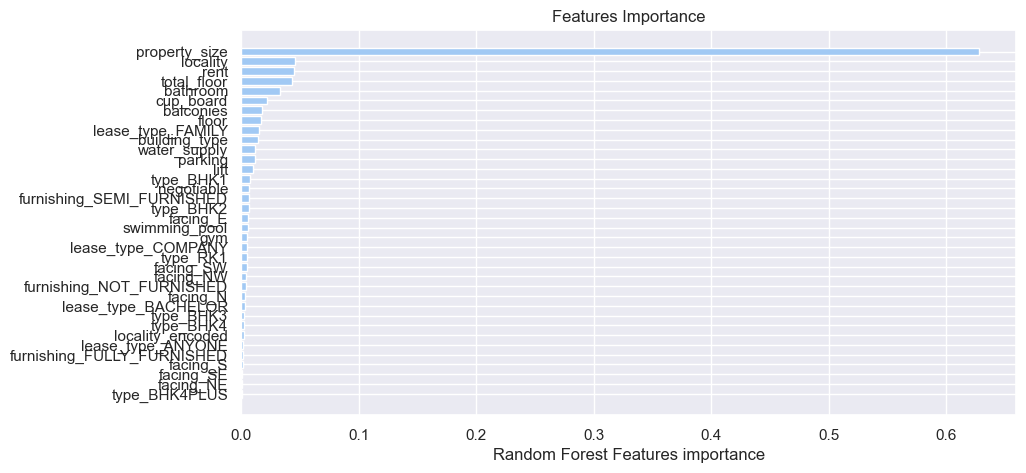

In [167]:
sorted_index = rf_Regressor.feature_importances_.argsort()
plt.figure(figsize=[10,5])
plt.barh(data.columns[sorted_index],rf_Regressor.feature_importances_[sorted_index])
plt.xlabel("Random Forest Features importance")
plt.title("Features Importance")
plt.show()

In [168]:
xgb_regressor.feature_importances_

array([0.02158458, 0.01326928, 0.03570015, 0.02714405, 0.0063388 ,
       0.01546408, 0.27176696, 0.08432475, 0.02069415, 0.00783229,
       0.03389068, 0.01078702, 0.03561193, 0.01045087, 0.02528071,
       0.03027474, 0.04318891, 0.03445305, 0.02940051, 0.0230693 ,
       0.01102284, 0.0075726 , 0.01860198, 0.03127176, 0.00839225,
       0.04548496, 0.00859082, 0.02229268, 0.00944118, 0.00756417,
       0.00967728, 0.00336157, 0.01049248, 0.0091415 , 0.00909366,
       0.00747153], dtype=float32)

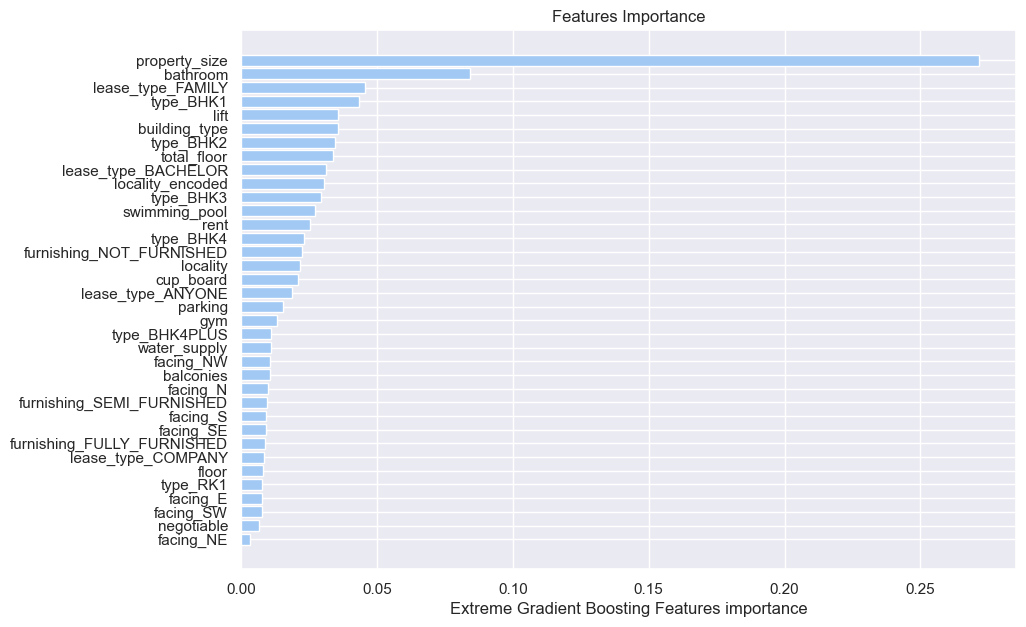

In [169]:
sorted_index = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=[10,7])
plt.barh(data.columns[sorted_index],xgb_regressor.feature_importances_[sorted_index])
plt.xlabel("Extreme Gradient Boosting Features importance")
plt.title("Features Importance")
plt.show()